In [1]:
import wfsim
import numpy as np
import nestpy
import straxen
import sys
import gzip
import pickle
from multihist import Hist1d
import matplotlib.pyplot as plt
sys.path.append('../')
import sims1
import importlib
importlib.reload(sims1)

*** Detector definition message ***
You are currently using the default XENON10 template detector.



<module 'sims1' from '/home/yuanlq/xenon/compeaks/notebooks/../sims1.py'>

In [34]:
scint_t, scint_y = sims1.scintillation(interaction_type=11, e_dep=9)

*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [35]:
prop_t, prop_y = sims1.propagation(z_position=-30)

In [36]:
tts_t, tts_y = sims1.transit()

In [37]:
spe_t, spe_y = sims1.spe()

(-30.0, 300.0)

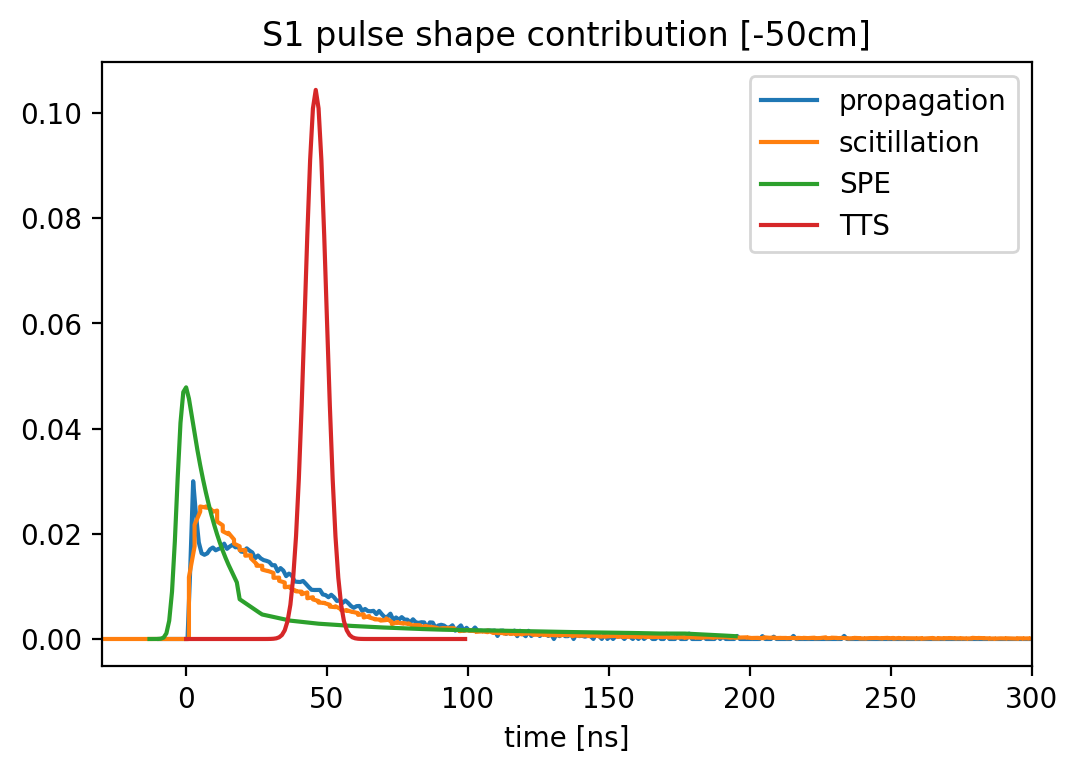

In [38]:
plt.figure(dpi=200)
plt.plot(prop_t, prop_y, label='propagation')
plt.plot(scint_t, scint_y, label='scitillation')
plt.plot(spe_t, spe_y, label='SPE')
plt.plot(tts_t, tts_y, label='TTS')
plt.legend()
plt.xlabel('time [ns]')
plt.title('S1 pulse shape contribution [-50cm]')
plt.xlim(-30,300)

## Interaction dependent pulse shape?

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

	WARNING! Outside of Kr83m model fit validity region. Details: minTimeSeparation is < 100 ns and your input E is 9.4 keV. Data for separated Kr83m decays do not yet exist for deltaT_ns <100 ns. 9.4 & 32.1 keV yields are still summed to physically accurate result, but individually will be nonsensical.


(0.0, 100.0)

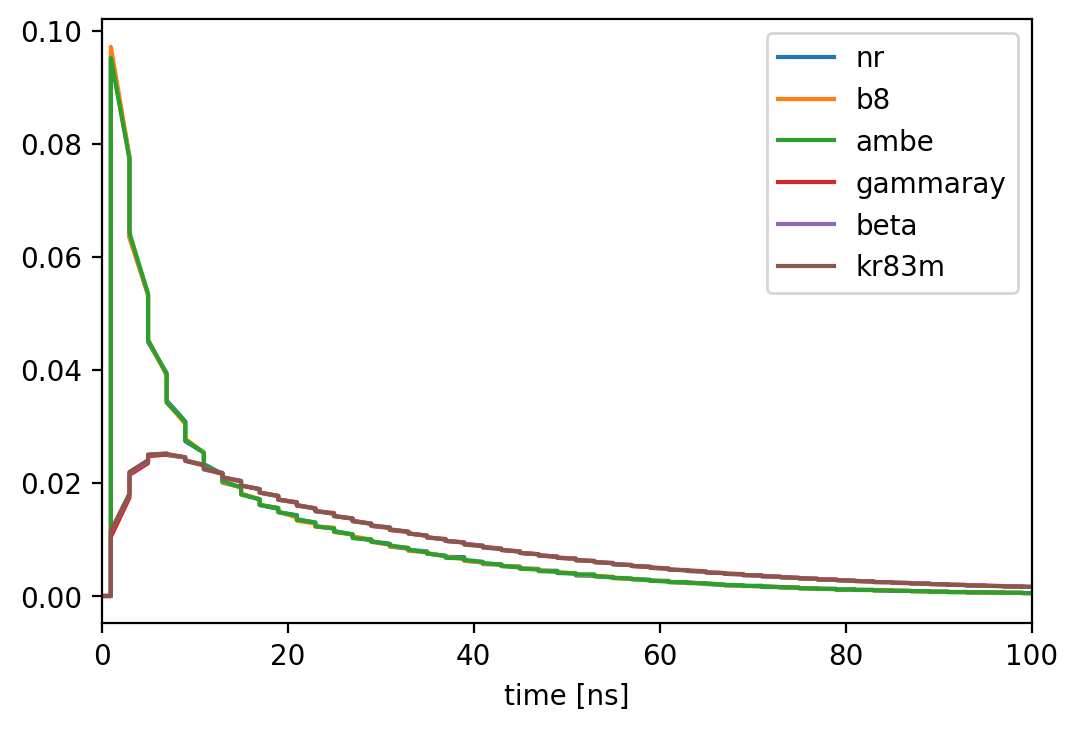

In [3]:
nesttypes = {'0':'nr', '2':'b8', '4':'ambe', '7':'gammaray',
    '8':'beta',  '11':'kr83m'}
plt.figure(dpi=200)
for key in nesttypes.keys():
    t, y = sims1.scintillation(interaction_type=eval(key), e_dep=9)
    plt.plot(t,y, label=str(nesttypes[key]))
    
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,100)

So the only difference in scintillation delay is NR or ER.

## energy dependent pulse shape?

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



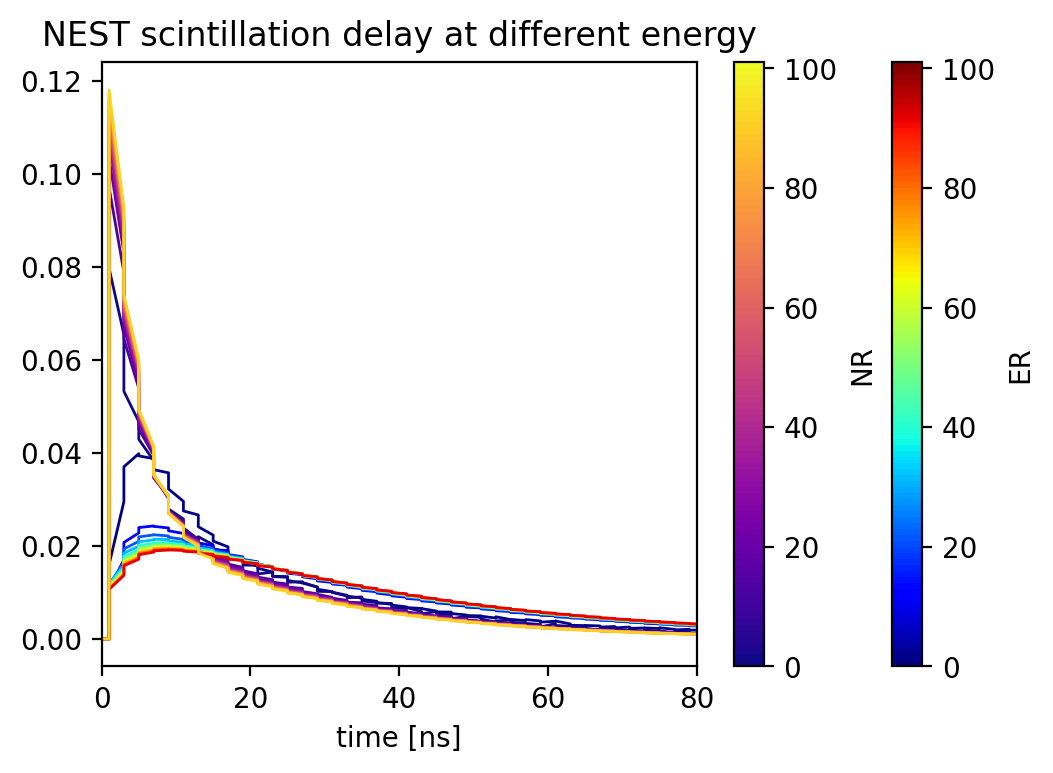

In [5]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    t1, y1 = sims1.scintillation(interaction_type=7, e_dep=1+e*10)
    t2, y2 = sims1.scintillation(interaction_type=0, e_dep=1+e*10)
    
    plt.plot(t1,y1, c=colors_er(1+e*10) , linewidth=1)
    plt.plot(t2,y2, c=colors_nr(1+e*10) , linewidth=1)

norm = mpl.colors.Normalize(vmin=0, vmax=101)
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('NEST scintillation delay at different energy')
plt.xlim(0,80)
plt.show()

Intuitively correct trend for ER, but what happened to NR?

## Convolve four contributions together

At fixed energy, different depth.

In [2]:
ZSLIACES = np.array([-128.20647559, -116.14423757, -104.08199954,  -92.01976151, -79.95752349,  
                     -67.89528546,  -55.83304744,  -43.77080941, -31.70857139,  -19.64633336])

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



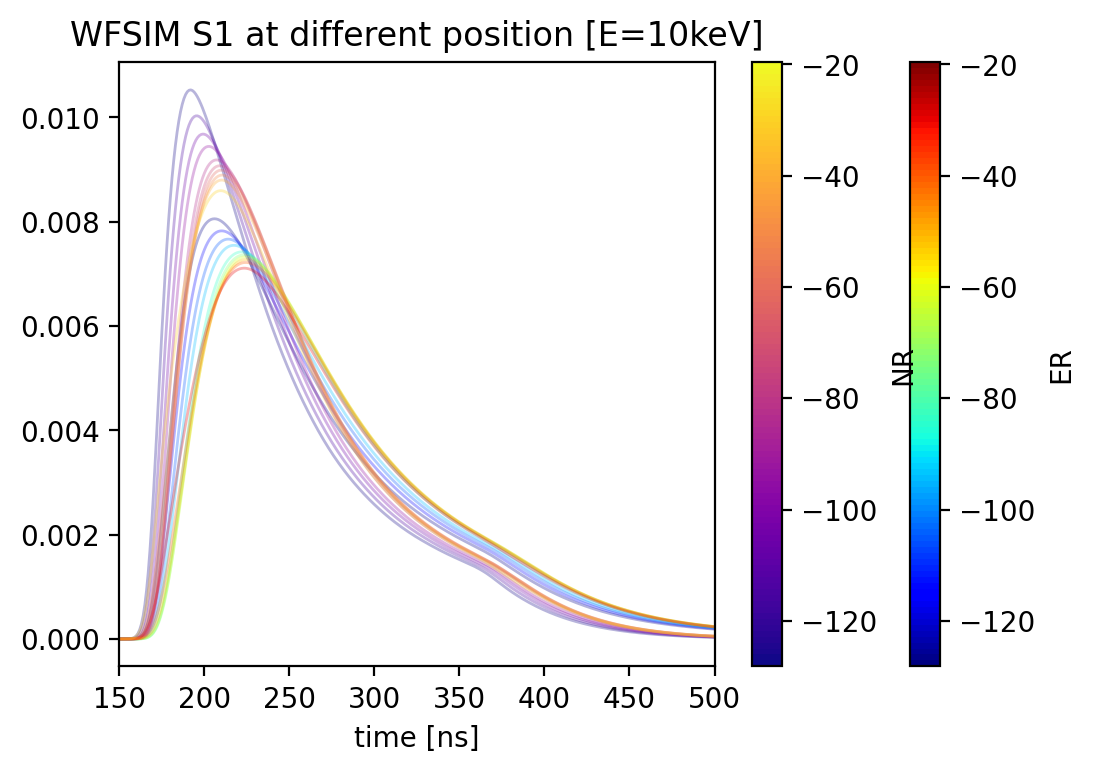

In [15]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=7, e_dep=10)
    y2 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=0, e_dep=10)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)

norm = mpl.colors.Normalize(vmin=ZSLIACES[0], vmax=ZSLIACES[-1])
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different position [E=10keV]')
plt.xlim(150,500)
plt.show()

IF wfsim is modeled well, we should be able tosee at least some differernce in ER/NR pulse shape?

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



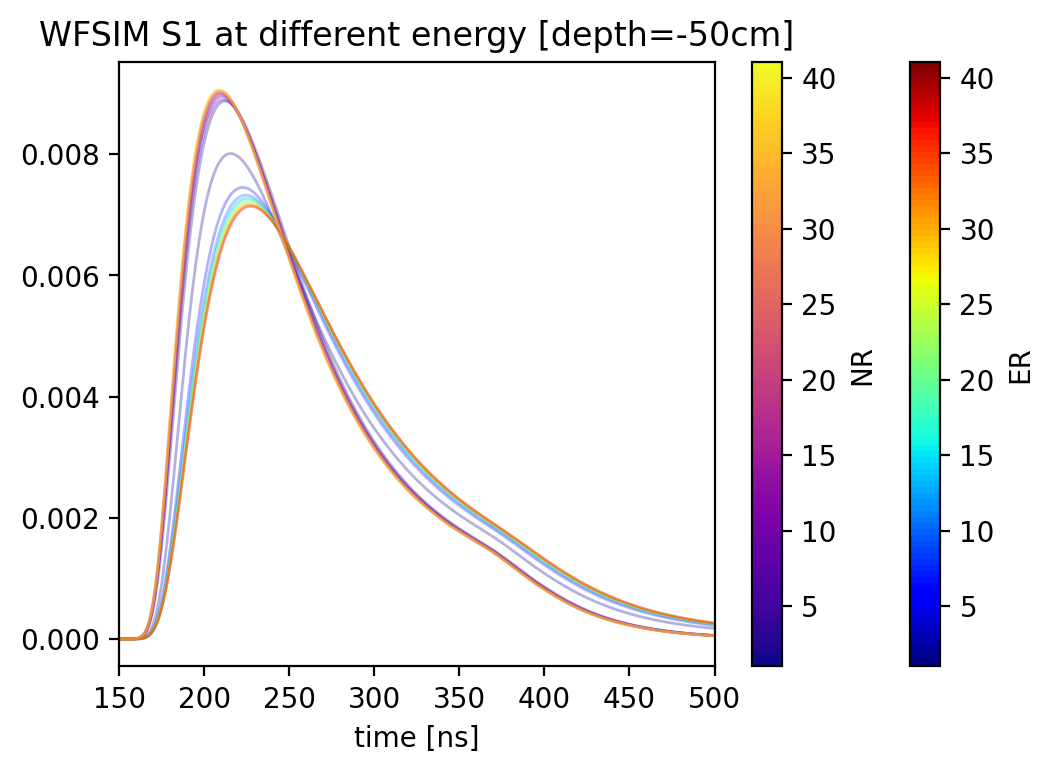

In [16]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=-50, interaction_type=7, e_dep=1+4*e)
    y2 = sims1.sims1(z_position=-50, interaction_type=0, e_dep=1+4*e)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)

norm = mpl.colors.Normalize(vmin=1, vmax=41)
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different energy [depth=-50cm]')
plt.xlim(150,500)
plt.show()

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



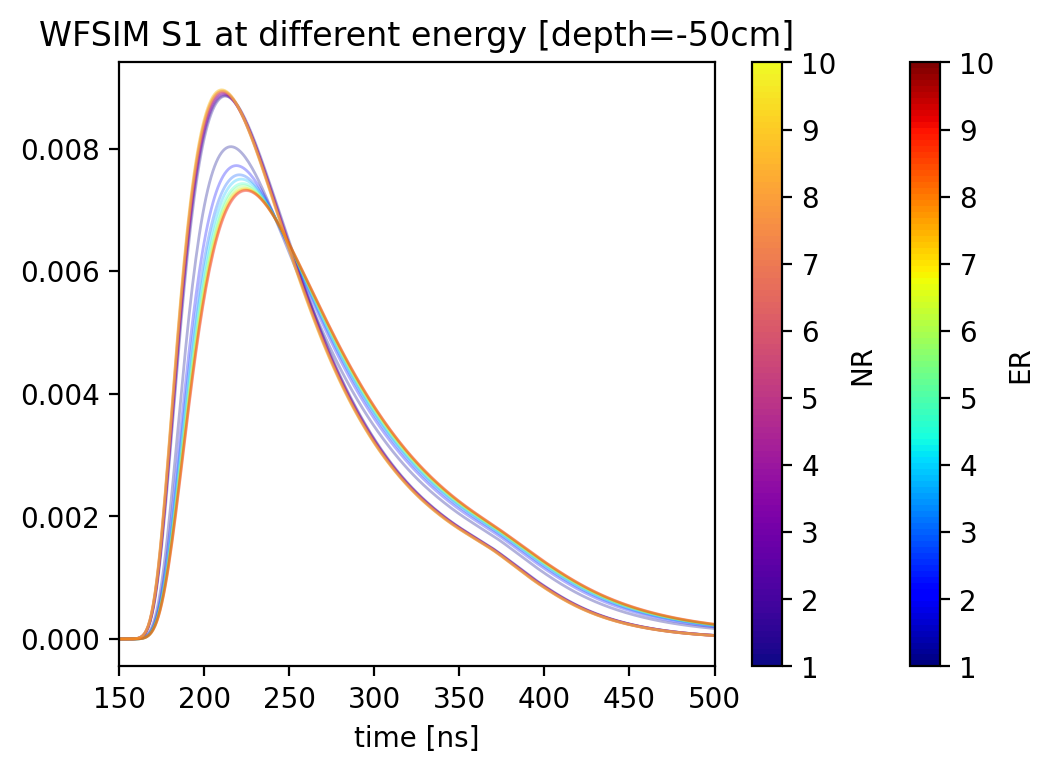

In [17]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=-50, interaction_type=7, e_dep=1+e)
    y2 = sims1.sims1(z_position=-50, interaction_type=0, e_dep=1+e)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)

norm = mpl.colors.Normalize(vmin=1, vmax=10)
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different energy [depth=-50cm]')
plt.xlim(150,500)
plt.show()

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



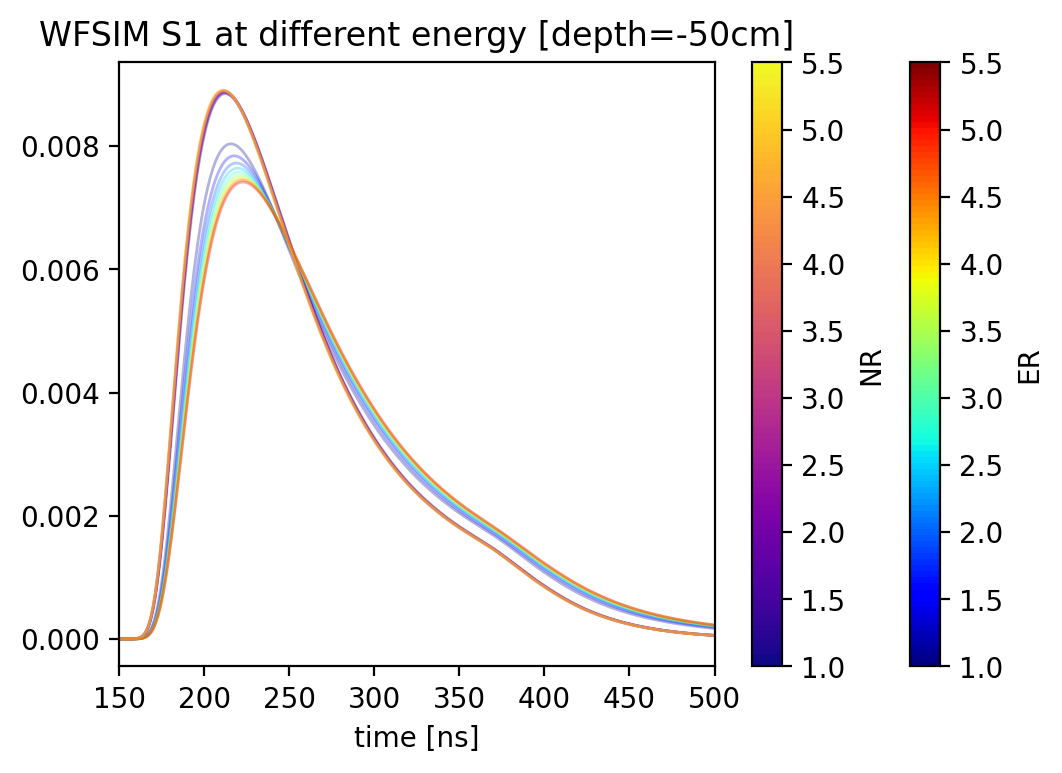

In [18]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=-50, interaction_type=7, e_dep=1+0.5*e)
    y2 = sims1.sims1(z_position=-50, interaction_type=0, e_dep=1+0.5*e)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)

norm = mpl.colors.Normalize(vmin=1, vmax=5.5)
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different energy [depth=-50cm]')
plt.xlim(150,500)
plt.show()

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



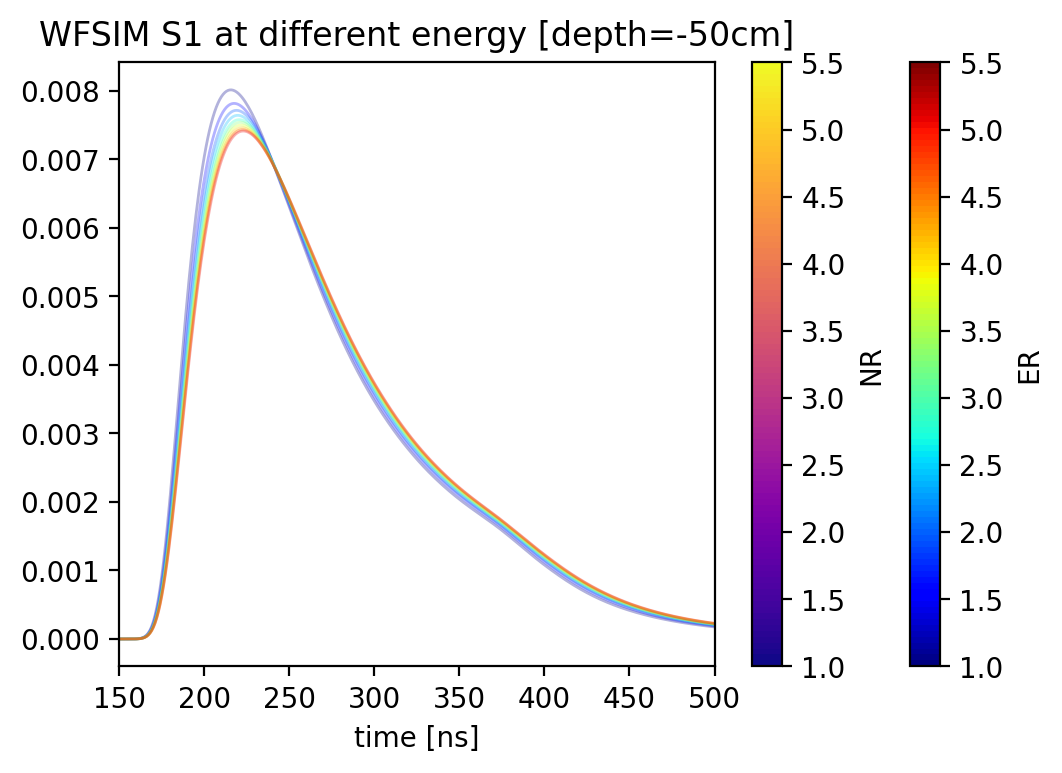

In [19]:
import matplotlib as mpl
plt.figure(dpi=200)

colors_er = plt.get_cmap('jet', 101)
colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=-50, interaction_type=7, e_dep=1+0.5*e)
    #y2 = sims1.sims1(z_position=-50, interaction_type=0, e_dep=1+0.5*e)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    #plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)

norm = mpl.colors.Normalize(vmin=1, vmax=5.5)
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
sm2.set_array([])
cb1 = plt.colorbar(sm1)
cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different energy [depth=-50cm]')
plt.xlim(150,500)
plt.show()

In [20]:
len(y1)

1915

ER is more energy sensitive according to NEST...

# Compare data

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



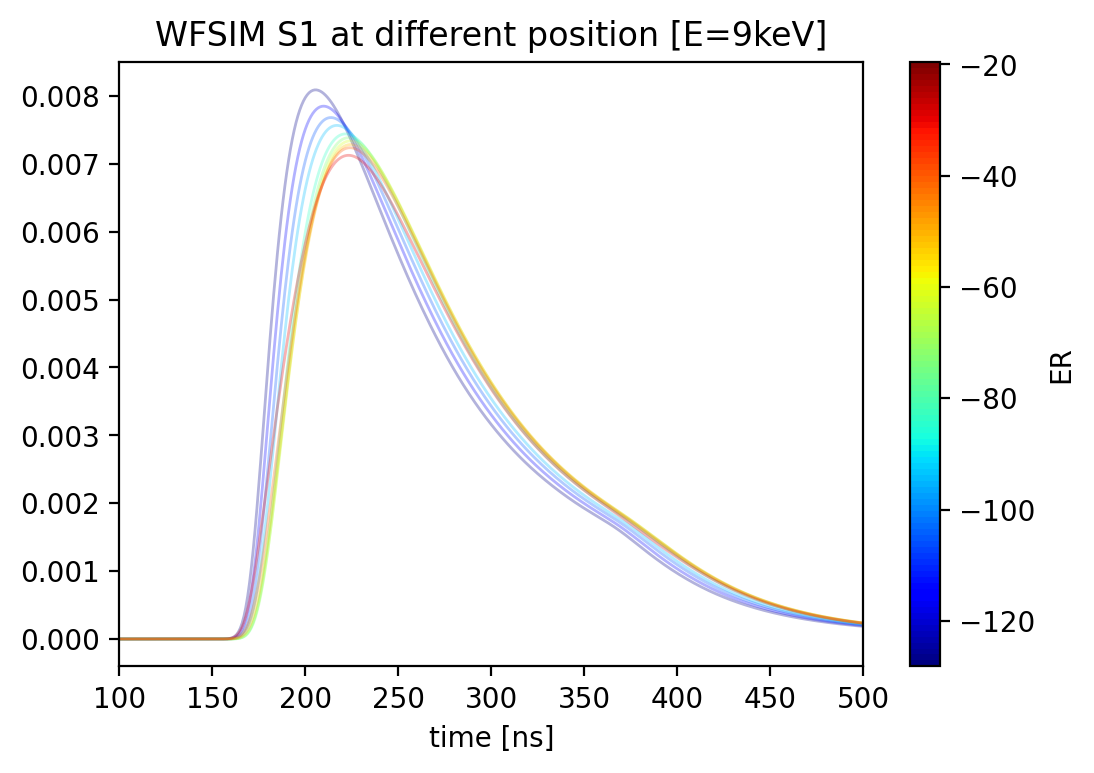

In [9]:
import matplotlib as mpl
plt.figure(dpi=200)

sim_wfs = np.zeros((10,800))

colors_er = plt.get_cmap('jet', 101)
#colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=7, e_dep=9)
    #y2 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=0, e_dep=10)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    #plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)
    sim_wfs[e] = y1[100:900]

norm = mpl.colors.Normalize(vmin=ZSLIACES[0], vmax=ZSLIACES[-1])
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
#sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
#sm2.set_array([])
cb1 = plt.colorbar(sm1)
#cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
#cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different position [E=9keV]')
plt.xlim(100,500)
plt.show()

# KrS1B

In [3]:
import extraction
import alignment

AR_AVAILABLE = np.array(['034160', '033781', '033492', '033492', '033582', '033823',
       '033841', '034145', '033555', '033573', '034211', '034076',
       '033995', '034163', '033540', '034157', '033802', '033781',
       '034301', '034013', '033959', '033995', '034235', '033790',
       '033488', '033564', '034274', '034142', '034280', '033475',
       '034250', '034214', '034262', '034148', '034301', '034121',
       '034292', '034097', '033519', '034028', '033841', '033501',
       '034070', '033591', '033745', '034250', '033579', '033796',
       '033826', '034016'])

KR_AVAILABLE = np.array(['018223', '018834', '030532', '030430', '030403', '023392',
       '030406', '018902', '018913', '025633', '033226', '023555',
       '018767', '029509', '018614', '031903', '018253', '018568',
       '028701', '027016', '018653', '018929', '028665', '018777',
       '025633', '021731', '018630', '030505', '019188', '018844',
       '018617', '018722', '018503', '018578', '019240', '021725',
       '030355', '028656', '018485', '023479', '018759', '033256',
       '030484', '024345', '021530', '023395', '030448', '027039',
       '026419', '018364'])

krs1b_peak_extra = extraction.get_peak_extra(runs=KR_AVAILABLE, signal_type='KrS1B')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

195621it [00:02, 67777.65it/s]


(0.0, 50.0)

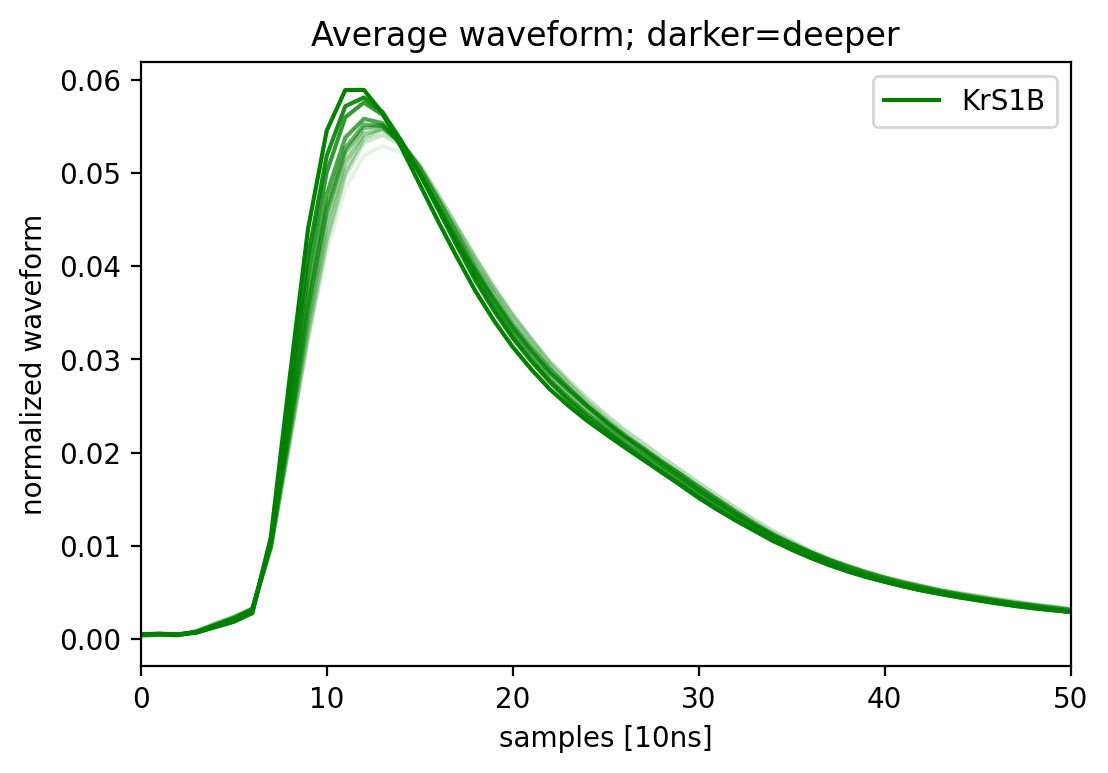

In [34]:
# data

krs1b_aligned_area20 = alignment.align_area_range(krs1b_peak_extra)

peaks = krs1b_peak_extra[(krs1b_peak_extra['dt']==10)&(krs1b_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1b_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    krs1b_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)

In [44]:
import pandas as pd
import wfsim
import strax
import numpy as np
import nestpy
print("NESTPY" , nestpy.__version__, nestpy.__file__)

NSUMWVSAMPLES = 200
NWIDTHS = 11

nc = nestpy.NESTcalc(nestpy.DetectorExample_XENON10())
density = 2.94
driftfield= 18.3
energy_32 = 32
total_ces_std=2.8
denergy_32 = 0.88*total_ces_std
energy_9 = 9
denergy_9 = 0.47*total_ces_std


def instruction(energy, denergy, N_events=1):    
    instr = np.zeros(N_events , wfsim.instruction_dtype)
    #instr['x'] = evt['x']
    #instr['y'] = evt['y']
    instr['z'] = np.random.uniform(-134,-13)
    instr['type'] = 1
    instr['recoil'] = 11
    instr['local_field'] = driftfield

    for i in range(0, N_events):
        e = np.random.normal(energy, denergy)
        yields = nc.GetYields(nestpy.INTERACTION_TYPE(7), e, density, driftfield)
        cur_q = nc.GetQuanta(yields)
        instr['time'][i] = (i+1) * int(1e6)
        instr['amp'][i] = cur_q.photons
        instr['n_excitons'][i] = cur_q.excitons
        instr['e_dep'][i] = e
    
    return instr  


# 9 keV
fax_instr = []
N_events = 1
for j in range(100000):
    temp = instruction(energy_9, denergy_9, N_events)
    temp['time'] = temp['time'] + j * N_events * int(1e6)
    fax_instr.append(temp)
fax_instr = np.concatenate(fax_instr)
pd.DataFrame(fax_instr).to_csv('/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv', index=False)

stwf = straxen.contexts.xenonnt_simulation(
    cmt_run_id_sim = '034000',
    output_folder='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data',
    fax_config='fax_config_nt_sr0_v0.json',)

stwf.set_config(dict(fax_config_override={
    's1_model_type': 'nest+optical_propagation',
    's1_pattern_map': '/dali/lgrandi/xenonnt/simulations/optphot/mc_v4.1.0/S1_1.69_0.99_0.99_0.99_0.99_10000_100_30/XENONnT_S1_xyz_patterns_LCE_MCv4.1.0_wires.pkl',
    's1_time_spline': 'XENONnT_s1_proponly_va43fa9b_wires_20200625.json.gz',
    'enable_noise': True,
    'enable_electron_afterpulses': True,
    'enable_pmt_afterpulses': True,
}))

stwf.set_config(
    dict(fax_file='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv',
         right_raw_extension=20000,
         event_rate=1000,
         chunk_size=1,
         nchunk=10,))


def sim_peak_extra(peaks, peak_basics, truth, match):
    dtypes = [
        (('Start time of the peak (ns since unix epoch)',
          'time'), np.int64),
        (('End time of the peak (ns since unix epoch)',
          'endtime'), np.int64),
        (('Weighted center time of the peak (ns since unix epoch)',
          'center_time'), np.int64),
        (('Peak integral in PE',
            'area'), np.float32),
        (('Number of PMTs contributing to the peak',
            'n_channels'), np.int16),
        (('PMT number which contributes the most PE',
            'max_pmt'), np.int16),
        (('Area of signal in the largest-contributing PMT (PE)',
            'max_pmt_area'), np.float32),
        (('Total number of saturated channels',
          'n_saturated_channels'), np.int16),
        (('Width (in ns) of the central 50% area of the peak',
            'range_50p_area'), np.float32),
        (('Width (in ns) of the central 90% area of the peak',
            'range_90p_area'), np.float32),
        (('Fraction of area seen by the top array '
          '(NaN for peaks with non-positive area)',
            'area_fraction_top'), np.float32),
        (('Length of the peak waveform in samples',
          'length'), np.int32),
        (('Time resolution of the peak waveform in ns',
          'dt'), np.int16),
        (('Time between 10% and 50% area quantiles [ns]',
          'rise_time'), np.float32),
        (('Hits within tight range of mean',
          'tight_coincidence'), np.int16),
        (('PMT channel within tight range of mean',
          'tight_coincidence_channel'), np.int16),
        (('Classification of the peak(let)',
          'type'), np.int8),
        (('Waveform data in PE/sample (not PE/ns!)',
          'data'), np.float32, NSUMWVSAMPLES),
        (('Peak widths: time between nth and 5th area decile [ns]',
          'area_decile_from_midpoint'), np.float32, NWIDTHS),
        (('x coordinates', 'x'), np.float32),
        (('y coordinates', 'y'),np.float32),
        (('z coordinates', 'z'), np.float32),
    ]
    
    peak_indecies = match['matched_to']
    peaks = peaks[peak_indecies]
    peak_basics = peak_basics[peak_indecies]
    
    peak_extra = np.zeros(len(peaks), dtype=dtypes)
    
    for i in range(len(dtypes)):
        field = dtypes[i][0][1]
        if field == 'data' or field == 'area_decile_from_midpoint':
            peak_extra[field] = peaks[field]
        elif field == 'x' or field == 'y' or field == 'z':
            peak_extra[field] = truth[field]
        else:
            peak_extra[field] = peak_basics[field]
    
    return peak_extra

NESTPY 1.5.0 /opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/nestpy/__init__.py


*** Detector definition message ***
You are currently using the default XENON10 template detector.



## No alignment

In [7]:
import pema
stwf.register_all(pema.match_plugins)

krs1b_sim_peaks = stwf.get_array('krs1b_test1', 'peaks')
truth = stwf.get_array('krs1b_test1', 'truth')
krs1b_match = stwf.get_array('krs1b_test1', 'match_acceptance_extended')
krs1b_sim_peak_basics = stwf.get_array('krs1b_test1', 'peak_basics')
krs1b_sim_peak_extra = sim_peak_extra(krs1b_sim_peaks, krs1b_sim_peak_basics, truth, krs1b_match)

Loading peaks: |          | 0.00 % [00:00<?]

Loading truth: |          | 0.00 % [00:00<?]

Loading match_acceptance_extended: |          | 0.00 % [00:00<?]

Loading peak_basics: |          | 0.00 % [00:00<?]

(0.0, 50.0)

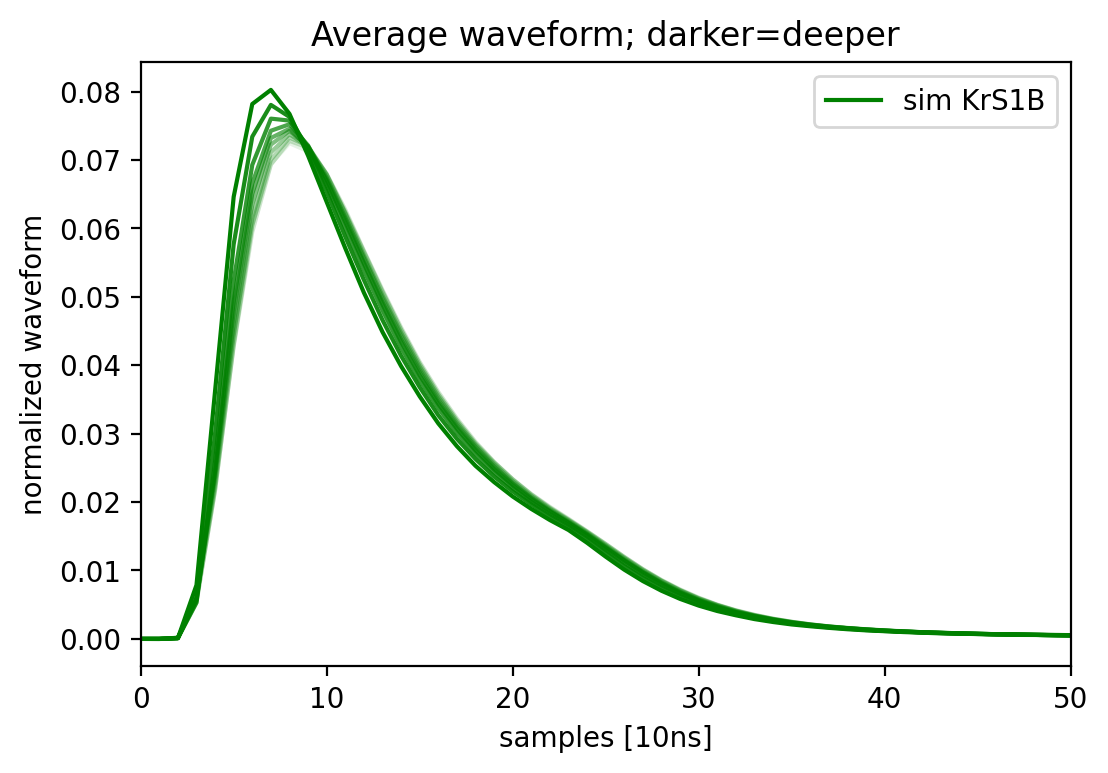

In [47]:
peaks = krs1b_sim_peak_extra[(krs1b_sim_peak_extra['dt']==10)&(krs1b_sim_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
sim_krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
sim_krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    sim_krs1b_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    sim_krs1b_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='sim KrS1B')
    else:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)

(0.0, 500.0)

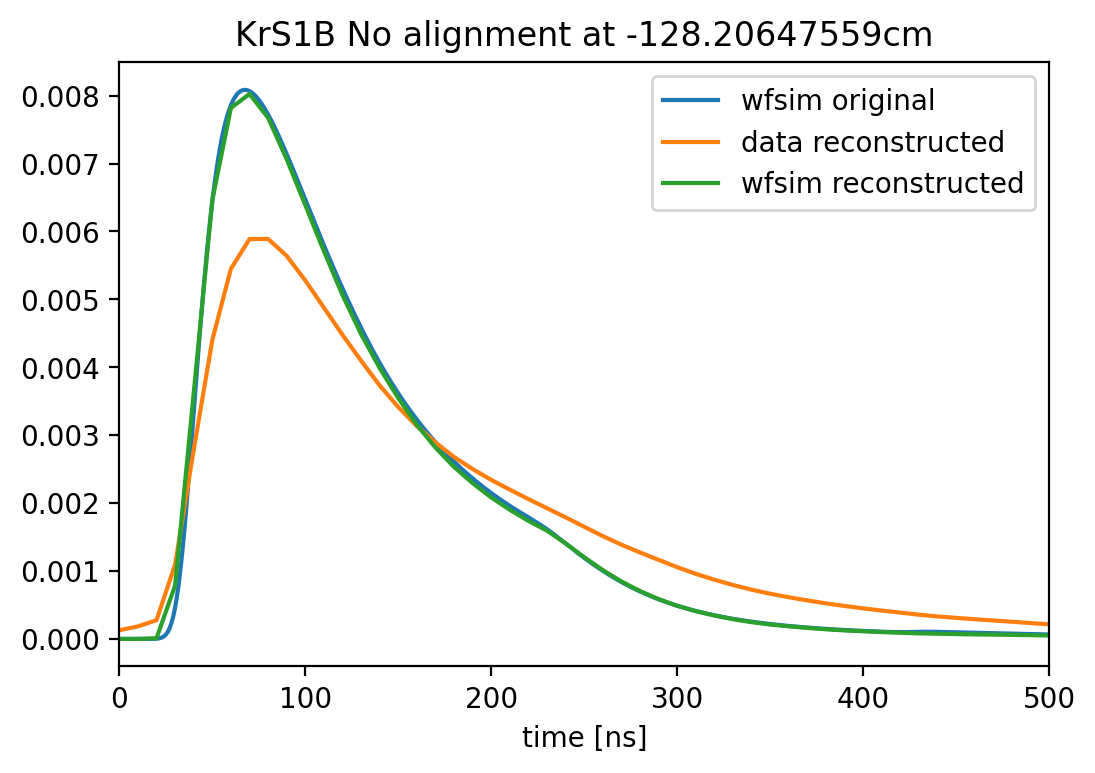

In [72]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

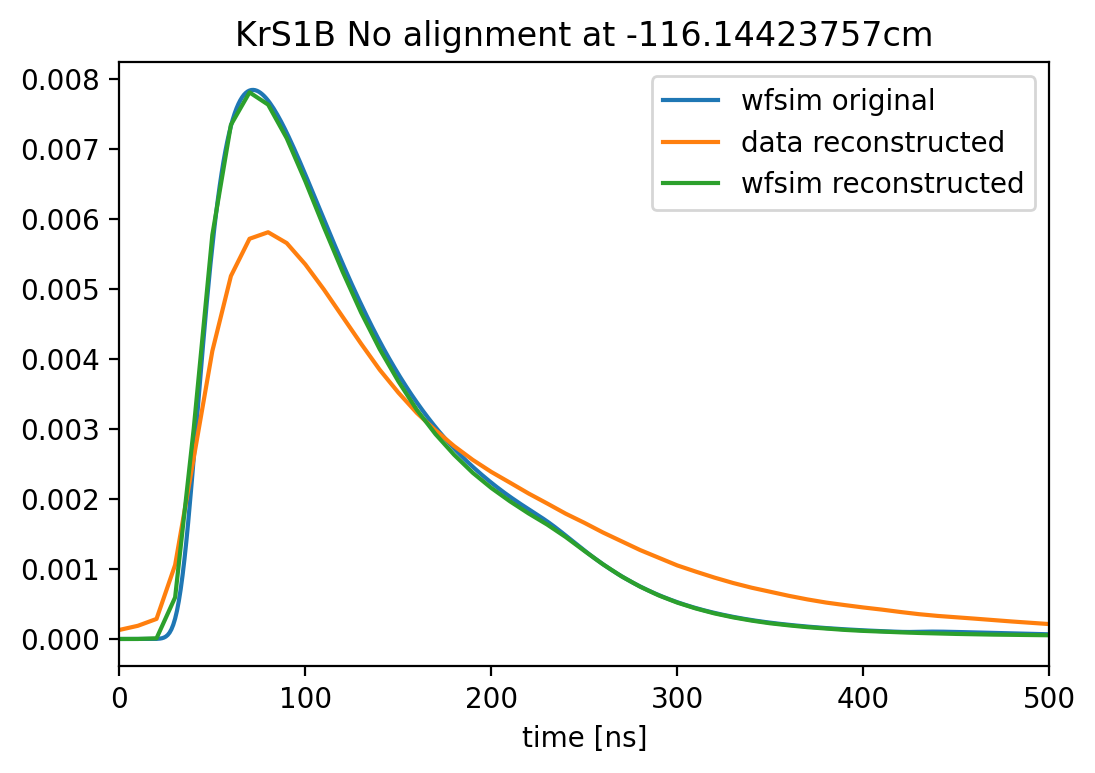

In [73]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

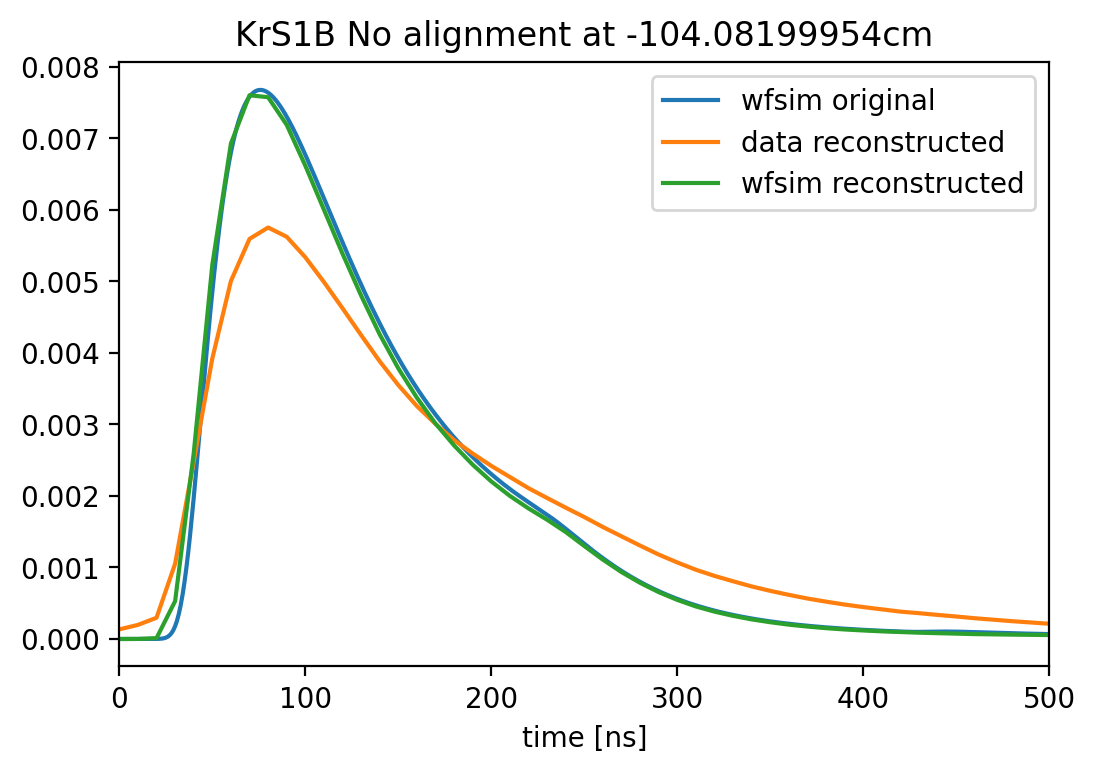

In [74]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

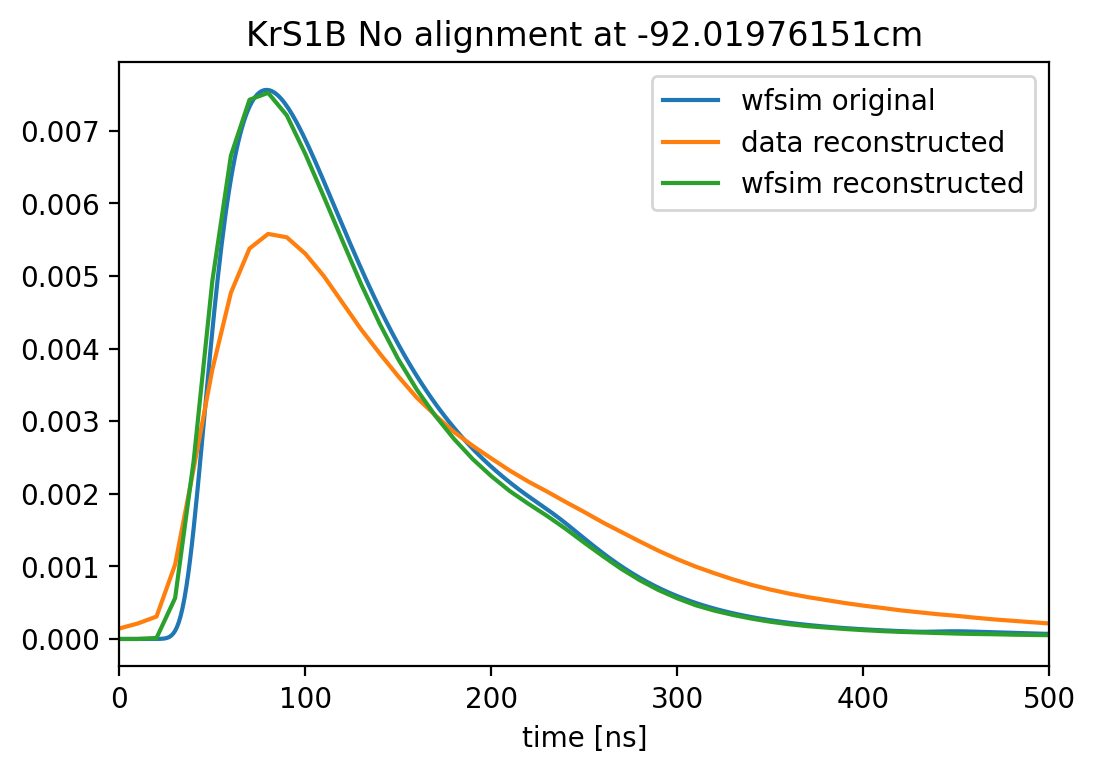

In [75]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

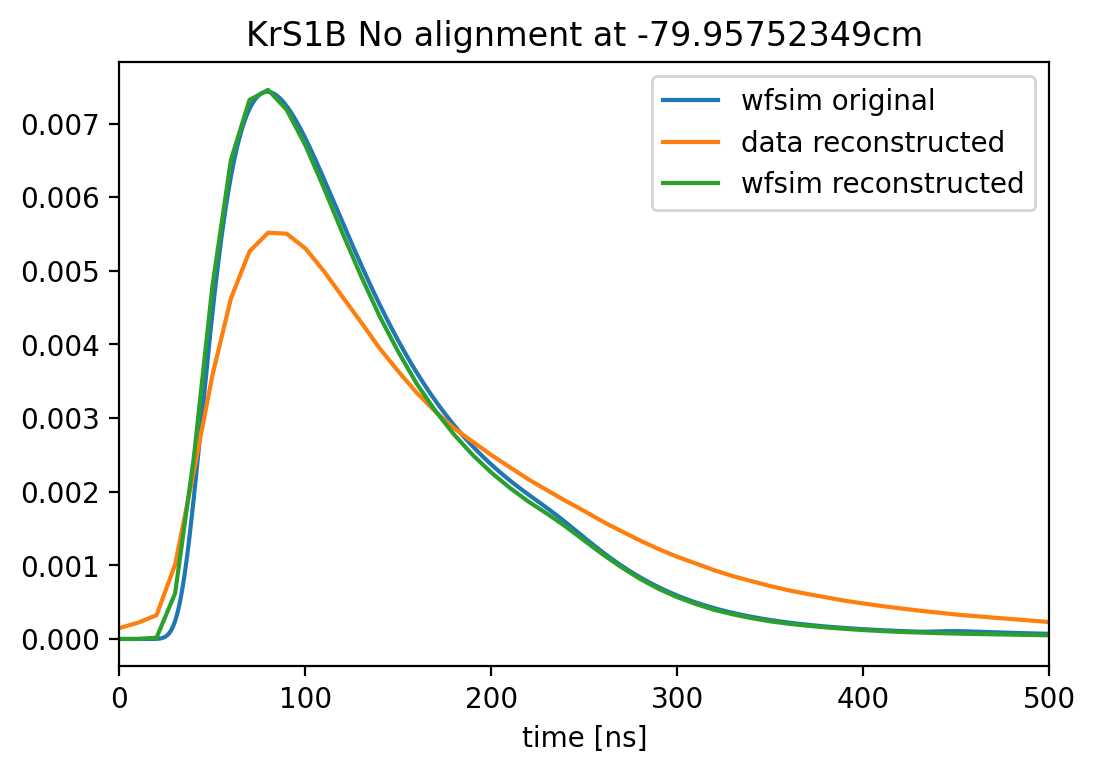

In [79]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

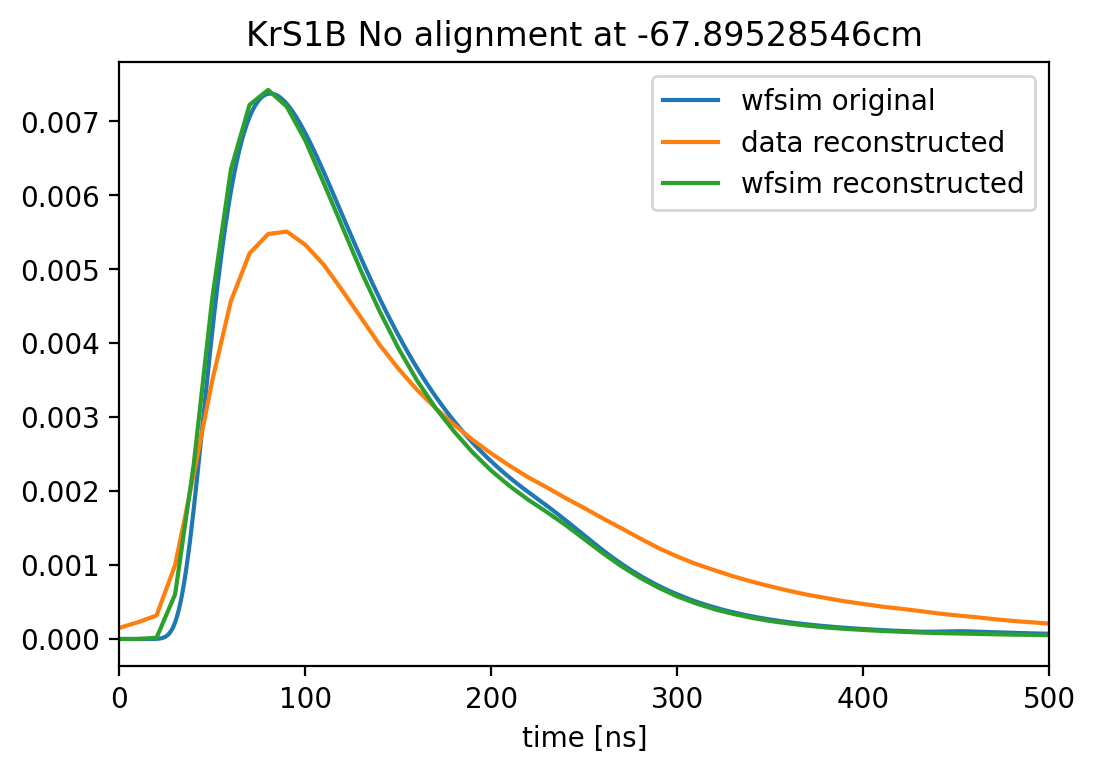

In [80]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

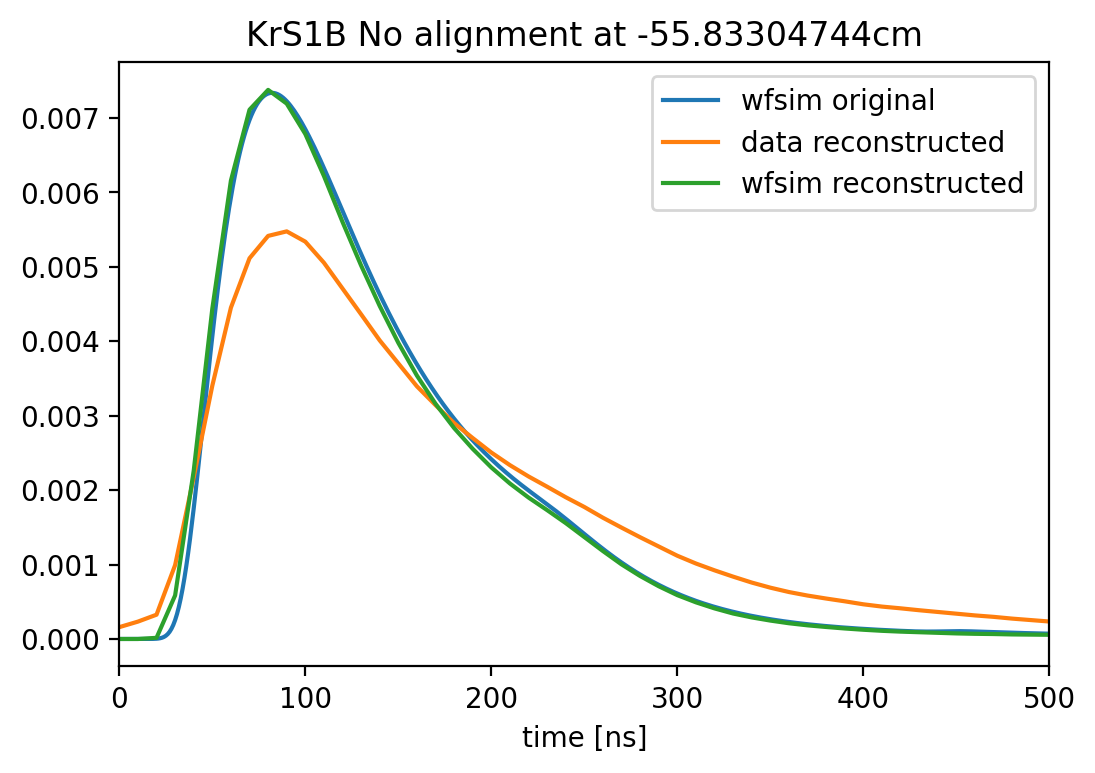

In [81]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

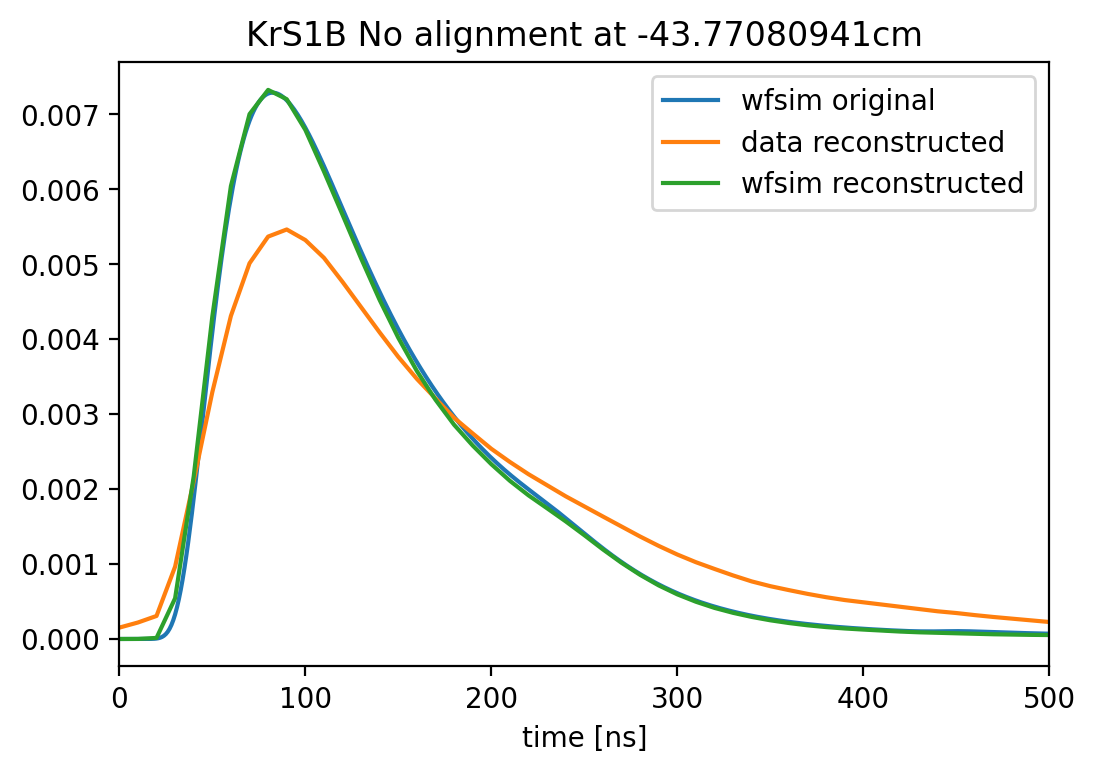

In [82]:
i = 7
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

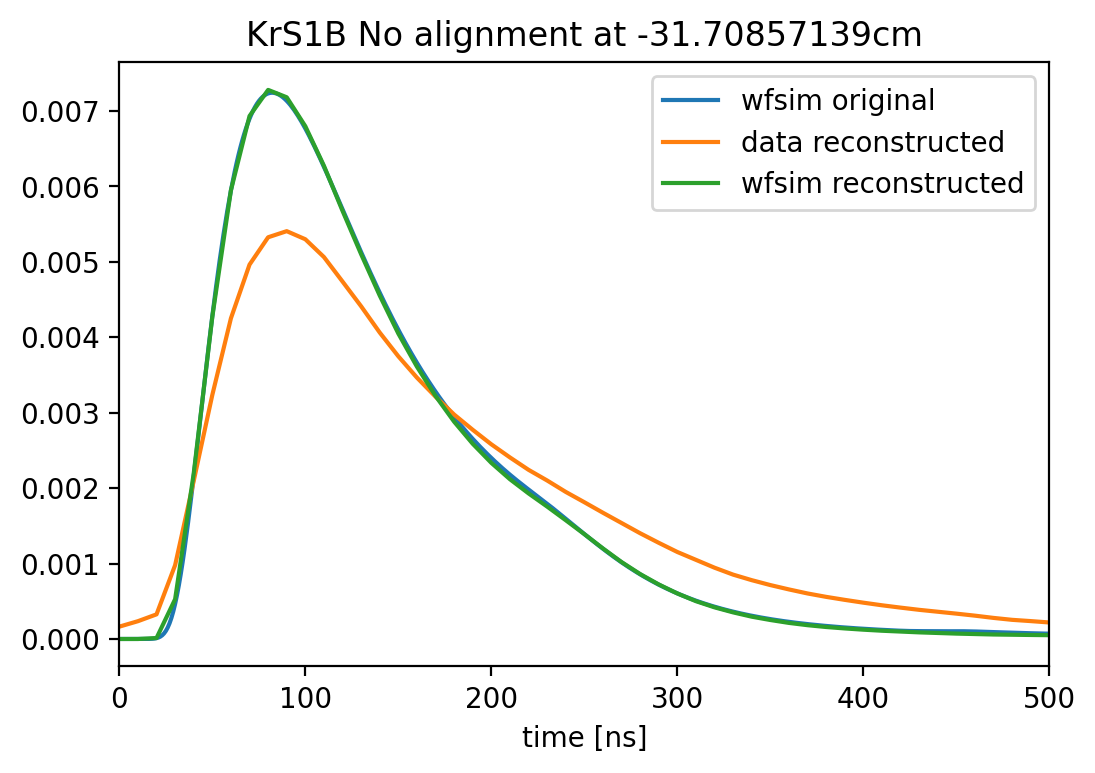

In [83]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

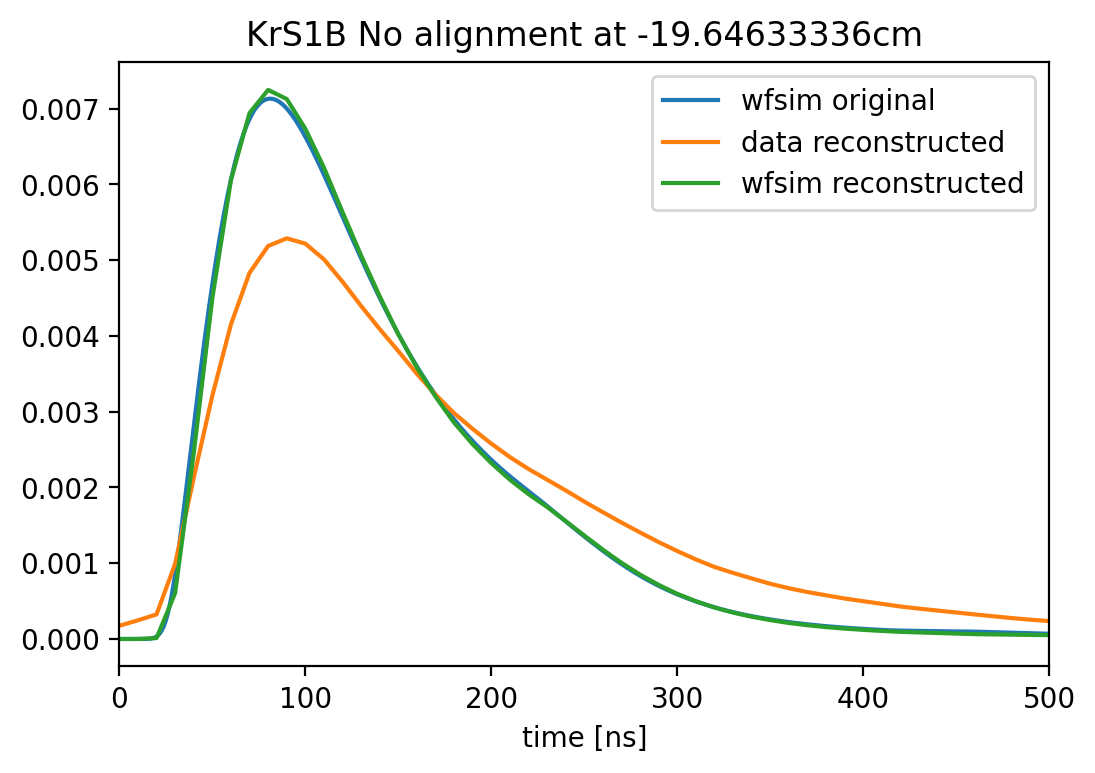

In [84]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(196)*10, krs1b_avg_wf_mean[i,4:]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1B No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

Conclusion: no alignment gives least bias to simulated data.

## Area 20 percent

195621it [00:02, 69225.27it/s]


(40.0, 90.0)

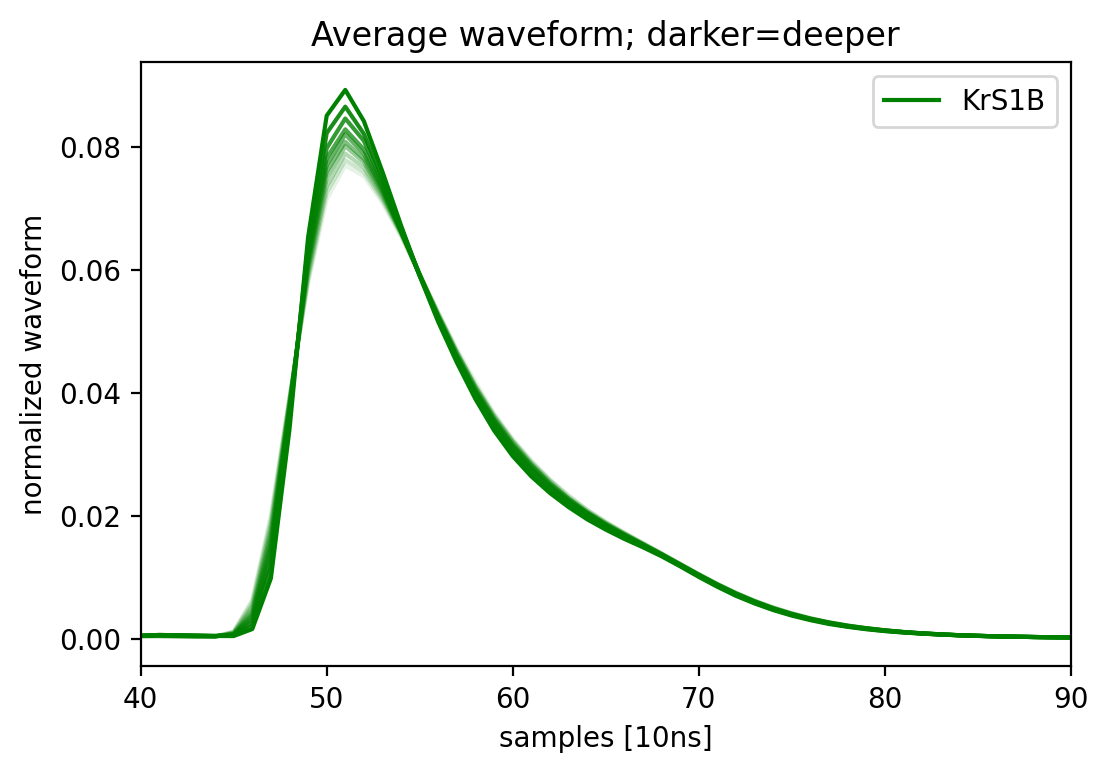

In [86]:
# data

krs1b_aligned_area20 = alignment.align_area_range(krs1b_peak_extra)

peaks = krs1b_peak_extra[(krs1b_peak_extra['dt']==10)&(krs1b_peak_extra['area']>18)]
krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(krs1b_aligned_area20[0])))
krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(krs1b_aligned_area20[0])))
for i in range(len(z_slices)-1):
    peaks_z = krs1b_aligned_area20[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1b_avg_wf_mean[i] = np.mean(peaks_z, axis=0)
    krs1b_avg_wf_err[i] = np.std(peaks_z, axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(40,90)



0it [00:00, ?it/s]

7192it [00:00, 71909.10it/s]

14578it [00:00, 73050.82it/s]

22058it [00:00, 73847.73it/s]

29533it [00:00, 74202.62it/s]

36954it [00:00, 74125.33it/s]

44367it [00:00, 72530.72it/s]

51697it [00:00, 72777.05it/s]

58980it [00:00, 71950.58it/s]

66213it [00:00, 72065.84it/s]

73662it [00:01, 72805.06it/s]

81020it [00:01, 73038.51it/s]

88410it [00:01, 73297.78it/s]

99748it [00:01, 73099.67it/s]


(40.0, 90.0)

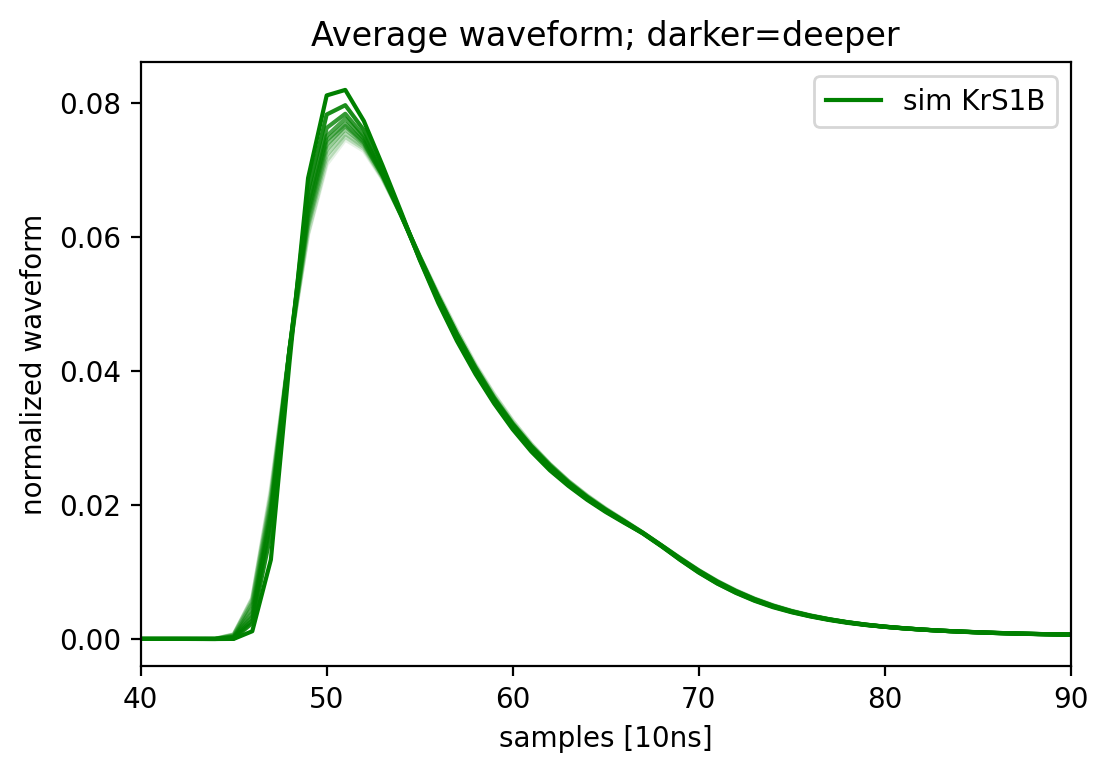

In [99]:
sim_krs1b_peak_extra = krs1b_sim_peak_extra
sim_krs1b_aligned_area20 = alignment.align_area_range(sim_krs1b_peak_extra)

peaks = sim_krs1b_peak_extra[(sim_krs1b_peak_extra['dt']==10)&(sim_krs1b_peak_extra['area']>18)]

# compute average waveform
sim_krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(sim_krs1b_aligned_area20[0])))
sim_krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(sim_krs1b_aligned_area20[0])))
for i in range(len(z_slices)-1):
    peaks_z = sim_krs1b_aligned_area20[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    sim_krs1b_avg_wf_mean[i] = np.mean(peaks_z, axis=0)
    sim_krs1b_avg_wf_err[i] = np.std(peaks_z, axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='sim KrS1B')
    else:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(40,90)

(0.0, 500.0)

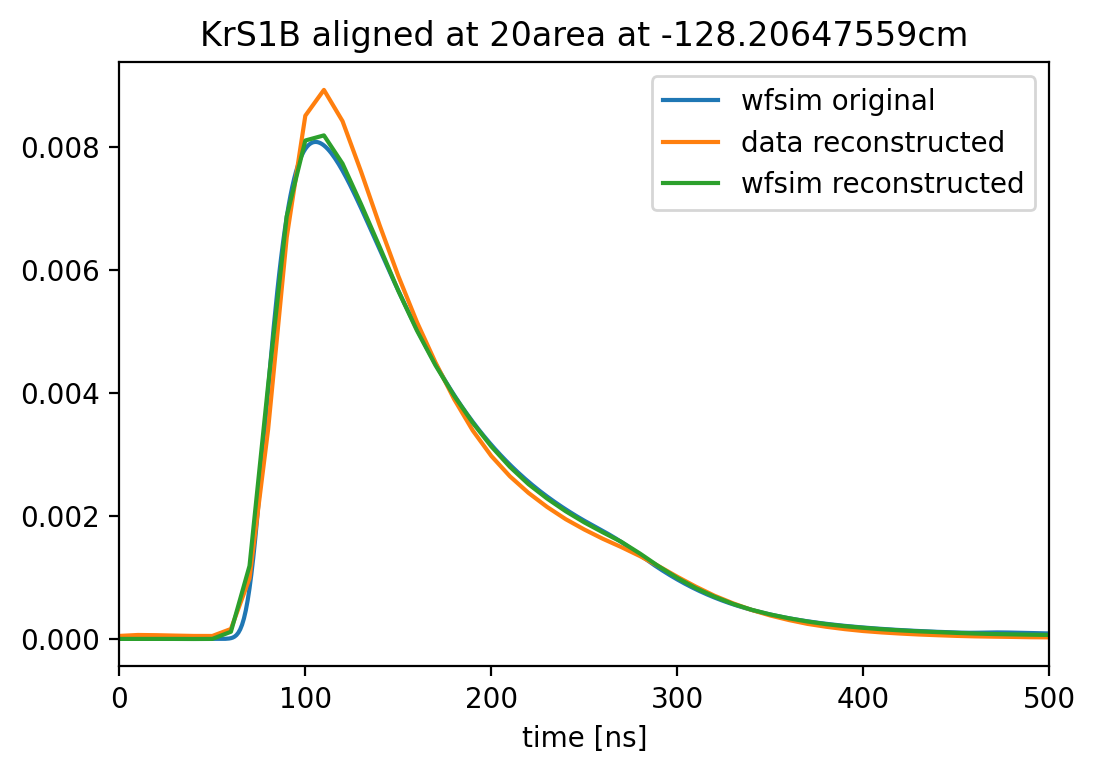

In [104]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(800),sim_wfs[i], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

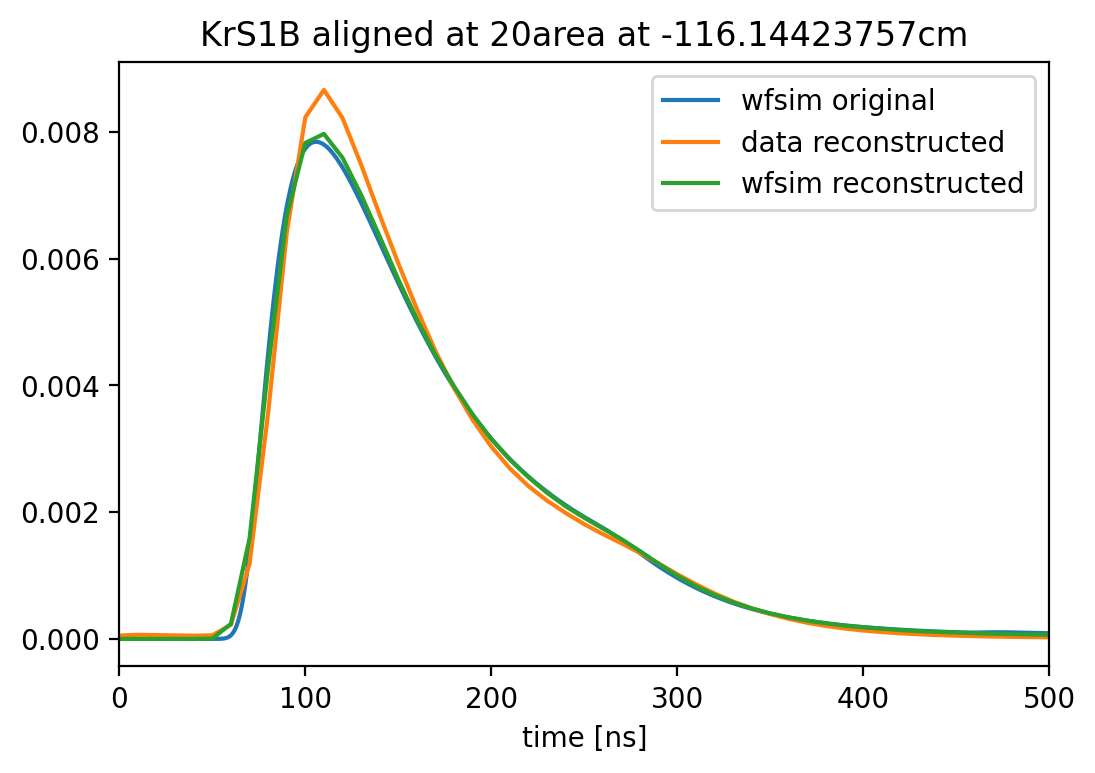

In [107]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(796),sim_wfs[i,4:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

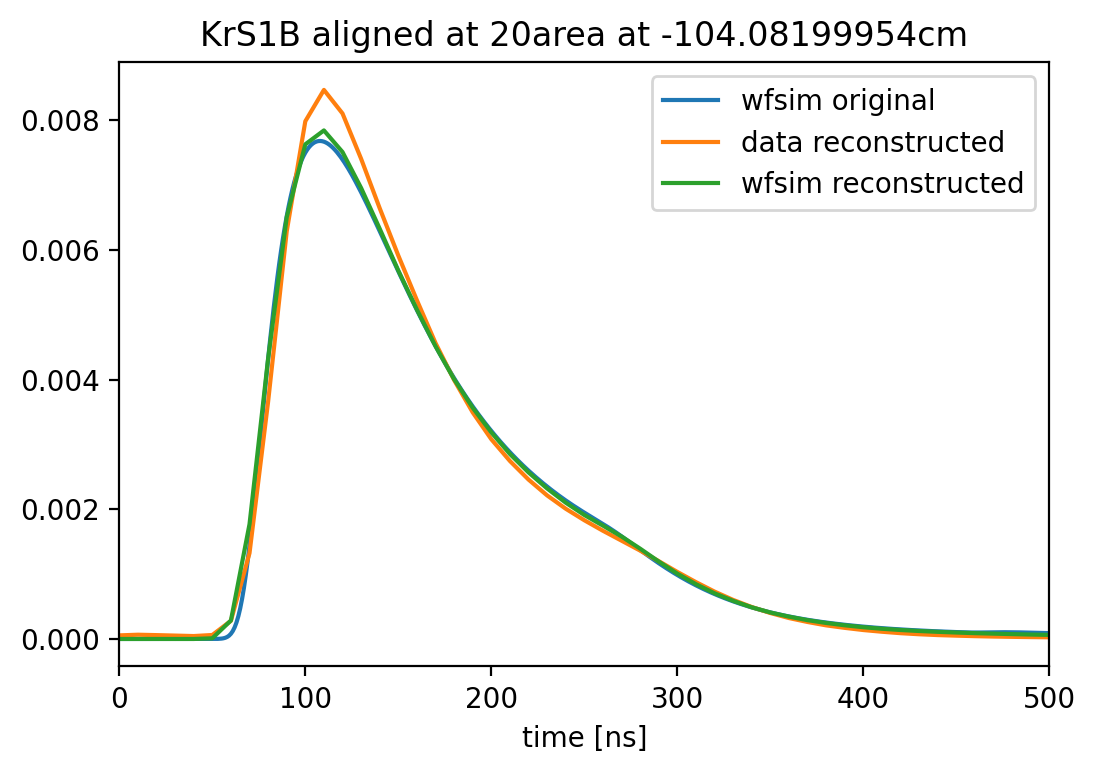

In [110]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(794),sim_wfs[i,6:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

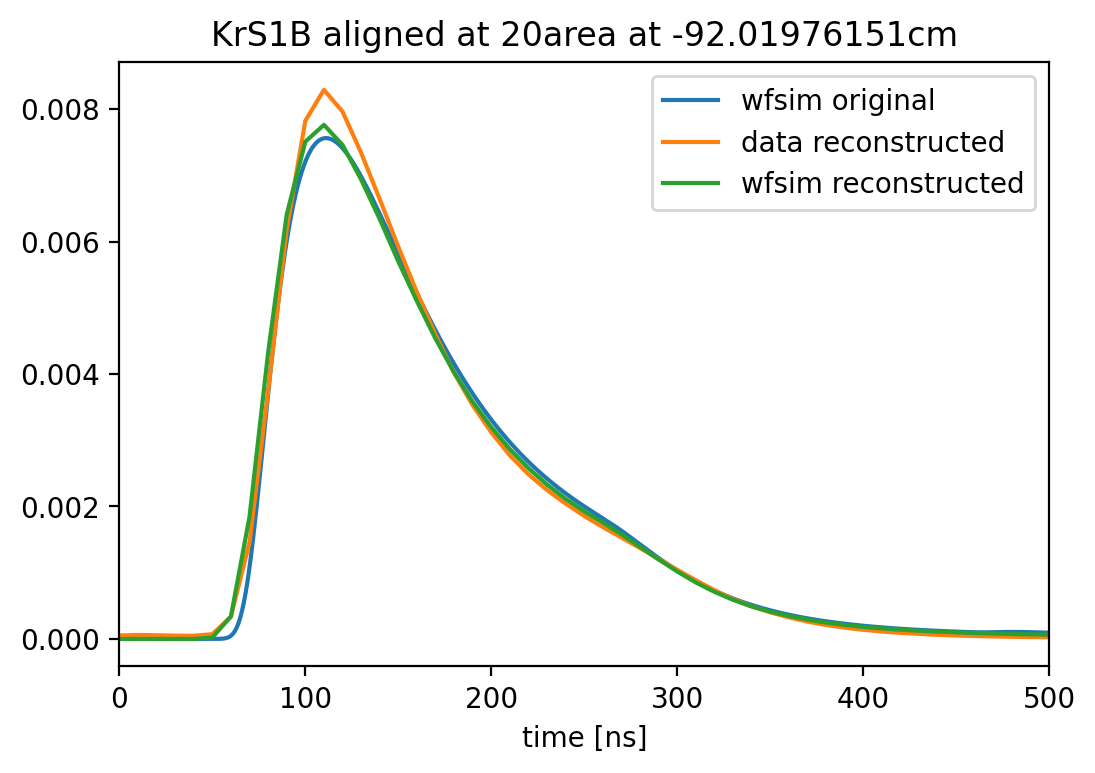

In [111]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(794),sim_wfs[i,6:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

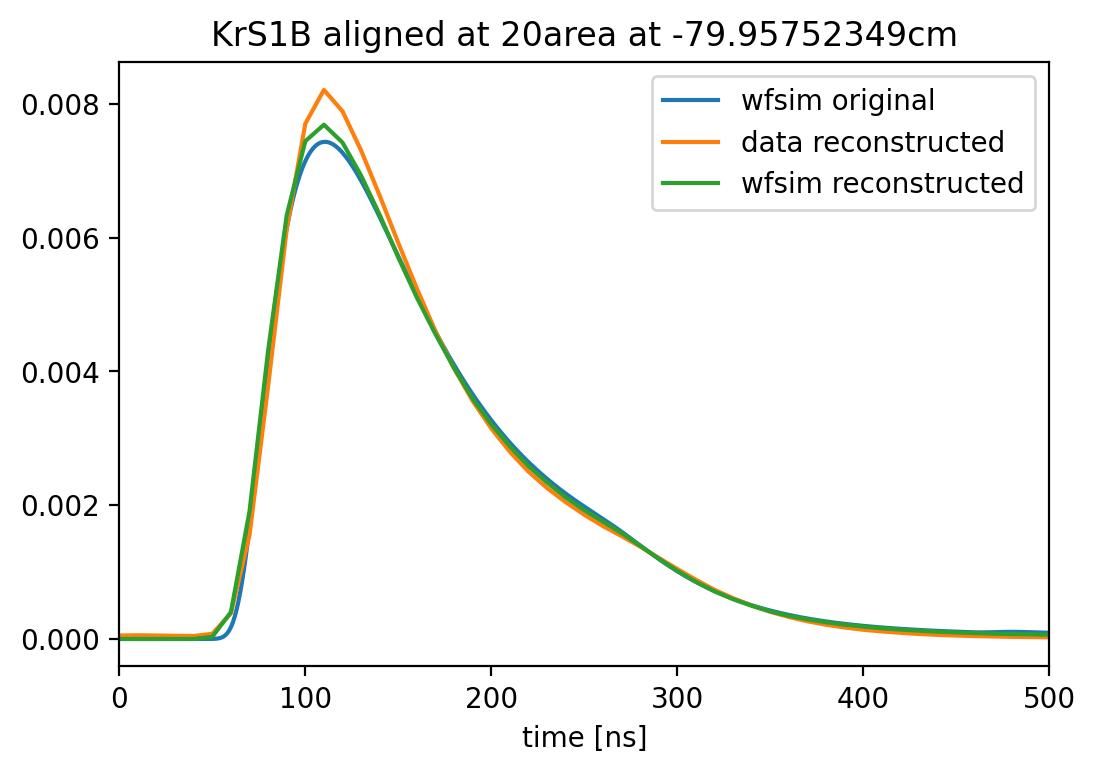

In [116]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(789),sim_wfs[i,11:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

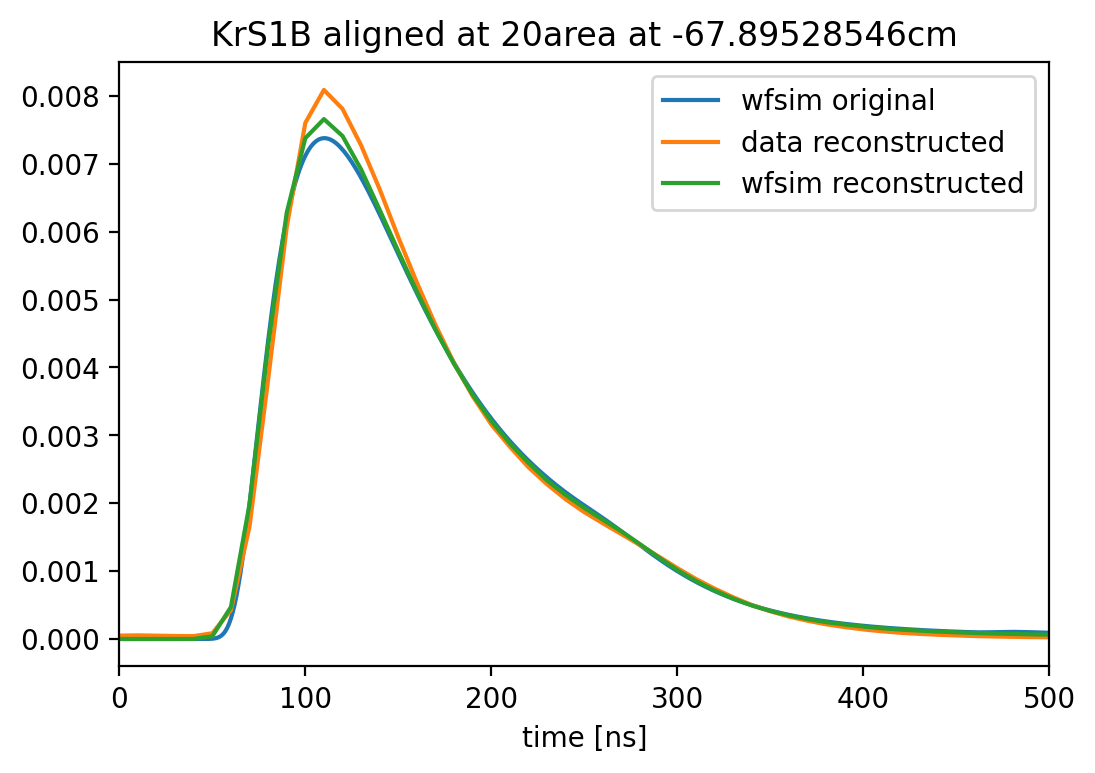

In [118]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(787),sim_wfs[i,13:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

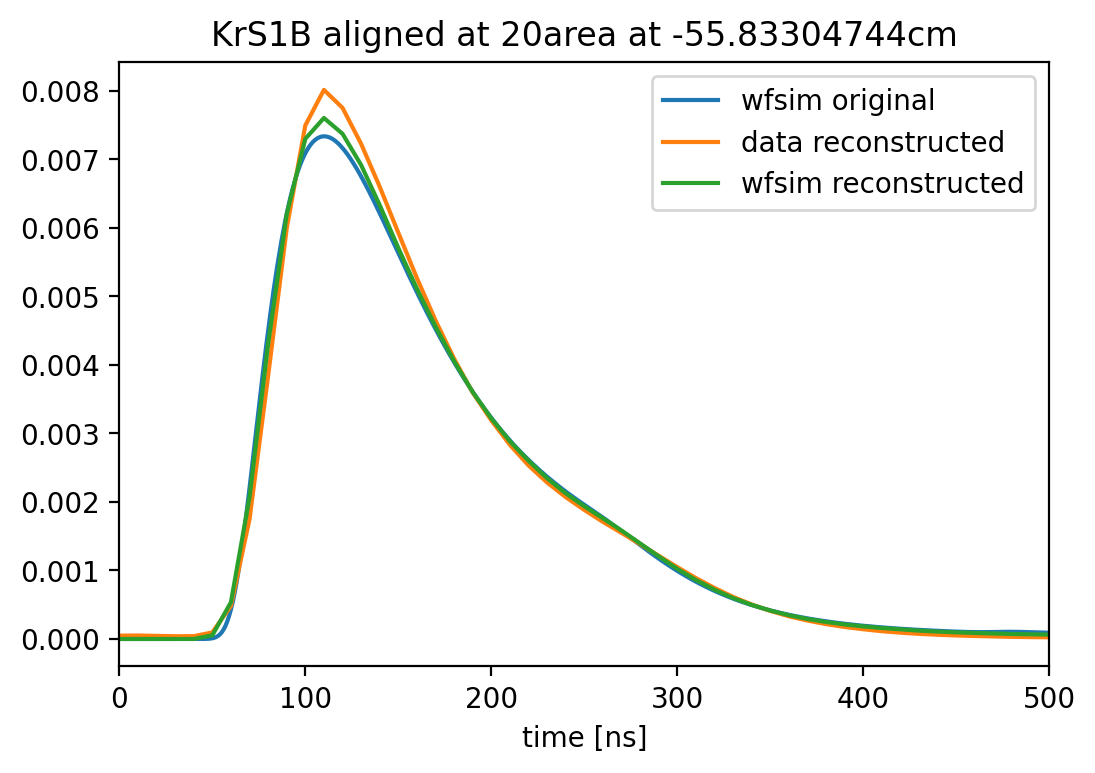

In [120]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

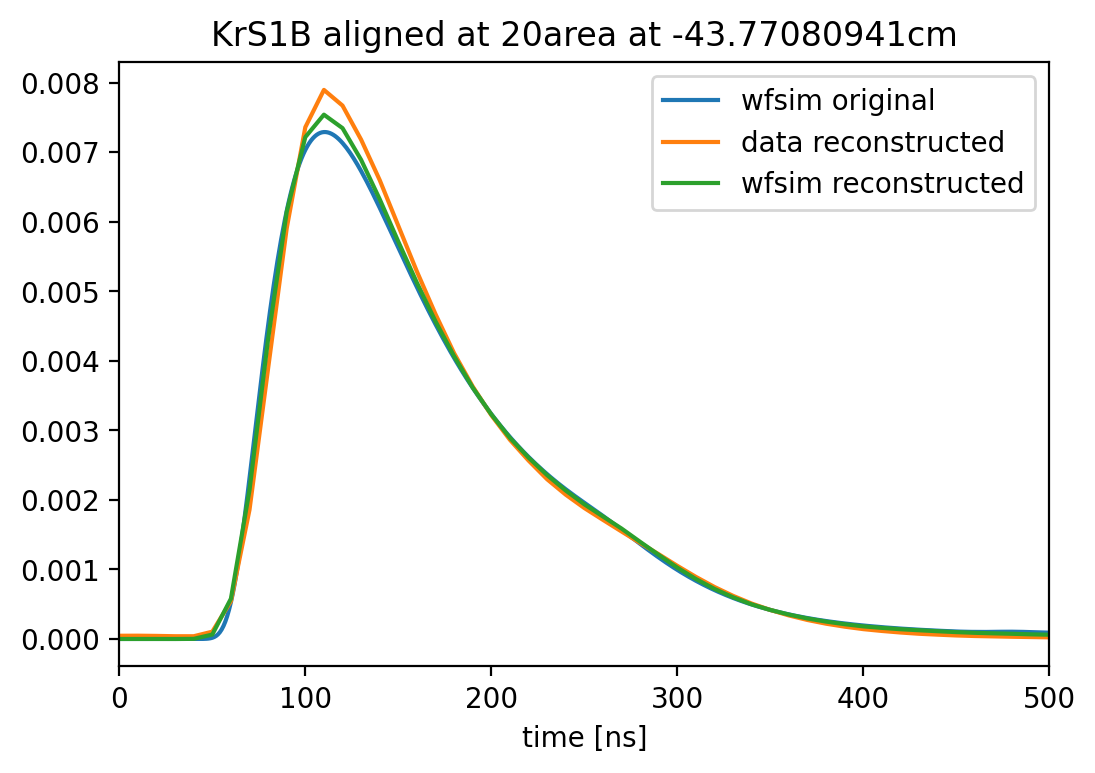

In [122]:
i = 7
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

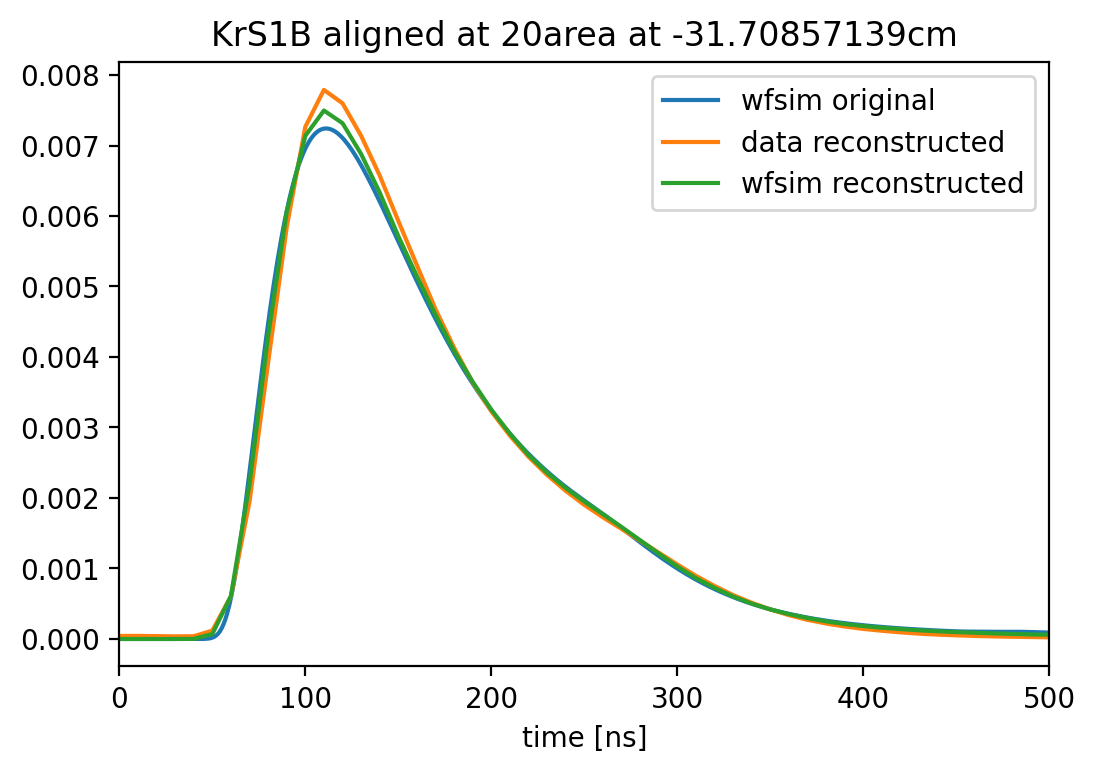

In [125]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(787),sim_wfs[i,13:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

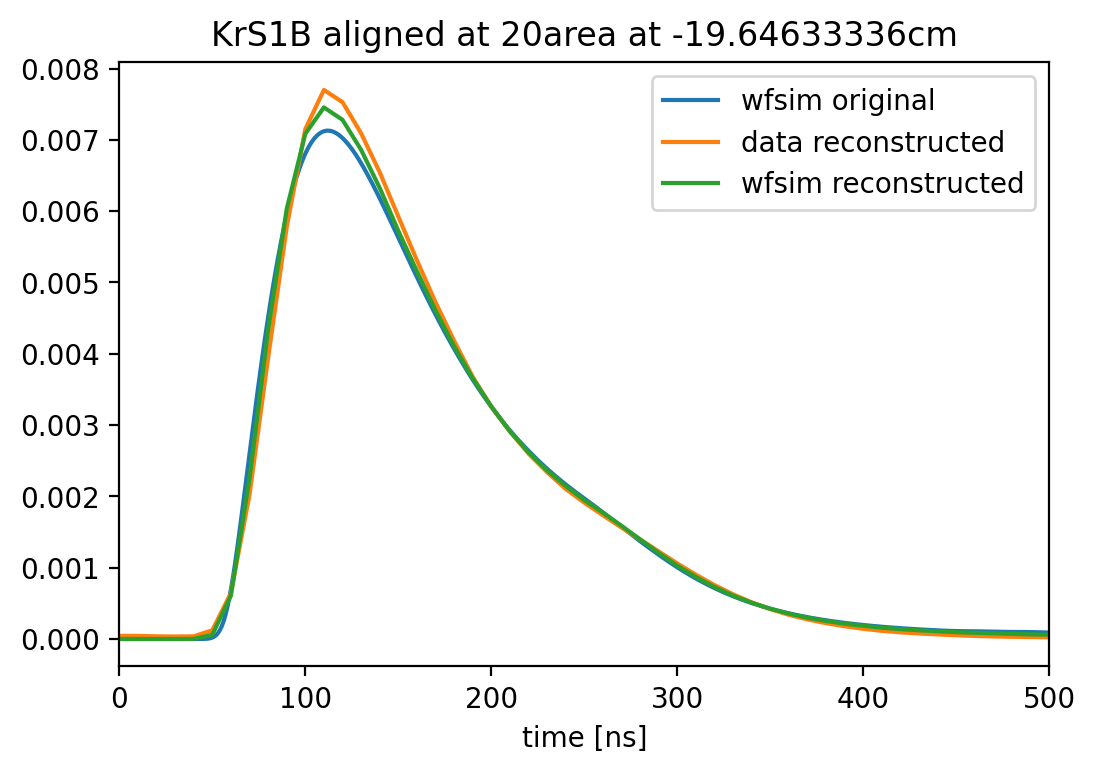

In [130]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(789),sim_wfs[i,11:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1b_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1B aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

# Ar37

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



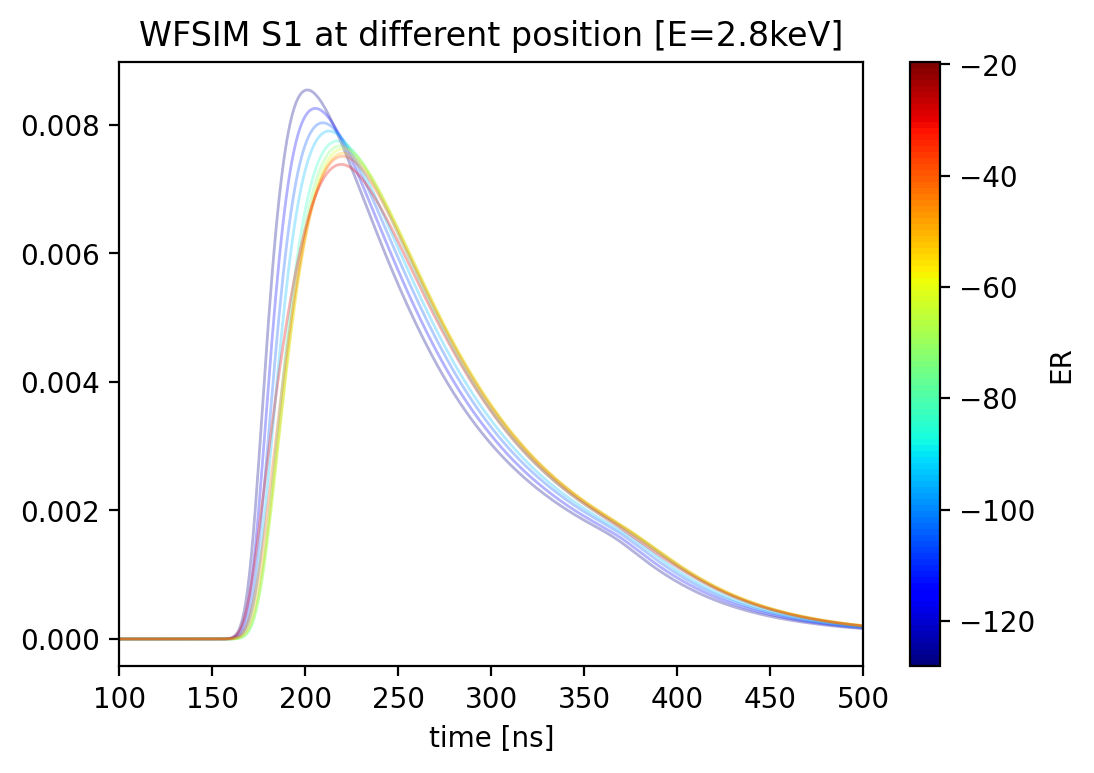

In [80]:
import matplotlib as mpl
plt.figure(dpi=200)

sim_wfs = np.zeros((10,800))

colors_er = plt.get_cmap('jet', 101)
#colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=7, e_dep=2.8)
    #y2 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=0, e_dep=10)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    #plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)
    sim_wfs[e] = y1[100:900]

norm = mpl.colors.Normalize(vmin=ZSLIACES[0], vmax=ZSLIACES[-1])
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
#sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
#sm2.set_array([])
cb1 = plt.colorbar(sm1)
#cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
#cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different position [E=2.8keV]')
plt.xlim(100,500)
plt.show()

In [33]:
ars1_peak_extra = extraction.get_peak_extra(runs=AR_AVAILABLE, signal_type='ArS1')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

In [34]:
import pandas as pd
import wfsim
import strax
import numpy as np
import nestpy
print("NESTPY" , nestpy.__version__, nestpy.__file__)

NSUMWVSAMPLES = 200
NWIDTHS = 11

nc = nestpy.NESTcalc(nestpy.DetectorExample_XENON10())
density = 2.94
driftfield= 18.3
energy_32 = 32
total_ces_std=2.8
denergy_32 = 0.88*total_ces_std
energy_9 = 9
denergy_9 = 0.47*total_ces_std
energy_3 = 2.8
denergy_3 = 0


def instruction(energy, denergy, N_events=1):    
    instr = np.zeros(N_events , wfsim.instruction_dtype)
    #instr['x'] = evt['x']
    #instr['y'] = evt['y']
    instr['z'] = np.random.uniform(-134,-13)
    instr['type'] = 1
    instr['recoil'] = 11
    instr['local_field'] = driftfield

    for i in range(0, N_events):
        e = np.random.normal(energy, denergy)
        yields = nc.GetYields(nestpy.INTERACTION_TYPE(7), e, density, driftfield)
        cur_q = nc.GetQuanta(yields)
        instr['time'][i] = (i+1) * int(1e6)
        instr['amp'][i] = cur_q.photons
        instr['n_excitons'][i] = cur_q.excitons
        instr['e_dep'][i] = e
    
    return instr  


# 2.8 keV
fax_instr = []
N_events = 1
for j in range(100000):
    temp = instruction(energy_3, denergy_3, N_events)
    temp['time'] = temp['time'] + j * N_events * int(1e6)
    fax_instr.append(temp)
fax_instr = np.concatenate(fax_instr)
pd.DataFrame(fax_instr).to_csv('/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv', index=False)

stwf = straxen.contexts.xenonnt_simulation(
    cmt_run_id_sim = '034000',
    output_folder='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data',
    fax_config='fax_config_nt_sr0_v0.json',)

stwf.set_config(dict(fax_config_override={
    's1_model_type': 'nest+optical_propagation',
    's1_pattern_map': '/dali/lgrandi/xenonnt/simulations/optphot/mc_v4.1.0/S1_1.69_0.99_0.99_0.99_0.99_10000_100_30/XENONnT_S1_xyz_patterns_LCE_MCv4.1.0_wires.pkl',
    's1_time_spline': 'XENONnT_s1_proponly_va43fa9b_wires_20200625.json.gz',
    'enable_noise': True,
    'enable_electron_afterpulses': True,
    'enable_pmt_afterpulses': True,
}))

stwf.set_config(
    dict(fax_file='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv',
         right_raw_extension=20000,
         event_rate=1000,
         chunk_size=1,
         nchunk=10,))


def sim_peak_extra(peaks, peak_basics, truth, match):
    dtypes = [
        (('Start time of the peak (ns since unix epoch)',
          'time'), np.int64),
        (('End time of the peak (ns since unix epoch)',
          'endtime'), np.int64),
        (('Weighted center time of the peak (ns since unix epoch)',
          'center_time'), np.int64),
        (('Peak integral in PE',
            'area'), np.float32),
        (('Number of PMTs contributing to the peak',
            'n_channels'), np.int16),
        (('PMT number which contributes the most PE',
            'max_pmt'), np.int16),
        (('Area of signal in the largest-contributing PMT (PE)',
            'max_pmt_area'), np.float32),
        (('Total number of saturated channels',
          'n_saturated_channels'), np.int16),
        (('Width (in ns) of the central 50% area of the peak',
            'range_50p_area'), np.float32),
        (('Width (in ns) of the central 90% area of the peak',
            'range_90p_area'), np.float32),
        (('Fraction of area seen by the top array '
          '(NaN for peaks with non-positive area)',
            'area_fraction_top'), np.float32),
        (('Length of the peak waveform in samples',
          'length'), np.int32),
        (('Time resolution of the peak waveform in ns',
          'dt'), np.int16),
        (('Time between 10% and 50% area quantiles [ns]',
          'rise_time'), np.float32),
        (('Hits within tight range of mean',
          'tight_coincidence'), np.int16),
        (('PMT channel within tight range of mean',
          'tight_coincidence_channel'), np.int16),
        (('Classification of the peak(let)',
          'type'), np.int8),
        (('Waveform data in PE/sample (not PE/ns!)',
          'data'), np.float32, NSUMWVSAMPLES),
        (('Peak widths: time between nth and 5th area decile [ns]',
          'area_decile_from_midpoint'), np.float32, NWIDTHS),
        (('x coordinates', 'x'), np.float32),
        (('y coordinates', 'y'),np.float32),
        (('z coordinates', 'z'), np.float32),
    ]
    
    peak_indecies = match['matched_to']
    peaks = peaks[peak_indecies]
    peak_basics = peak_basics[peak_indecies]
    
    peak_extra = np.zeros(len(peaks), dtype=dtypes)
    
    for i in range(len(dtypes)):
        field = dtypes[i][0][1]
        if field == 'data' or field == 'area_decile_from_midpoint':
            peak_extra[field] = peaks[field]
        elif field == 'x' or field == 'y' or field == 'z':
            peak_extra[field] = truth[field]
        else:
            peak_extra[field] = peak_basics[field]
    
    return peak_extra

NESTPY 1.5.0 /opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/nestpy/__init__.py


*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [35]:
import pema
stwf.register_all(pema.match_plugins)

ars1_sim_peaks = stwf.get_array('ars1_test1', 'peaks')
truth = stwf.get_array('ars1_test1', 'truth')
ars1_match = stwf.get_array('ars1_test1', 'match_acceptance_extended')
ars1_sim_peak_basics = stwf.get_array('ars1_test1', 'peak_basics')
ars1_sim_peak_extra = sim_peak_extra(ars1_sim_peaks, ars1_sim_peak_basics, truth, ars1_match)

Loading peaks: |          | 0.00 % [00:00<?]

Loading truth: |          | 0.00 % [00:00<?]

Loading match_acceptance_extended: |          | 0.00 % [00:00<?]

Loading peak_basics: |          | 0.00 % [00:00<?]

## No alignment

290613it [00:04, 69662.14it/s]


(0.0, 50.0)

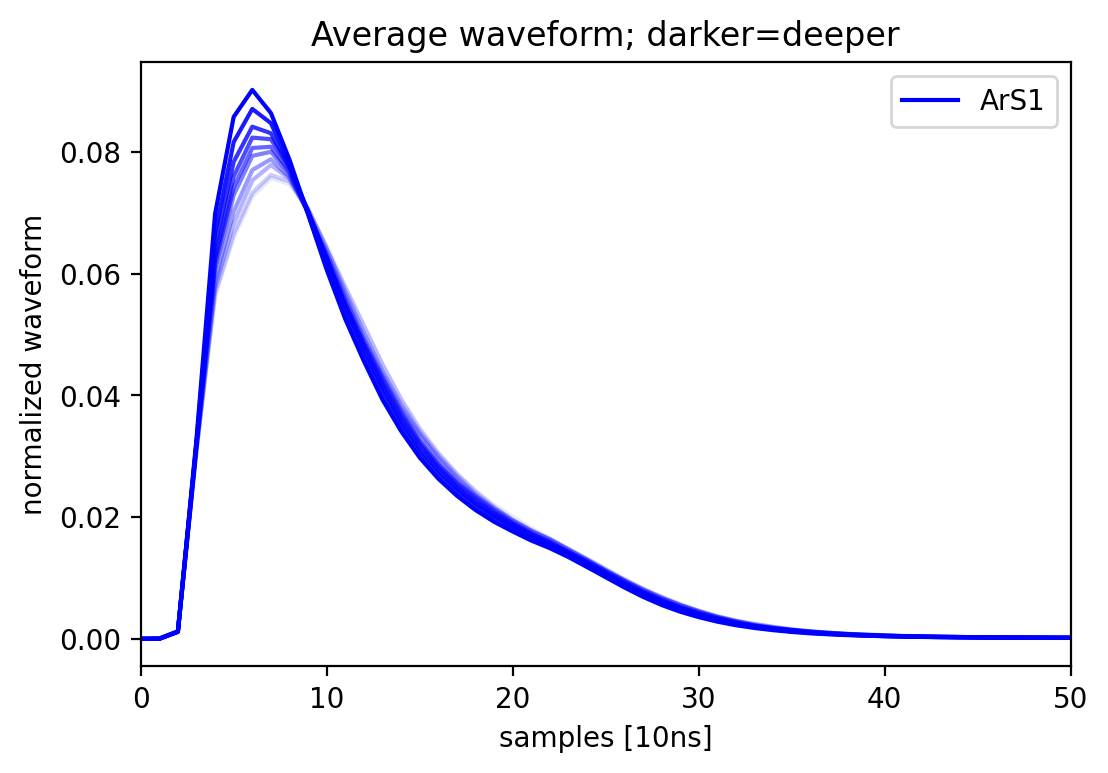

In [36]:
# data

ars1_aligned_area20 = alignment.align_area_range(ars1_peak_extra)

peaks = ars1_peak_extra[(ars1_peak_extra['dt']==10)&(ars1_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
ars1_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
ars1_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    ars1_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    ars1_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)

(0.0, 50.0)

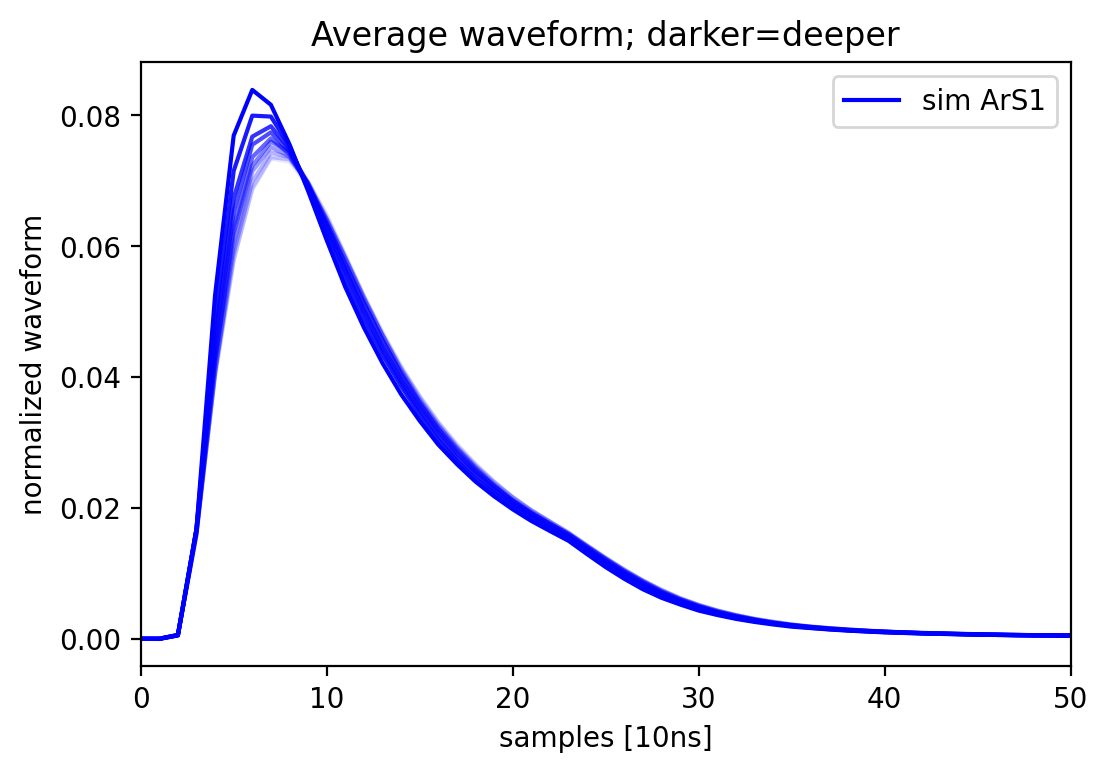

In [38]:
peaks = ars1_sim_peak_extra[(ars1_sim_peak_extra['dt']==10)&(ars1_sim_peak_extra['area']>18)]

# compute average waveform
sim_ars1_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
sim_ars1_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    sim_ars1_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    sim_ars1_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(sim_ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='sim ArS1')
    else:
        plt.plot(sim_ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)

(0.0, 500.0)

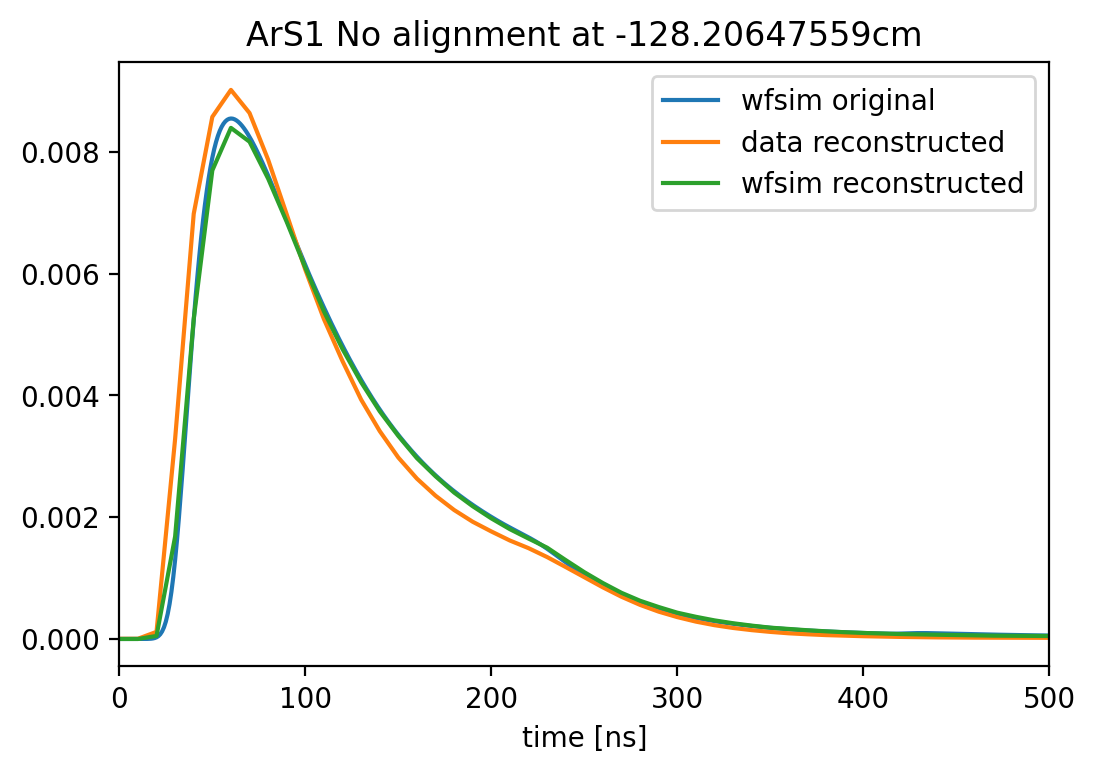

In [41]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(759),sim_wfs[i,41:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

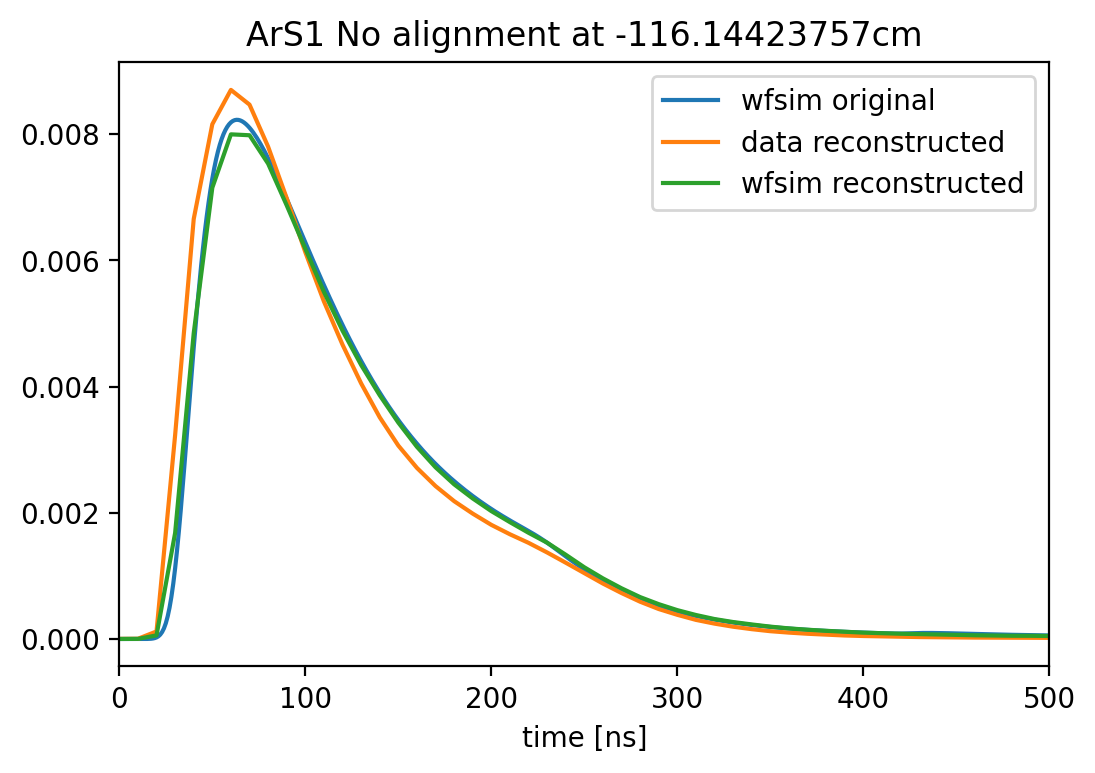

In [43]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

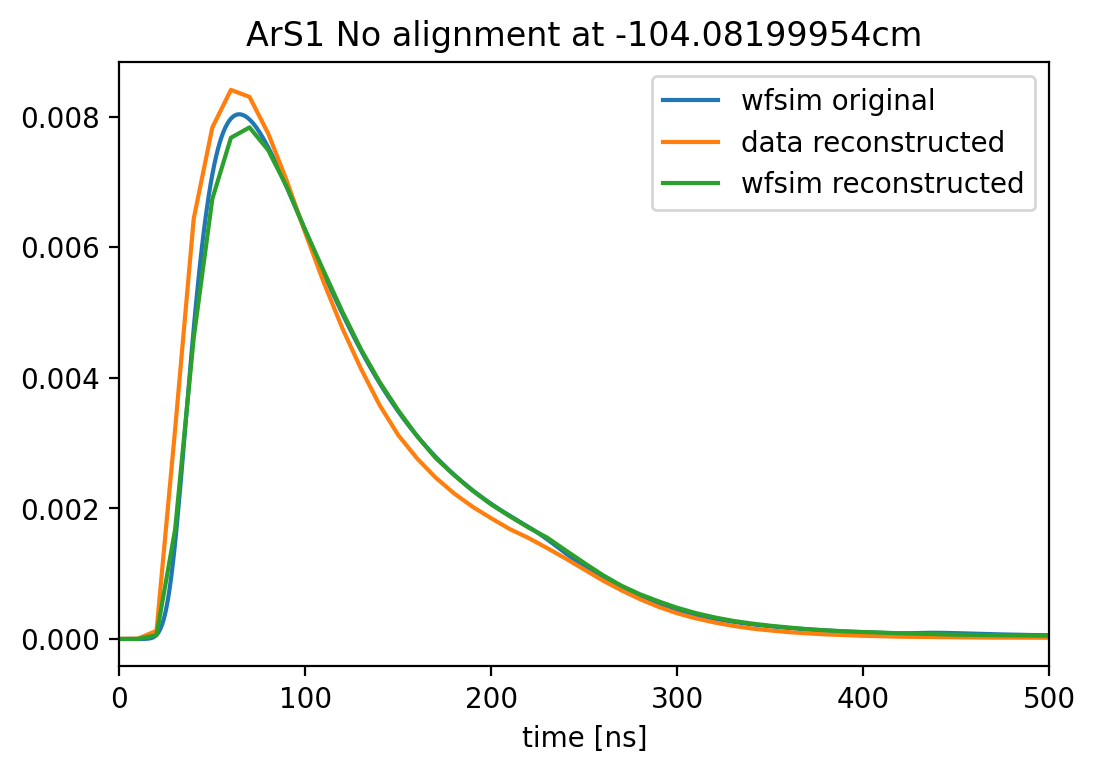

In [45]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(755),sim_wfs[i,45:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

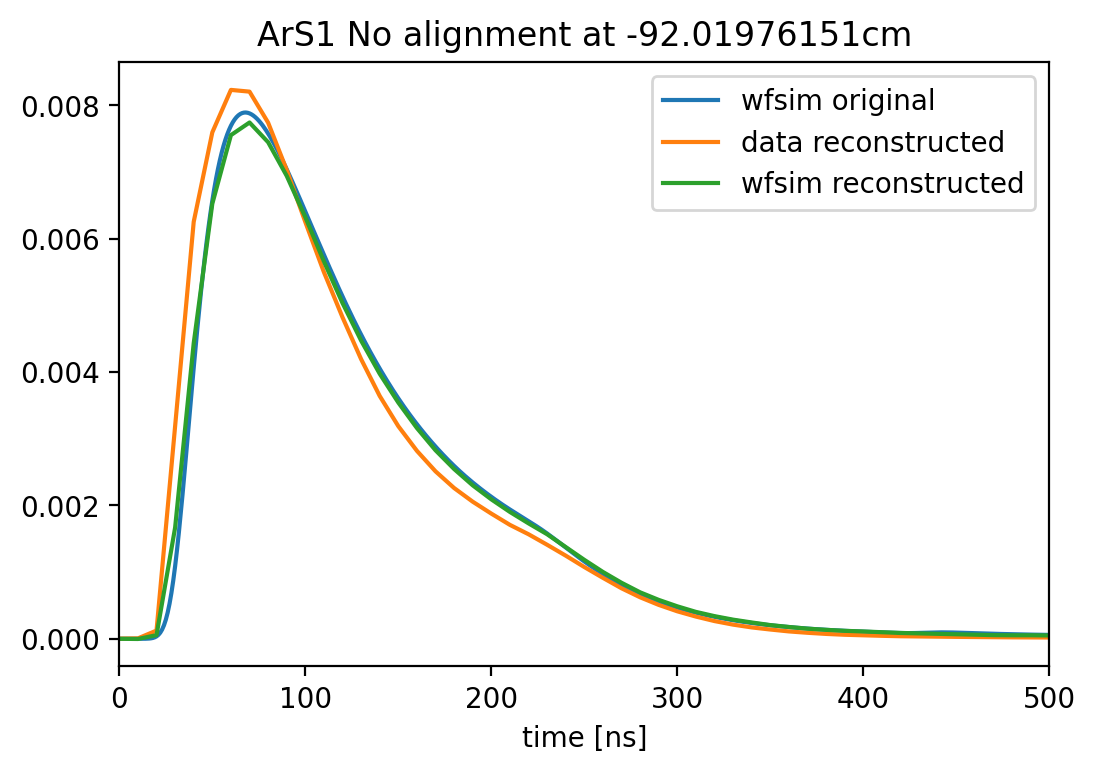

In [47]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(755),sim_wfs[i,45:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

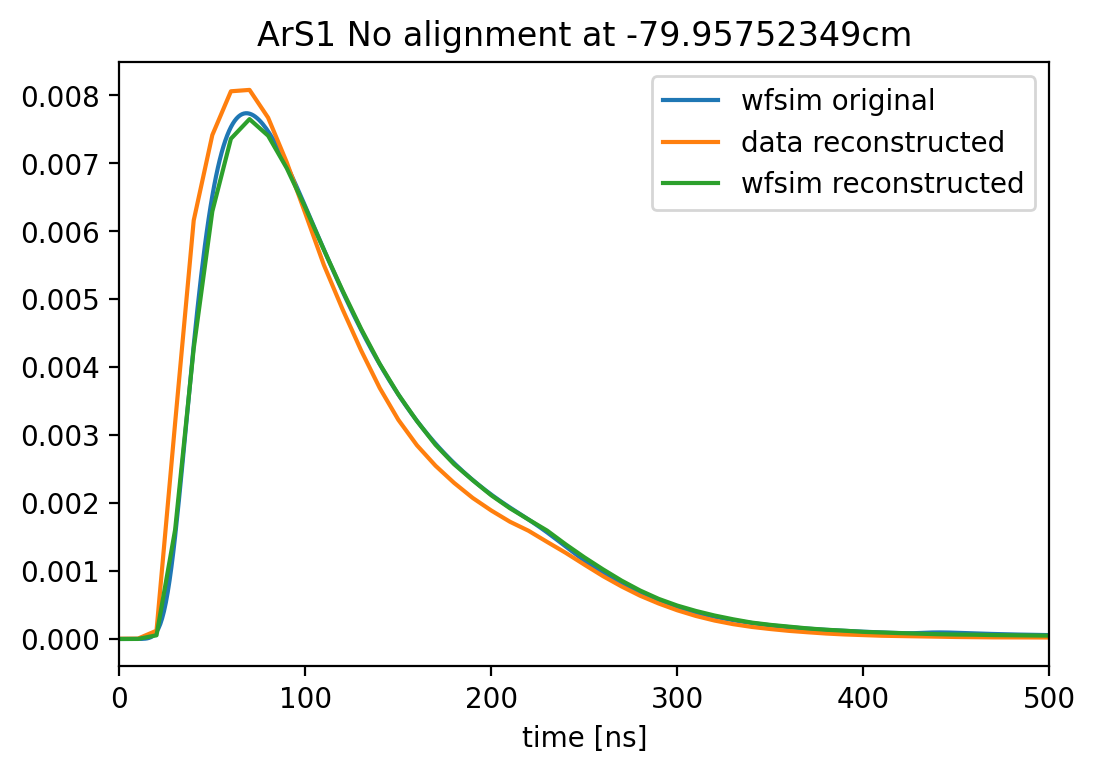

In [49]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(751),sim_wfs[i,49:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

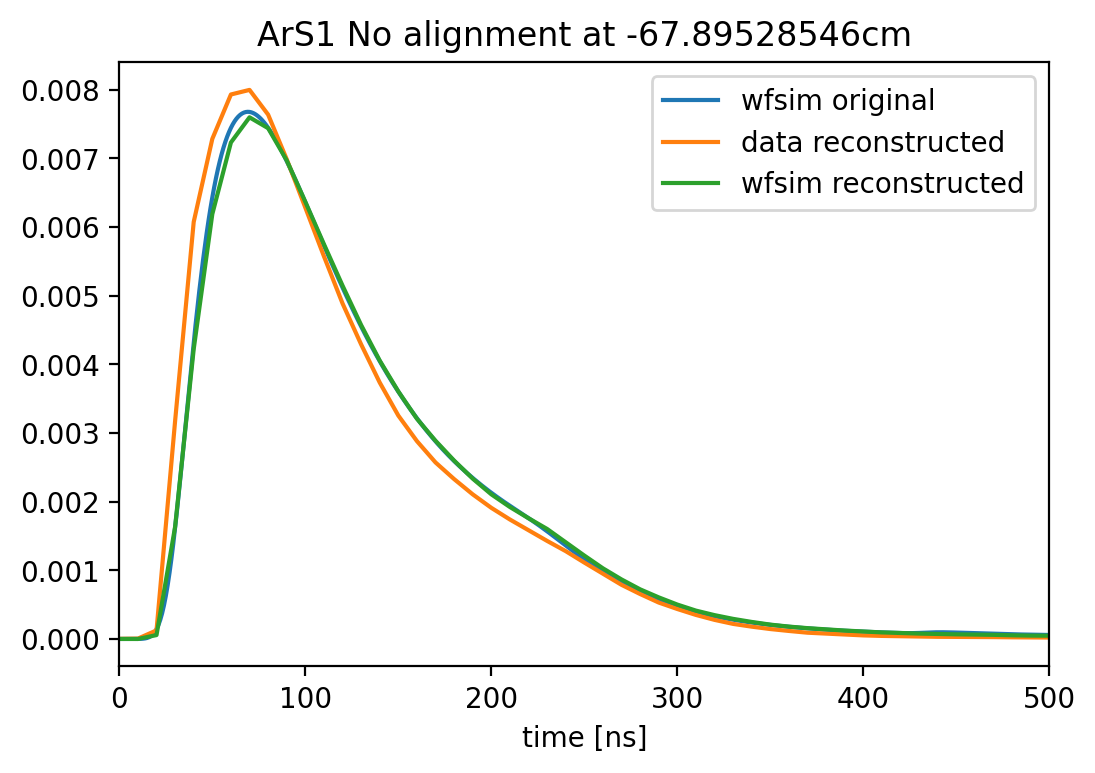

In [51]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(750),sim_wfs[i,50:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

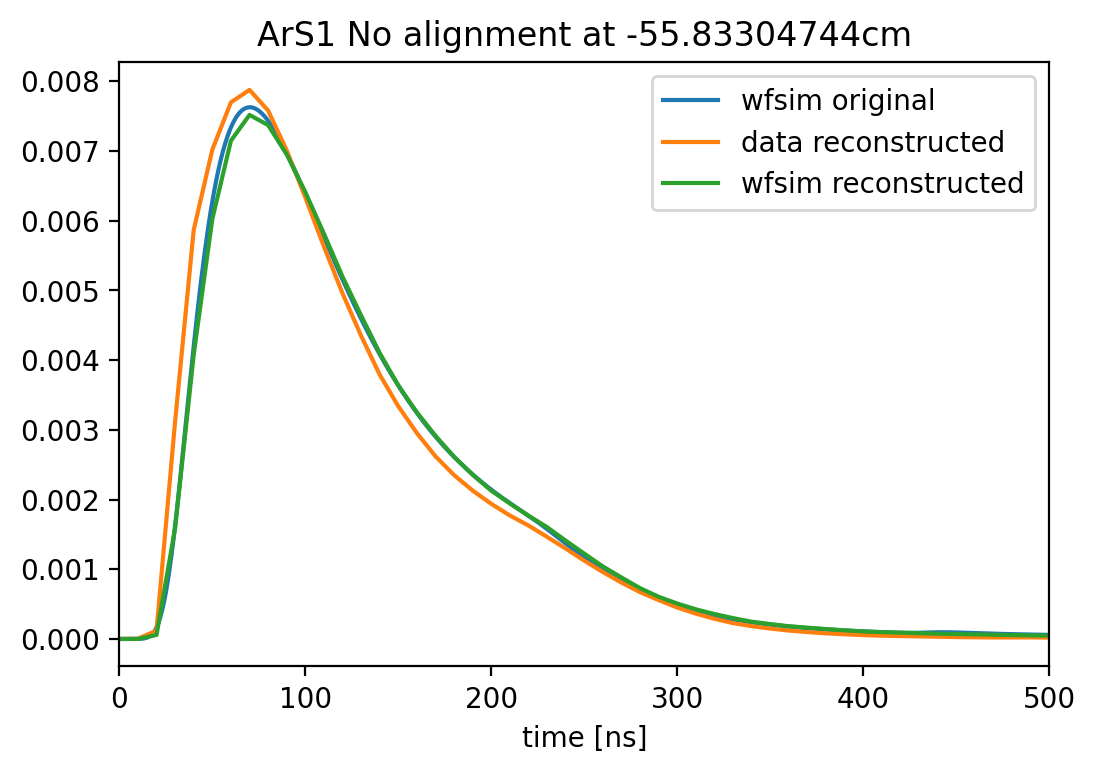

In [53]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(750),sim_wfs[i,50:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

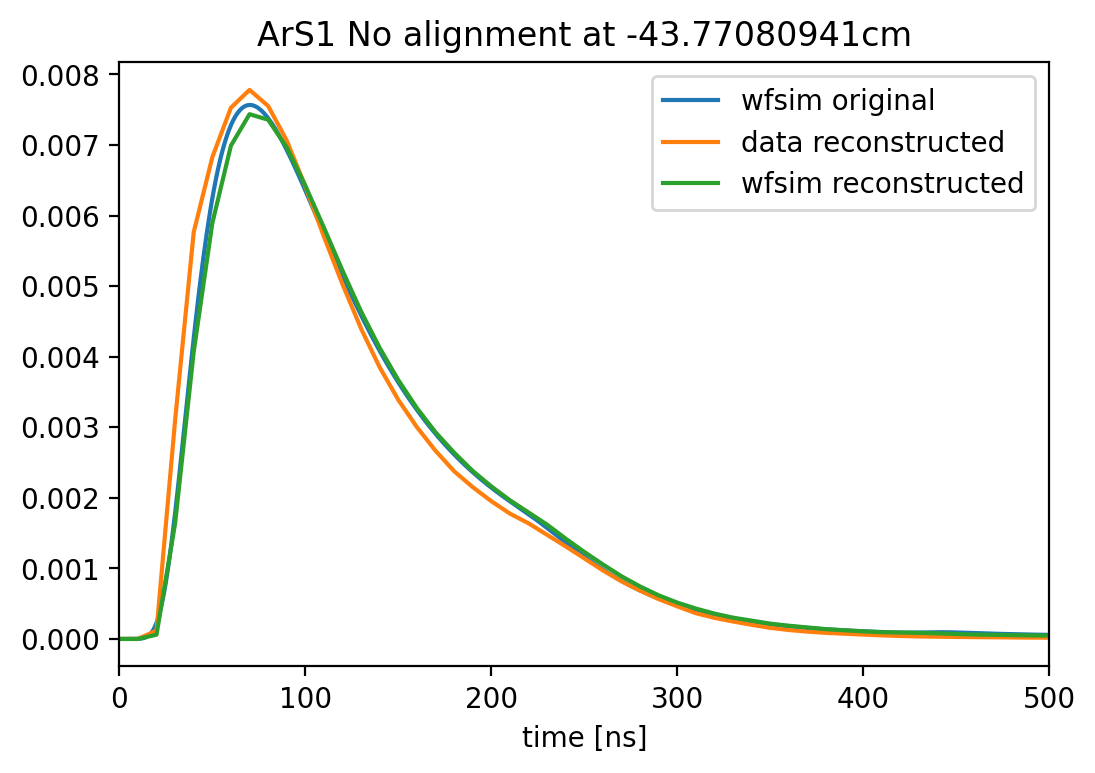

In [55]:
i = 7
plt.figure(dpi=200)
plt.plot(np.arange(750),sim_wfs[i,50:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

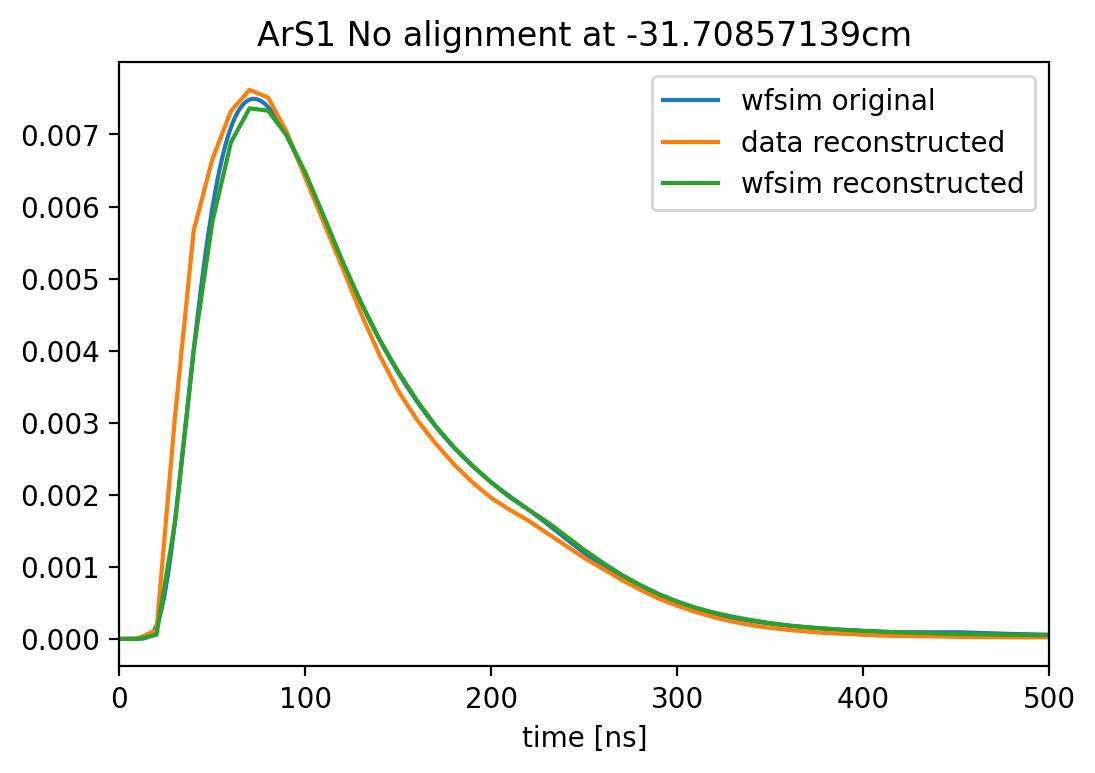

In [57]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(752),sim_wfs[i,48:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

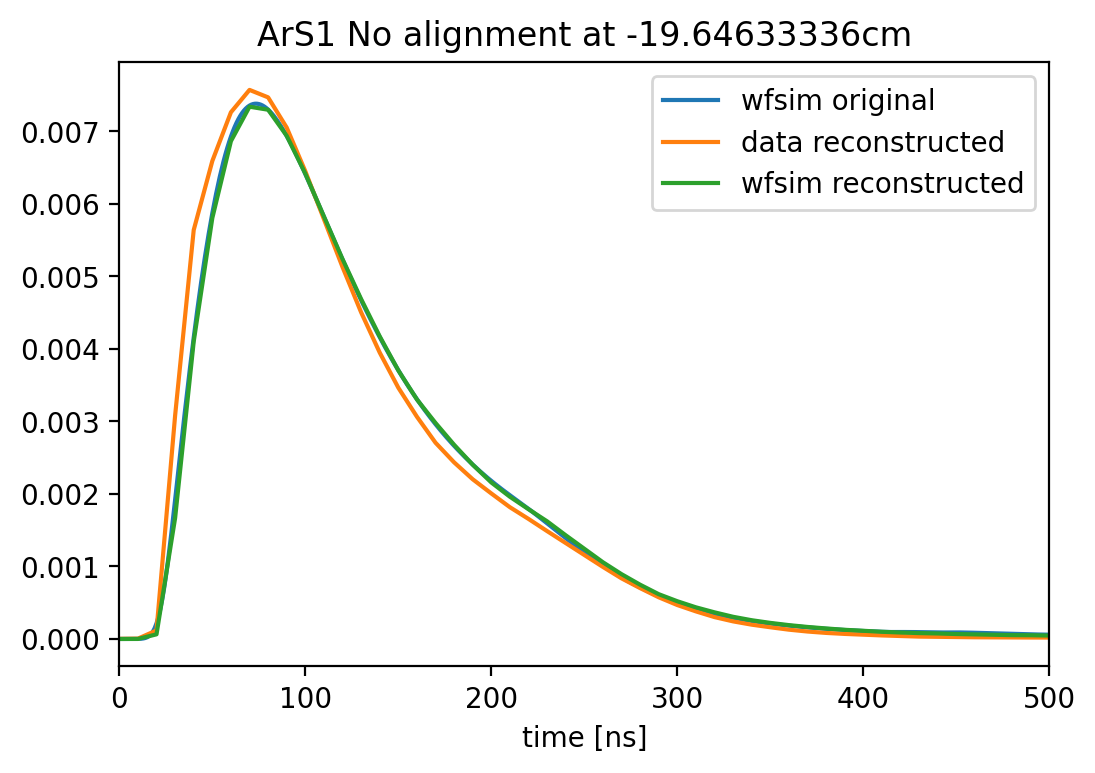

In [59]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(754),sim_wfs[i,46:], label='wfsim original')
plt.plot(np.arange(200)*10, ars1_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_ars1_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('ArS1 No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

## Area 20 percent

290613it [00:04, 70979.59it/s]


(40.0, 90.0)

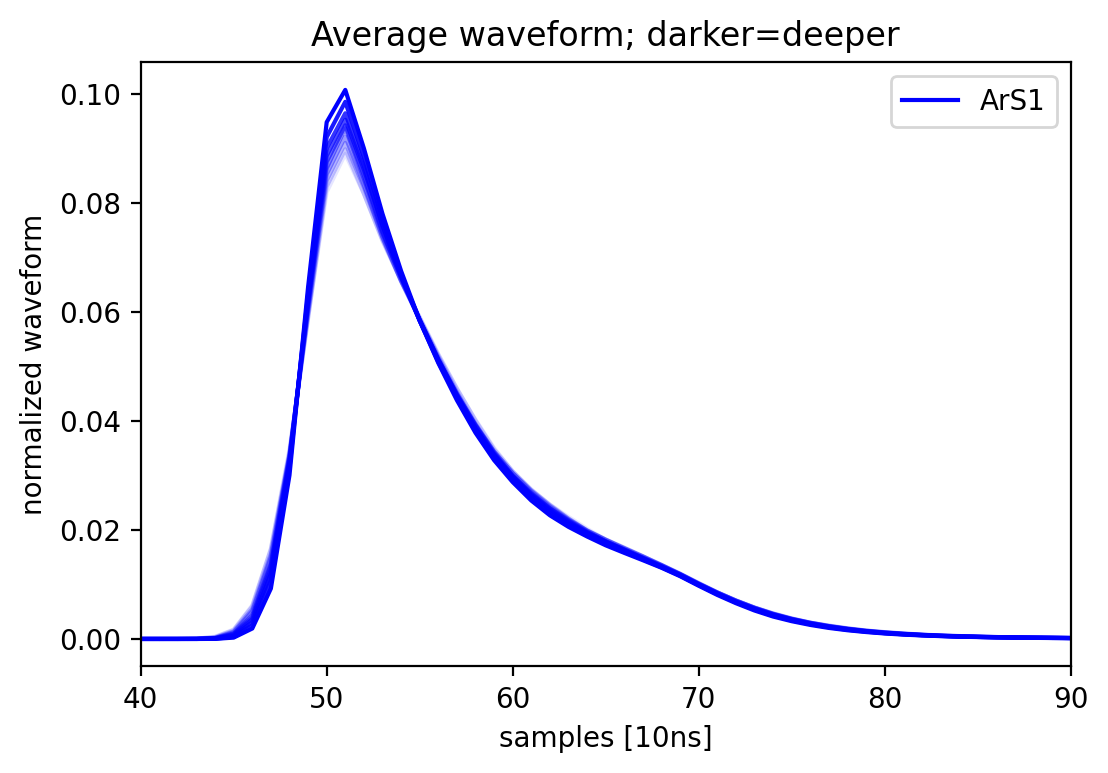

In [60]:
# data
ars1_aligned_area20 = alignment.align_area_range(ars1_peak_extra)

peaks = ars1_peak_extra[(ars1_peak_extra['dt']==10)&(ars1_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
ars1_avg_wf_mean = np.zeros((len(z_slices)-1, len(ars1_aligned_area20[0])))
ars1_avg_wf_err = np.zeros((len(z_slices)-1, len(ars1_aligned_area20[0])))
for i in range(len(z_slices)-1):
    peaks_z = ars1_aligned_area20[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    ars1_avg_wf_mean[i] = np.mean(peaks_z, axis=0)
    ars1_avg_wf_err[i] = np.std(peaks_z, axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        #plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(40,90)

99994it [00:01, 75337.41it/s]


(40.0, 90.0)

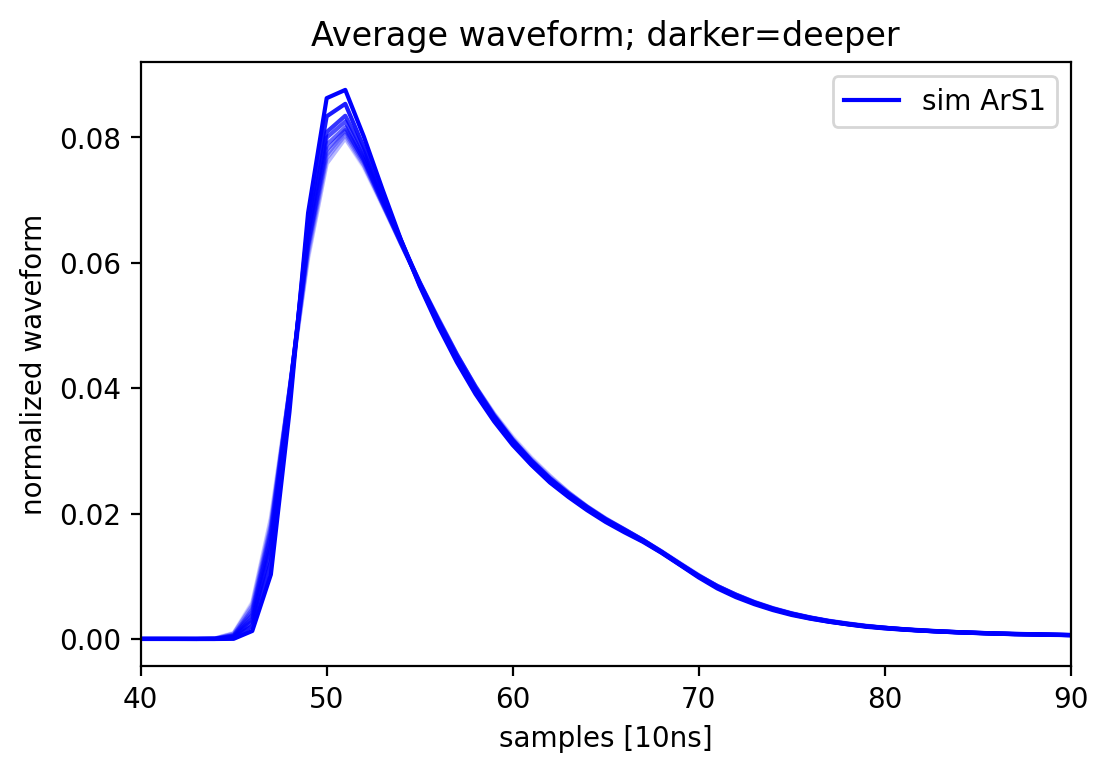

In [61]:
sim_ars1_peak_extra = ars1_sim_peak_extra
sim_ars1_aligned_area20 = alignment.align_area_range(sim_ars1_peak_extra)

peaks = sim_ars1_peak_extra[(sim_ars1_peak_extra['dt']==10)&(sim_ars1_peak_extra['area']>18)]

# compute average waveform
sim_ars1_avg_wf_mean = np.zeros((len(z_slices)-1, len(sim_ars1_aligned_area20[0])))
sim_ars1_avg_wf_err = np.zeros((len(z_slices)-1, len(sim_ars1_aligned_area20[0])))
for i in range(len(z_slices)-1):
    peaks_z = sim_ars1_aligned_area20[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    sim_ars1_avg_wf_mean[i] = np.mean(peaks_z, axis=0)
    sim_ars1_avg_wf_err[i] = np.std(peaks_z, axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(sim_ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='sim ArS1')
    else:
        plt.plot(sim_ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(40,90)

(0.0, 500.0)

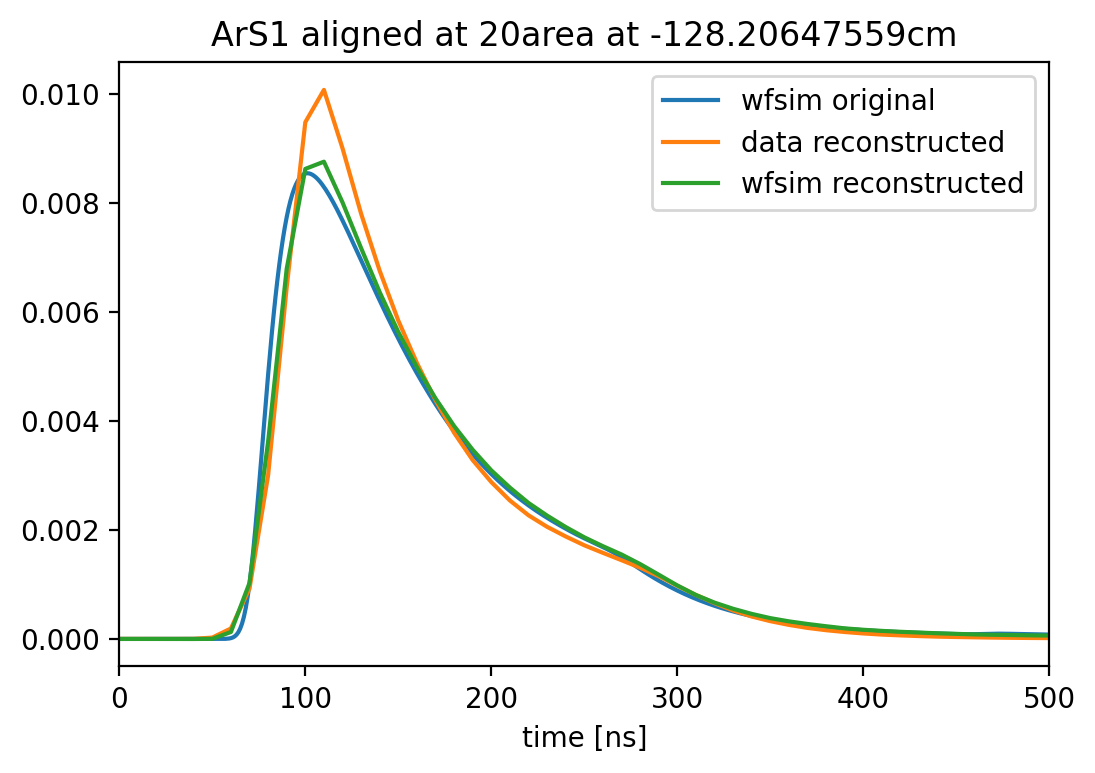

In [62]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(800),sim_wfs[i], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

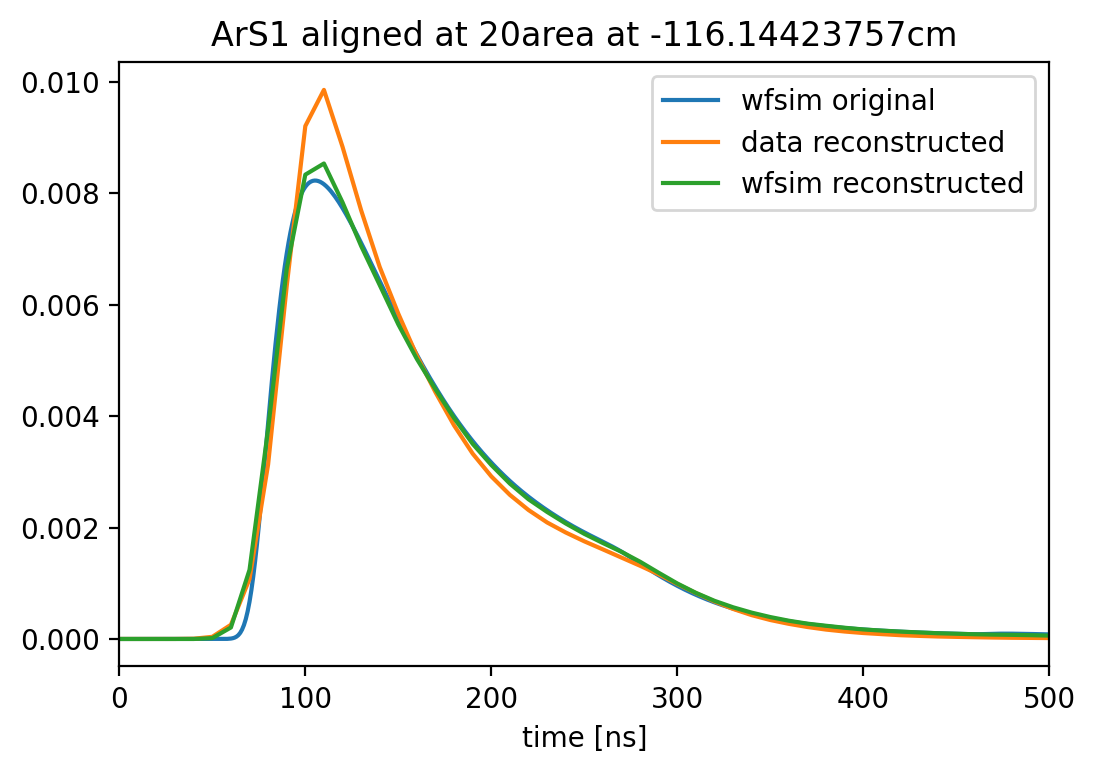

In [63]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(800),sim_wfs[i], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

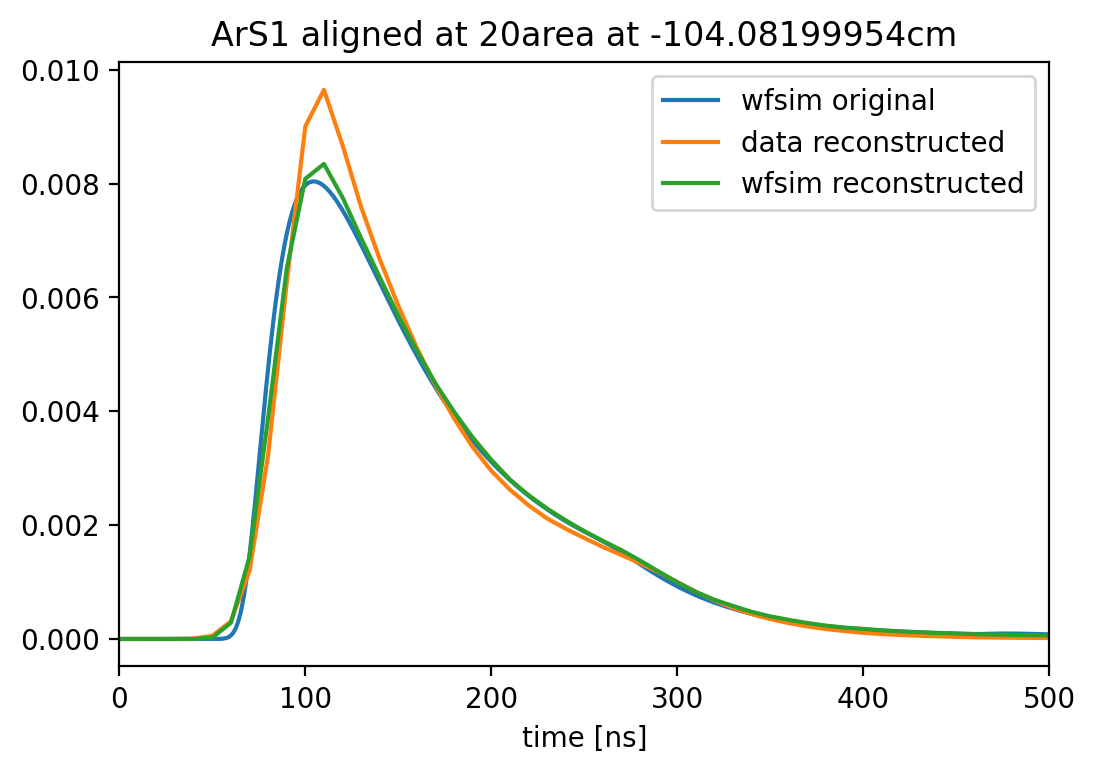

In [64]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(795),sim_wfs[i,5:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

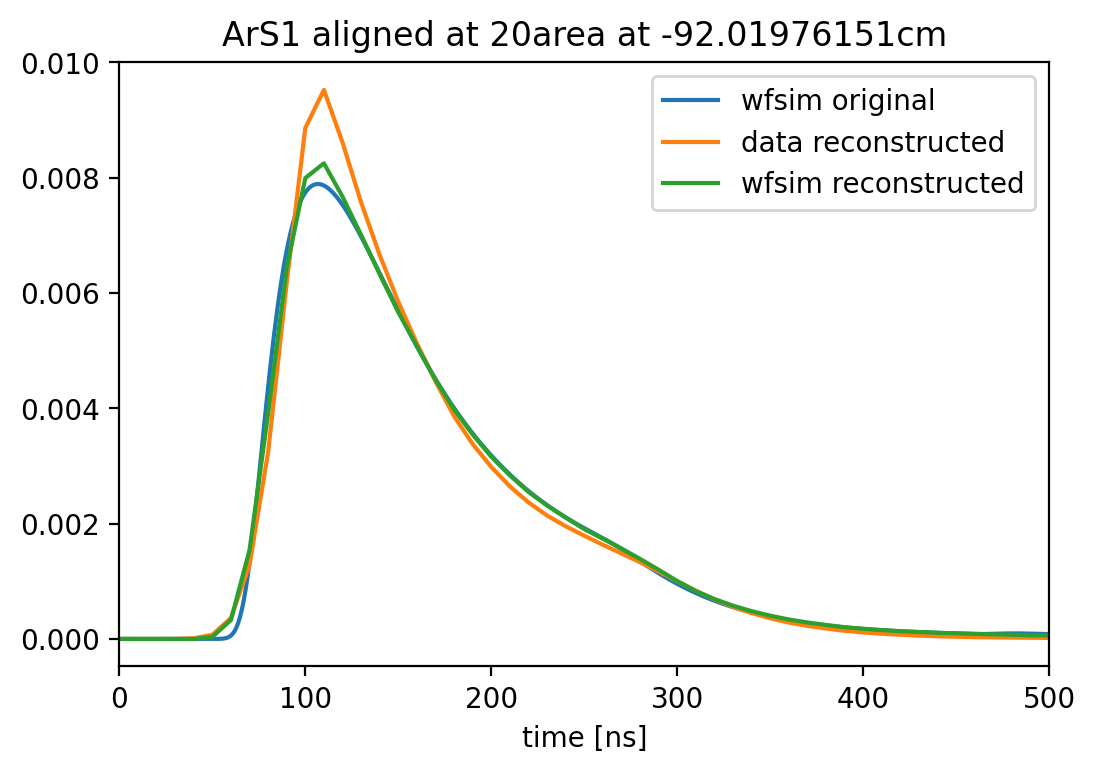

In [65]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(794),sim_wfs[i,6:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

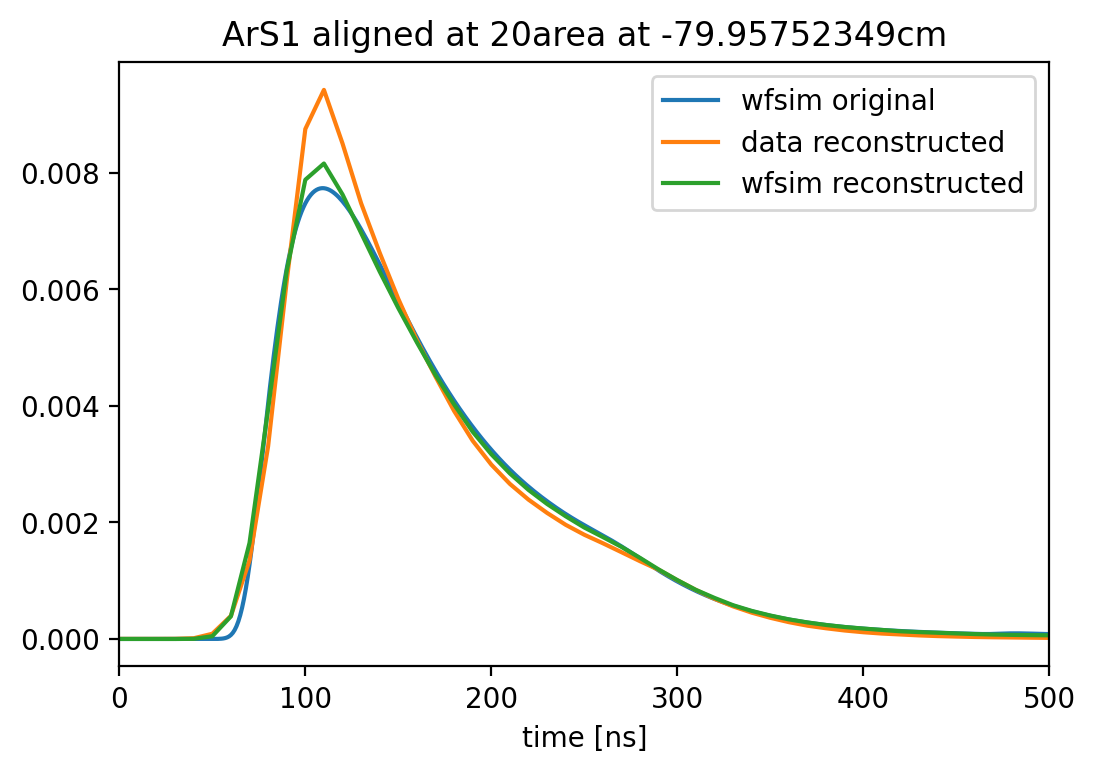

In [67]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(792),sim_wfs[i,8:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

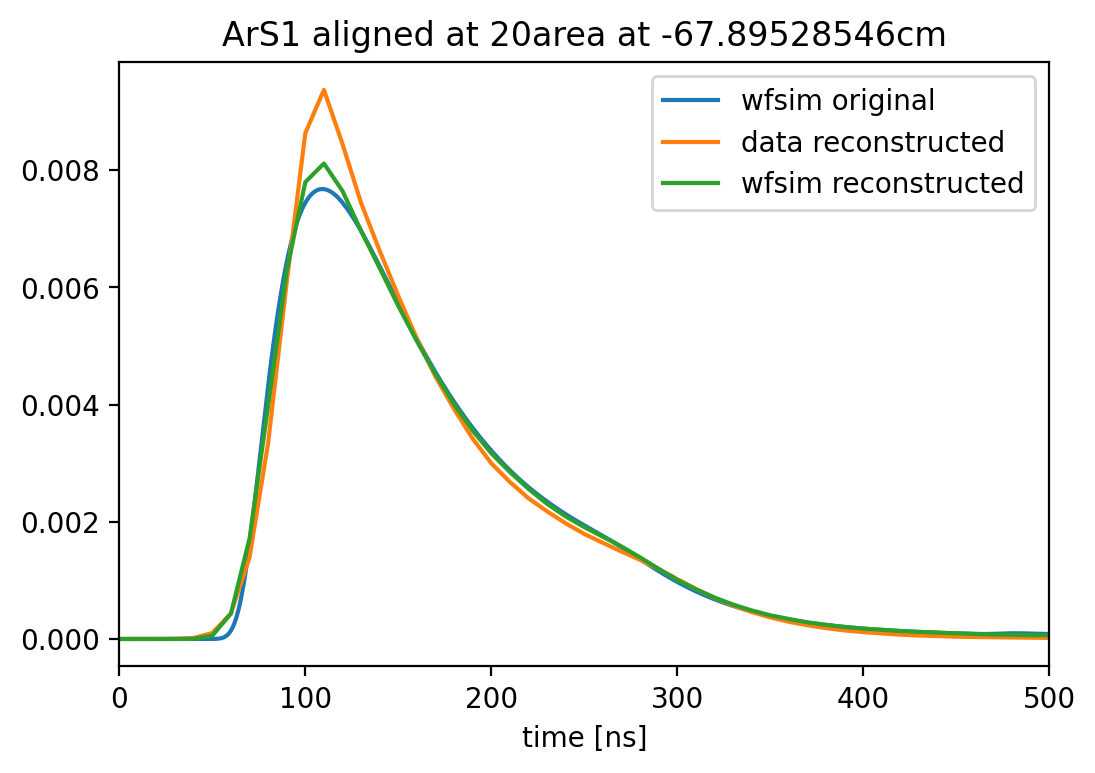

In [70]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(790),sim_wfs[i,10:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

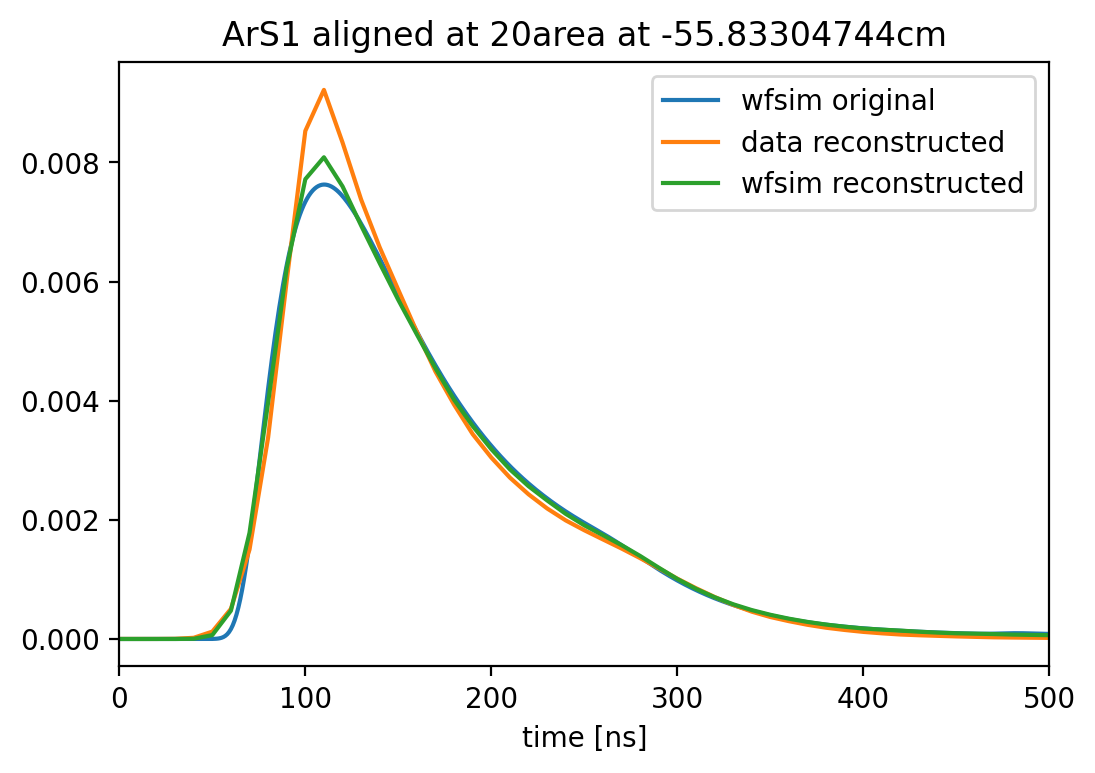

In [72]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(790),sim_wfs[i,10:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

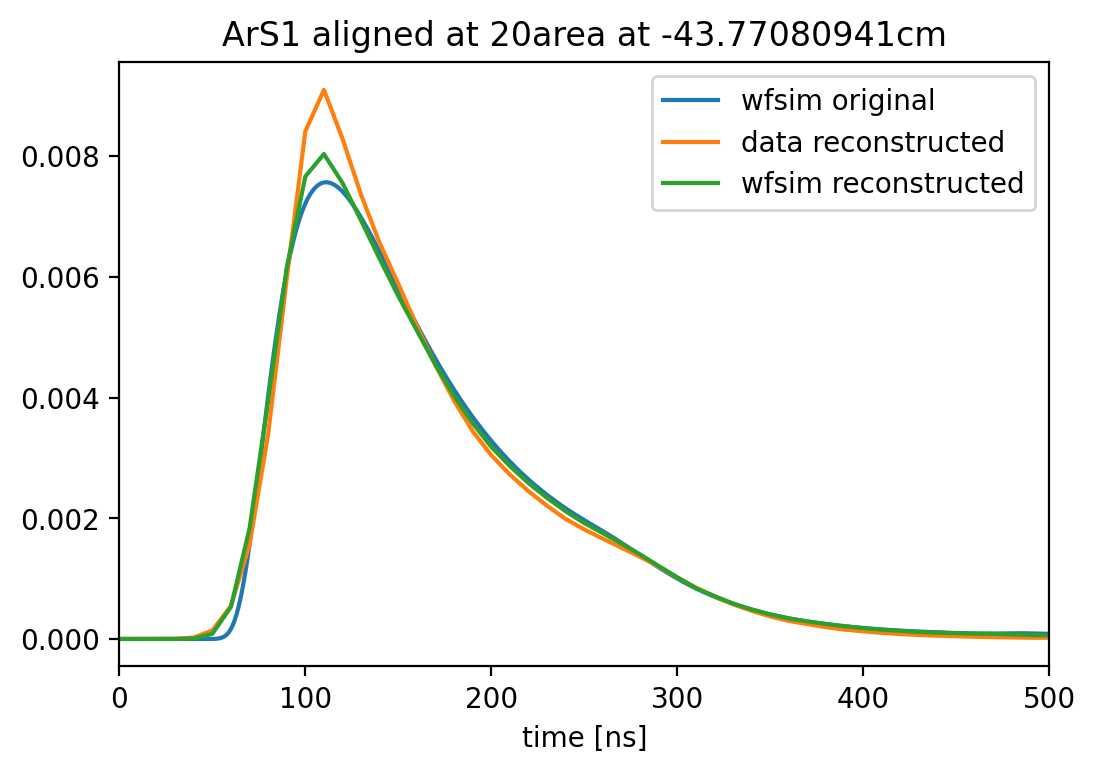

In [74]:
i = 7
plt.figure(dpi=200)
plt.plot(np.arange(791),sim_wfs[i,9:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

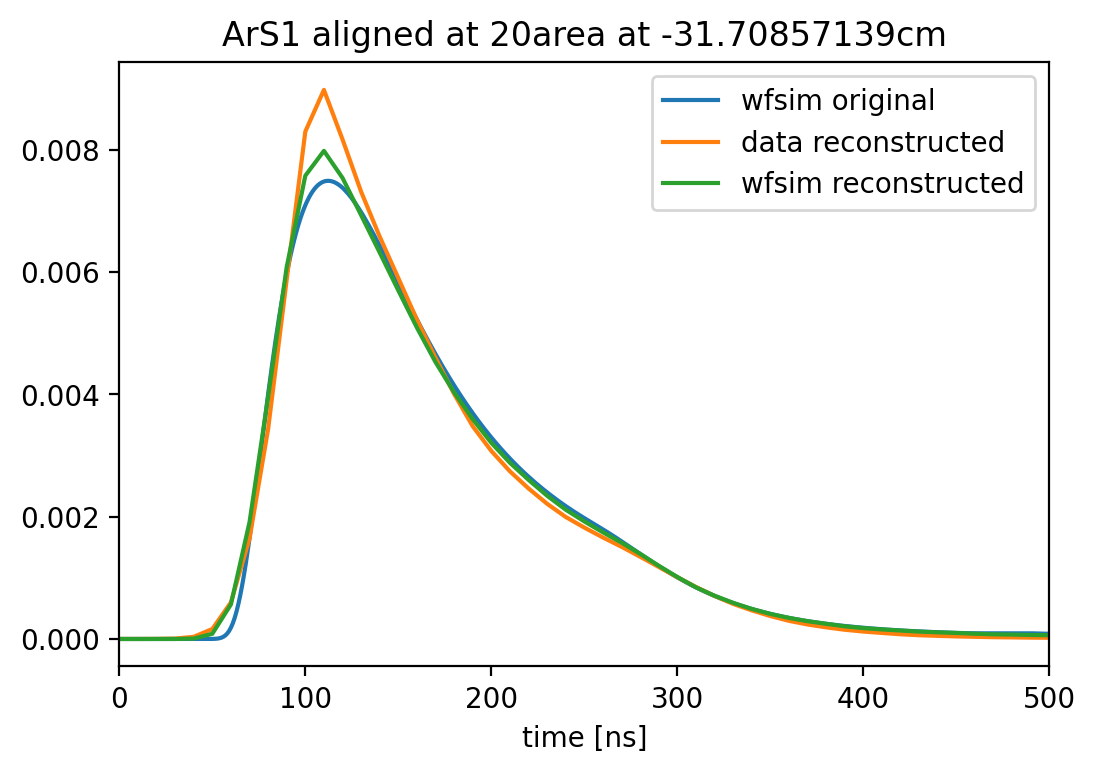

In [76]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(792),sim_wfs[i,8:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

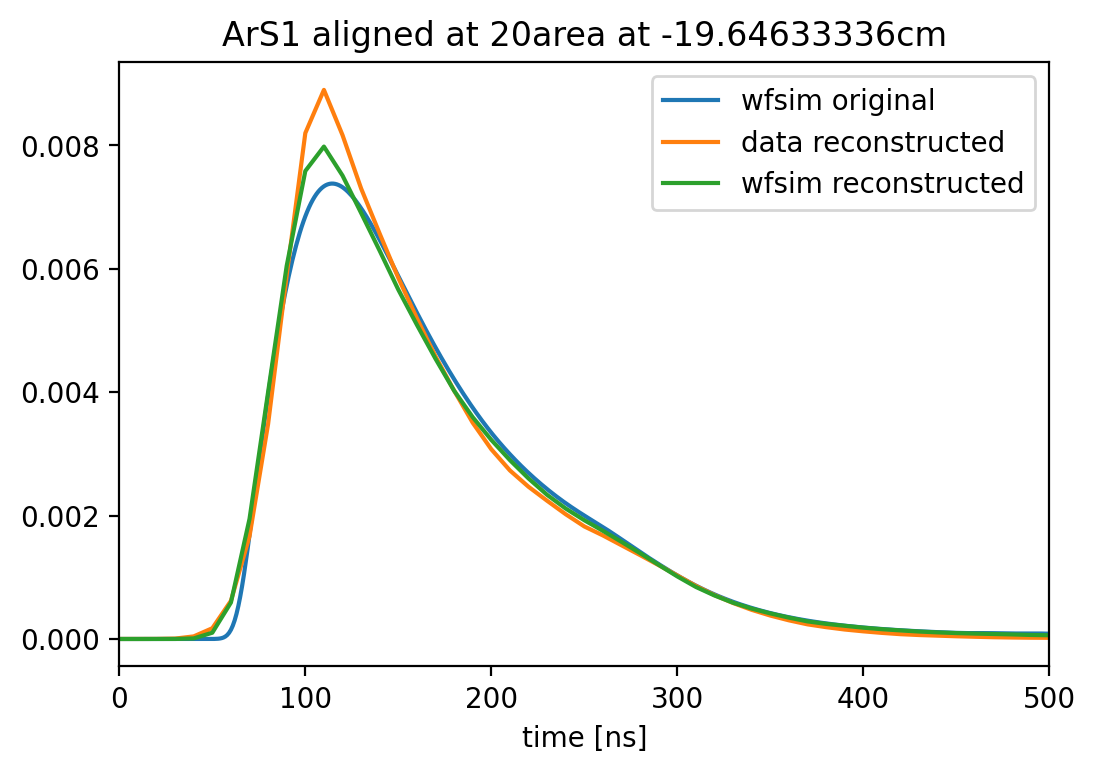

In [78]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(795),sim_wfs[i,5:], label='wfsim original')
plt.plot(np.arange(70)*10, ars1_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_ars1_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('ArS1 aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

# KrS1A

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.

*** Detector definition message ***
You are currently using the default XENON10 template detector.



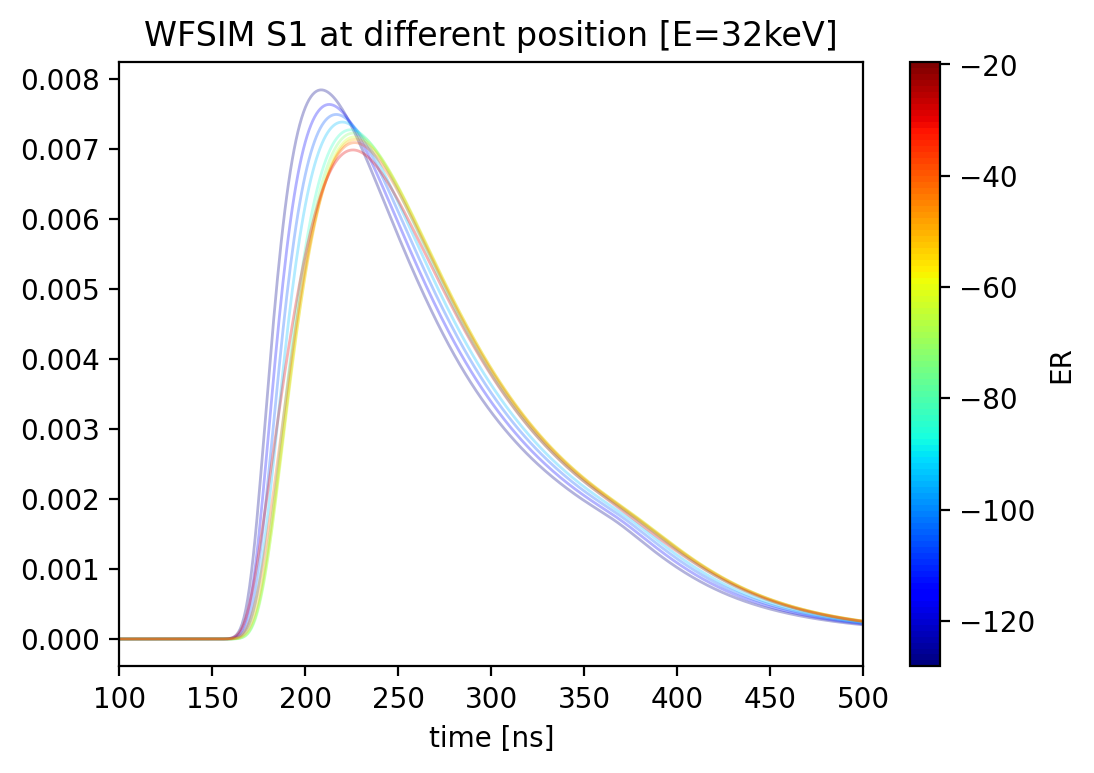

In [81]:
import matplotlib as mpl
plt.figure(dpi=200)

sim_wfs = np.zeros((10,800))

colors_er = plt.get_cmap('jet', 101)
#colors_nr = plt.get_cmap('plasma', 101)

for e in range(10):
    y1 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=7, e_dep=32)
    #y2 = sims1.sims1(z_position=ZSLIACES[e], interaction_type=0, e_dep=10)
    
    plt.plot(y1, c=colors_er(1+e*10) , linewidth=1, alpha=0.3)
    #plt.plot(y2, c=colors_nr(1+e*10) , linewidth=1, alpha=0.3)
    sim_wfs[e] = y1[100:900]

norm = mpl.colors.Normalize(vmin=ZSLIACES[0], vmax=ZSLIACES[-1])
sm1 = plt.cm.ScalarMappable(cmap=colors_er, norm=norm)
sm1.set_array([])
#sm2 = plt.cm.ScalarMappable(cmap=colors_nr, norm=norm)
#sm2.set_array([])
cb1 = plt.colorbar(sm1)
#cb2 = plt.colorbar(sm2)
cb1.set_label('ER')
#cb2.set_label('NR')
plt.xlabel('time [ns]')
plt.title('WFSIM S1 at different position [E=32keV]')
plt.xlim(100,500)
plt.show()

## No alignment

In [82]:
krs1a_peak_extra = extraction.get_peak_extra(runs=KR_AVAILABLE, signal_type='KrS1A')

Loading 50 runs:   0%|          | 0/50 [00:00<?, ?it/s]

In [83]:
import pandas as pd
import wfsim
import strax
import numpy as np
import nestpy
print("NESTPY" , nestpy.__version__, nestpy.__file__)

NSUMWVSAMPLES = 200
NWIDTHS = 11

nc = nestpy.NESTcalc(nestpy.DetectorExample_XENON10())
density = 2.94
driftfield= 18.3
energy_32 = 32
total_ces_std=2.8
denergy_32 = 0.88*total_ces_std
energy_9 = 9
denergy_9 = 0.47*total_ces_std


def instruction(energy, denergy, N_events=1):    
    instr = np.zeros(N_events , wfsim.instruction_dtype)
    #instr['x'] = evt['x']
    #instr['y'] = evt['y']
    instr['z'] = np.random.uniform(-134,-13)
    instr['type'] = 1
    instr['recoil'] = 11
    instr['local_field'] = driftfield

    for i in range(0, N_events):
        e = np.random.normal(energy, denergy)
        yields = nc.GetYields(nestpy.INTERACTION_TYPE(7), e, density, driftfield)
        cur_q = nc.GetQuanta(yields)
        instr['time'][i] = (i+1) * int(1e6)
        instr['amp'][i] = cur_q.photons
        instr['n_excitons'][i] = cur_q.excitons
        instr['e_dep'][i] = e
    
    return instr  


# 32 keV
fax_instr = []
N_events = 1
for j in range(100000):
    temp = instruction(energy_32, denergy_32, N_events)
    temp['time'] = temp['time'] + j * N_events * int(1e6)
    fax_instr.append(temp)
fax_instr = np.concatenate(fax_instr)
pd.DataFrame(fax_instr).to_csv('/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv', index=False)

stwf = straxen.contexts.xenonnt_simulation(
    cmt_run_id_sim = '034000',
    output_folder='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data',
    fax_config='fax_config_nt_sr0_v0.json',)

stwf.set_config(dict(fax_config_override={
    's1_model_type': 'nest+optical_propagation',
    's1_pattern_map': '/dali/lgrandi/xenonnt/simulations/optphot/mc_v4.1.0/S1_1.69_0.99_0.99_0.99_0.99_10000_100_30/XENONnT_S1_xyz_patterns_LCE_MCv4.1.0_wires.pkl',
    's1_time_spline': 'XENONnT_s1_proponly_va43fa9b_wires_20200625.json.gz',
    'enable_noise': True,
    'enable_electron_afterpulses': True,
    'enable_pmt_afterpulses': True,
}))

stwf.set_config(
    dict(fax_file='/dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_config/krs1b_1.csv',
         right_raw_extension=20000,
         event_rate=1000,
         chunk_size=1,
         nchunk=10,))


def sim_peak_extra(peaks, peak_basics, truth, match):
    dtypes = [
        (('Start time of the peak (ns since unix epoch)',
          'time'), np.int64),
        (('End time of the peak (ns since unix epoch)',
          'endtime'), np.int64),
        (('Weighted center time of the peak (ns since unix epoch)',
          'center_time'), np.int64),
        (('Peak integral in PE',
            'area'), np.float32),
        (('Number of PMTs contributing to the peak',
            'n_channels'), np.int16),
        (('PMT number which contributes the most PE',
            'max_pmt'), np.int16),
        (('Area of signal in the largest-contributing PMT (PE)',
            'max_pmt_area'), np.float32),
        (('Total number of saturated channels',
          'n_saturated_channels'), np.int16),
        (('Width (in ns) of the central 50% area of the peak',
            'range_50p_area'), np.float32),
        (('Width (in ns) of the central 90% area of the peak',
            'range_90p_area'), np.float32),
        (('Fraction of area seen by the top array '
          '(NaN for peaks with non-positive area)',
            'area_fraction_top'), np.float32),
        (('Length of the peak waveform in samples',
          'length'), np.int32),
        (('Time resolution of the peak waveform in ns',
          'dt'), np.int16),
        (('Time between 10% and 50% area quantiles [ns]',
          'rise_time'), np.float32),
        (('Hits within tight range of mean',
          'tight_coincidence'), np.int16),
        (('PMT channel within tight range of mean',
          'tight_coincidence_channel'), np.int16),
        (('Classification of the peak(let)',
          'type'), np.int8),
        (('Waveform data in PE/sample (not PE/ns!)',
          'data'), np.float32, NSUMWVSAMPLES),
        (('Peak widths: time between nth and 5th area decile [ns]',
          'area_decile_from_midpoint'), np.float32, NWIDTHS),
        (('x coordinates', 'x'), np.float32),
        (('y coordinates', 'y'),np.float32),
        (('z coordinates', 'z'), np.float32),
    ]
    
    peak_indecies = match['matched_to']
    peaks = peaks[peak_indecies]
    peak_basics = peak_basics[peak_indecies]
    
    peak_extra = np.zeros(len(peaks), dtype=dtypes)
    
    for i in range(len(dtypes)):
        field = dtypes[i][0][1]
        if field == 'data' or field == 'area_decile_from_midpoint':
            peak_extra[field] = peaks[field]
        elif field == 'x' or field == 'y' or field == 'z':
            peak_extra[field] = truth[field]
        else:
            peak_extra[field] = peak_basics[field]
    
    return peak_extra

NESTPY 1.5.0 /opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/nestpy/__init__.py


*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [ ]:
import pema
stwf.register_all(pema.match_plugins)

krs1a_sim_peaks = stwf.get_array('krs1a_test1', 'peaks')
truth = stwf.get_array('krs1a_test1', 'truth')
krs1a_match = stwf.get_array('krs1a_test1', 'match_acceptance_extended')
krs1a_sim_peak_basics = stwf.get_array('krs1a_test1', 'peak_basics')
krs1a_sim_peak_extra = sim_peak_extra(krs1a_sim_peaks, krs1a_sim_peak_basics, truth, krs1a_match)

Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-truth-bsfmv4hrzz
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-raw_records_he-bsfmv4hrzz
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-raw_records_aqmon-bsfmv4hrzz
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-raw_records-bsfmv4hrzz
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-peaklets-gomxg5bw7z
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-lone_hits-gomxg5bw7z
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-peaklet_classification-k5dkzvp35o
Removing old incomplete data in /dali/lgrandi/yuanlq/s1_wf_comparison/krypton/wfsim_data/krs1a_test1-merged_s2s-h5fczk3jkm


*** Detector definition message ***
You are currently using the default XENON10 template detector.



Simulating Raw Records:   0%|          | 0/100000 [00:00<?, ?it/s]

RawRecordsFromFaxNT with object id: 139763077889712 waits for chunk 1
RawRecordsFromFaxNT with object id: 139763077889712 waits for chunk 2
RawRecordsFromFaxNT with object id: 139763077889712 waits for chunk 3


(0.0, 50.0)

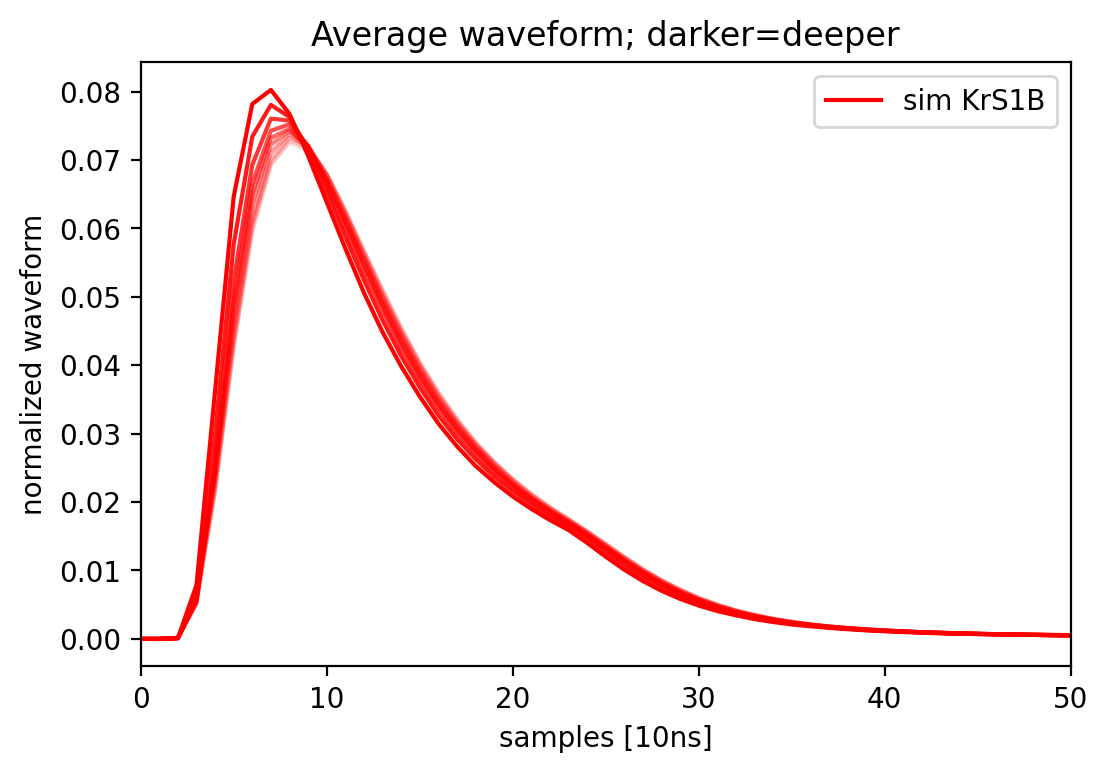

In [85]:
peaks = krs1b_sim_peak_extra[(krs1b_sim_peak_extra['dt']==10)&(krs1b_sim_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
sim_krs1b_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
sim_krs1b_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    sim_krs1b_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    sim_krs1b_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='sim KrS1B')
    else:
        plt.plot(sim_krs1b_avg_wf_mean[i], color='r', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)



0it [00:00, ?it/s]

5952it [00:00, 59509.42it/s]

11903it [00:00, 57886.09it/s]

17740it [00:00, 58099.02it/s]

23552it [00:00, 57526.40it/s]

29309it [00:00, 57539.75it/s]

35064it [00:00, 57292.64it/s]

40837it [00:00, 57431.46it/s]

46581it [00:00, 56856.82it/s]

52345it [00:00, 57097.36it/s]

58162it [00:01, 57424.91it/s]

63937it [00:01, 57520.77it/s]

69690it [00:01, 57325.29it/s]

75424it [00:01, 56355.77it/s]

82595it [00:01, 60919.23it/s]

89483it [00:01, 63291.53it/s]

96728it [00:01, 66026.51it/s]

104025it [00:01, 68102.16it/s]

111018it [00:01, 68648.14it/s]

118054it [00:01, 69157.39it/s]

124974it [00:02, 65112.05it/s]

131687it [00:02, 65689.49it/s]

138295it [00:02, 61921.26it/s]

145045it [00:02, 63489.32it/s]

152103it [00:02, 65519.35it/s]

158704it [00:02, 64241.38it/s]

165706it [00:02, 65907.14it/s]

172597it [00:02, 66781.54it/s]

179300it [00:02, 62855.94it/s]

186268it [00:02, 64787.70it/s]

195968it [00:03, 62658.18it/s]


(0.0, 50.0)

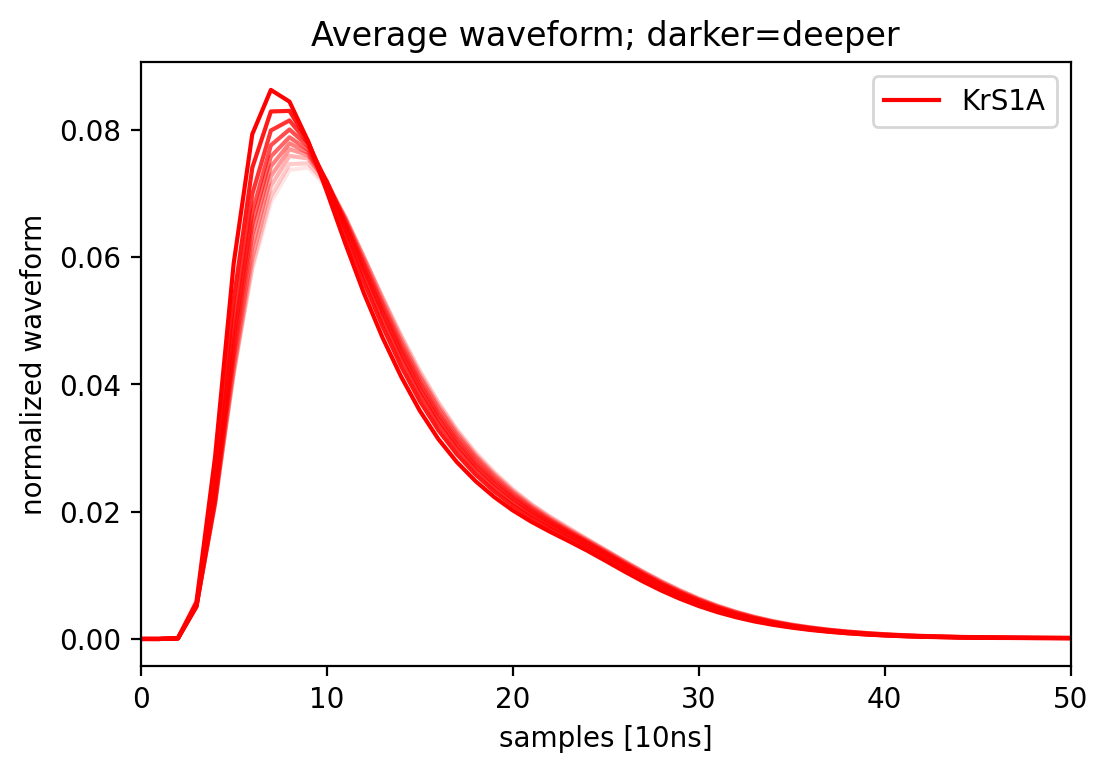

In [119]:
# data

krs1a_aligned_area20 = alignment.align_area_range(krs1a_peak_extra)

peaks = krs1a_peak_extra[(krs1a_peak_extra['dt']==10)&(krs1a_peak_extra['area']>18)]
z_slices = np.linspace(np.min(peaks['z']), np.max(peaks['z']), 11)

# compute average waveform
krs1a_avg_wf_mean = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
krs1a_avg_wf_err = np.zeros((len(z_slices)-1, len(peaks[0]['data'])))
for i in range(len(z_slices)-1):
    peaks_z = peaks[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1a_avg_wf_mean[i] = np.mean(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    krs1a_avg_wf_err[i] = np.std(peaks_z['data']/peaks_z['area'][:,np.newaxis], axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(0,50)

(0.0, 500.0)

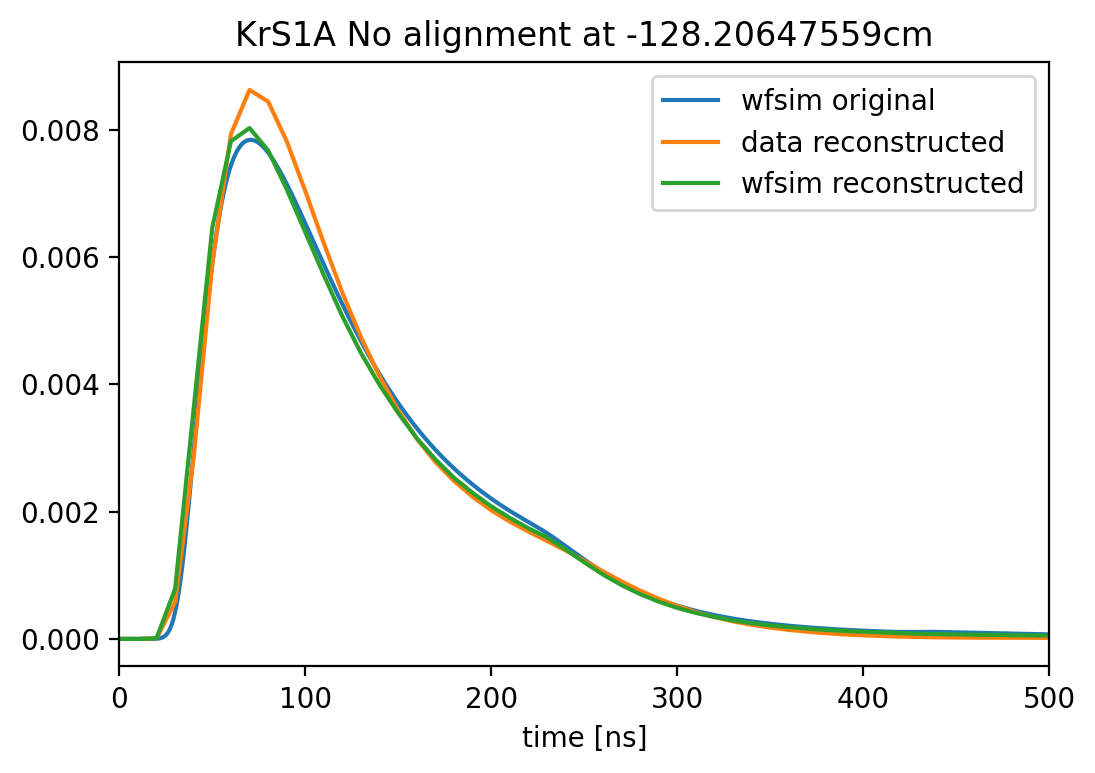

In [87]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

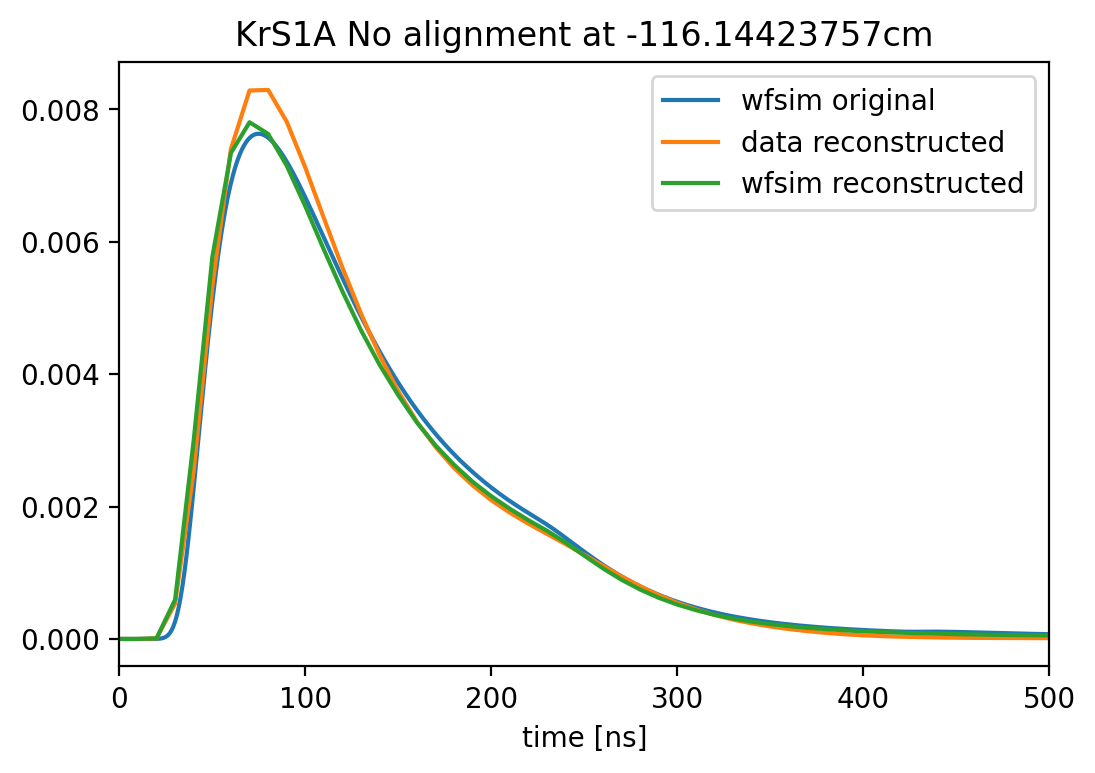

In [88]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(762),sim_wfs[i,38:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

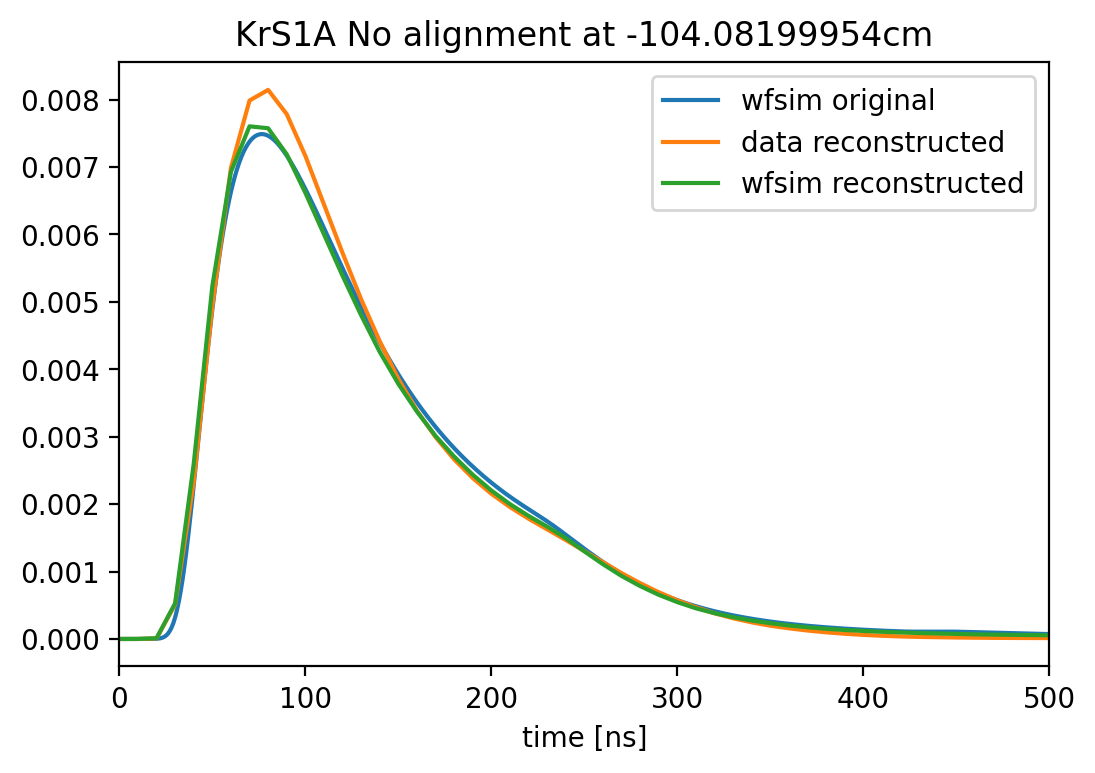

In [89]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(760),sim_wfs[i,40:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

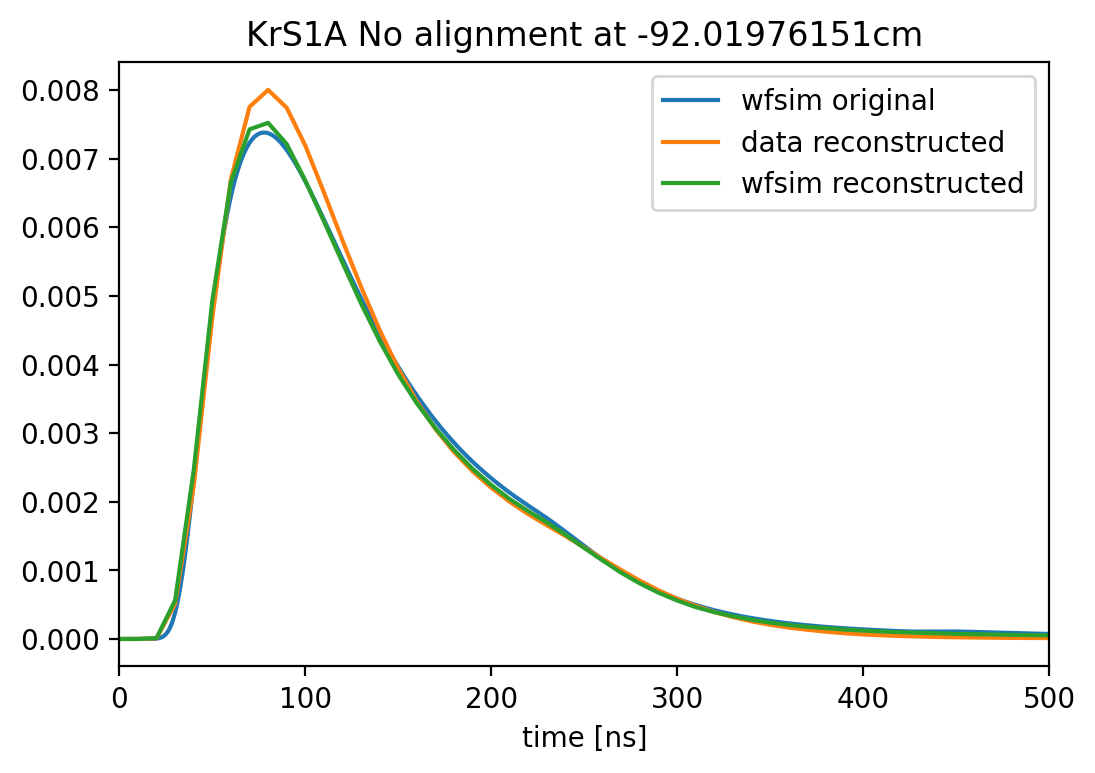

In [90]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

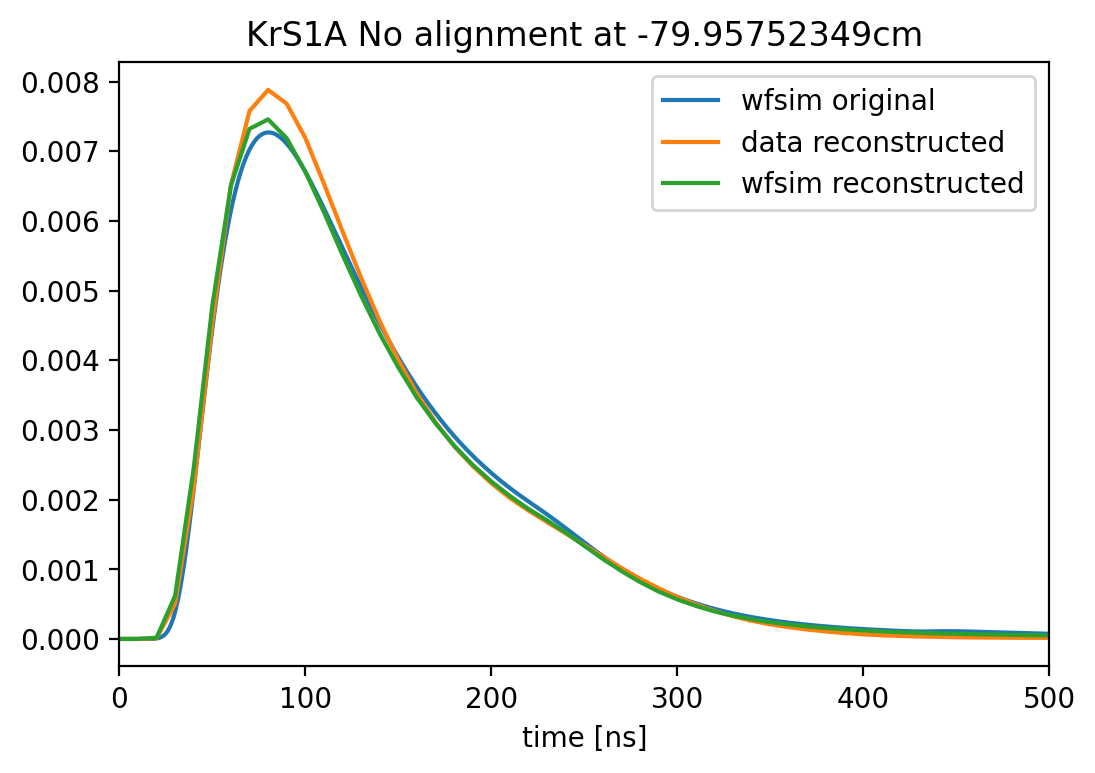

In [91]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(756),sim_wfs[i,44:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

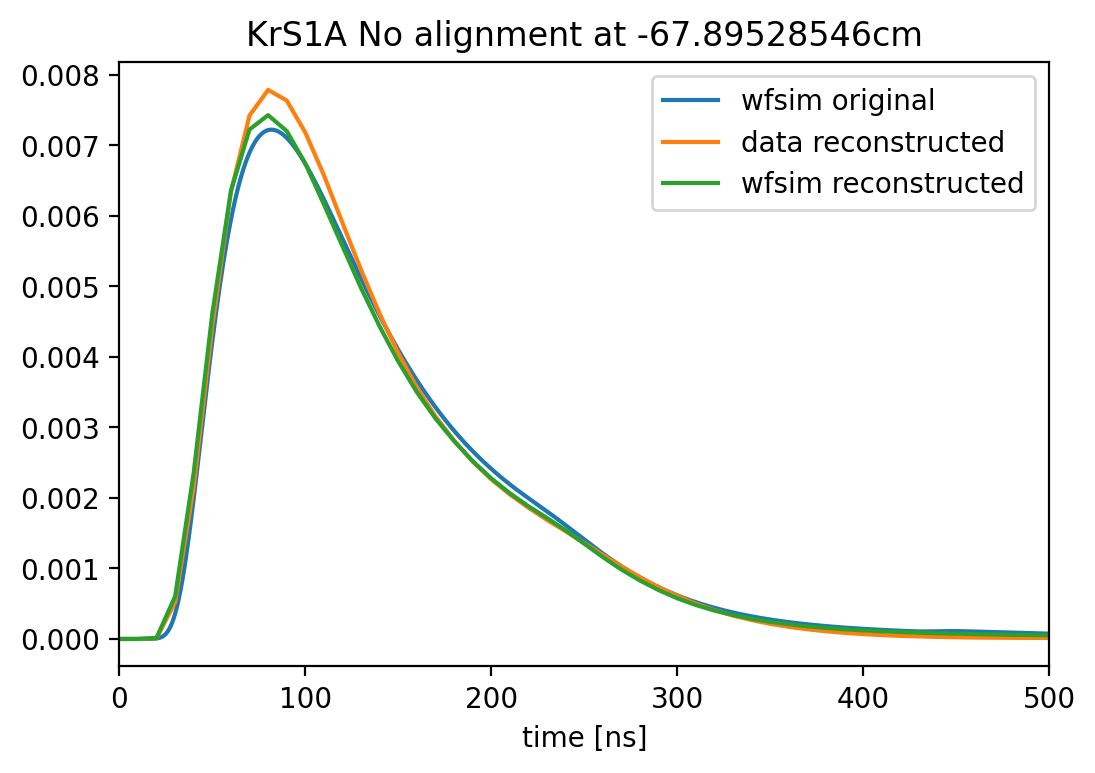

In [92]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(756),sim_wfs[i,44:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

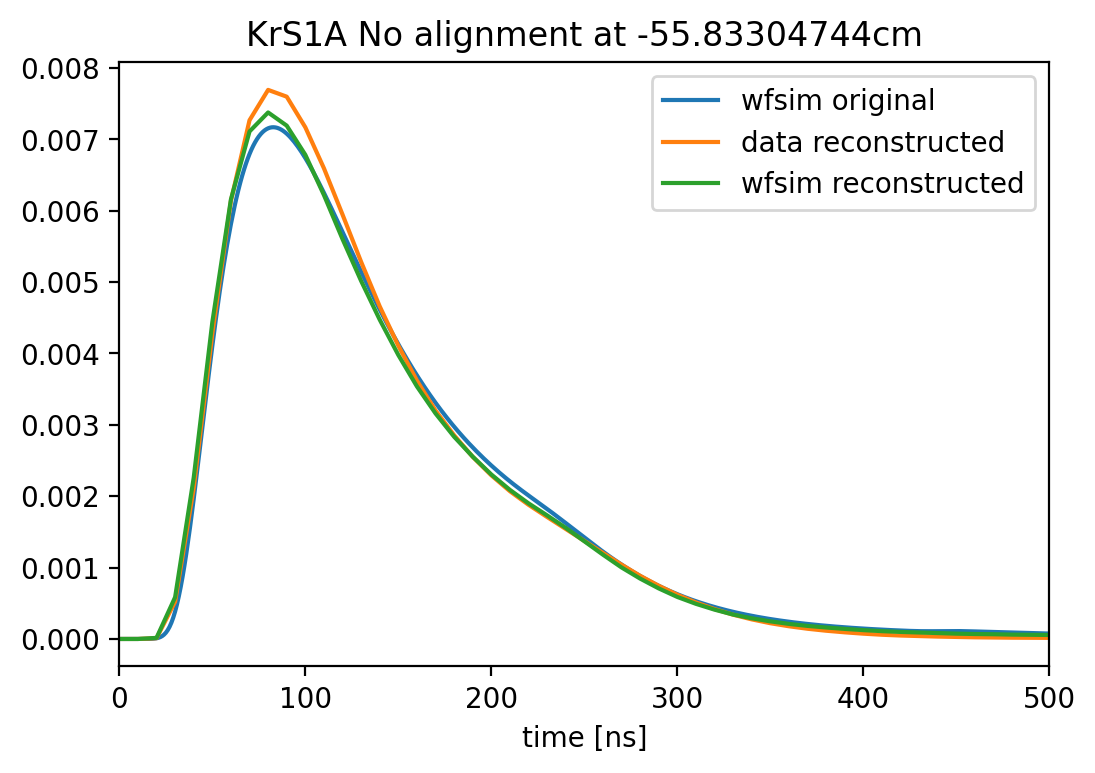

In [93]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(756),sim_wfs[i,44:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

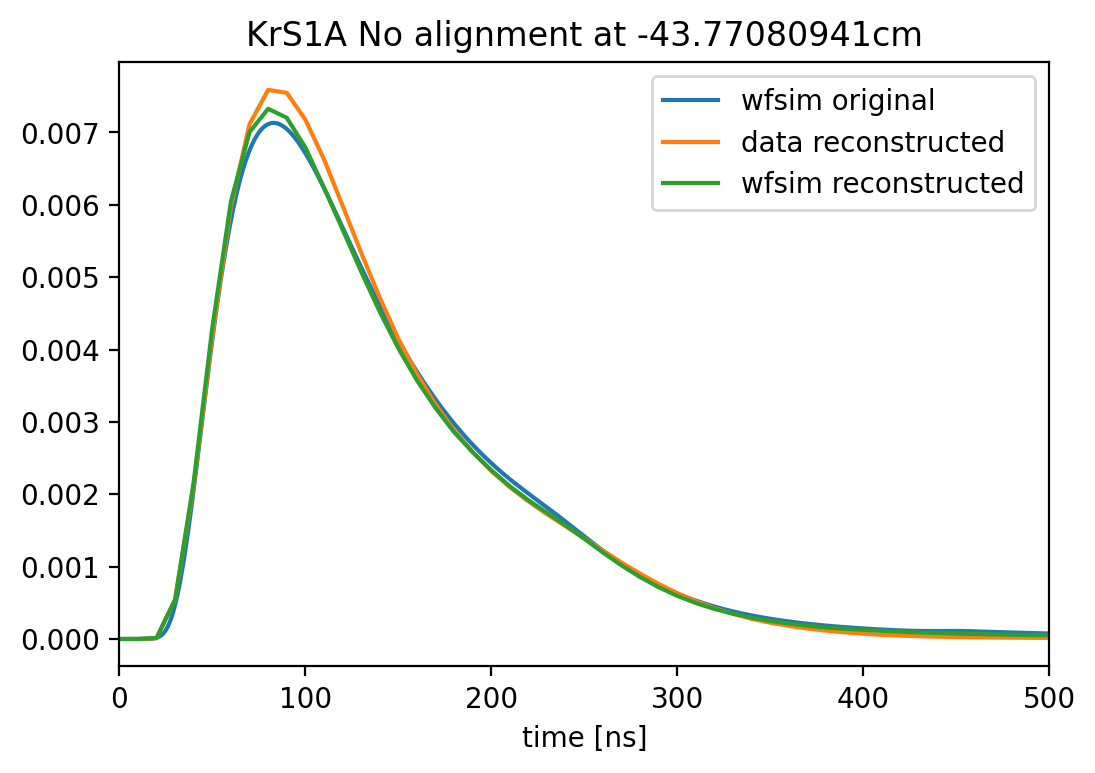

In [94]:
i = 7
plt.figure(dpi=200)
plt.plot(np.arange(756),sim_wfs[i,44:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

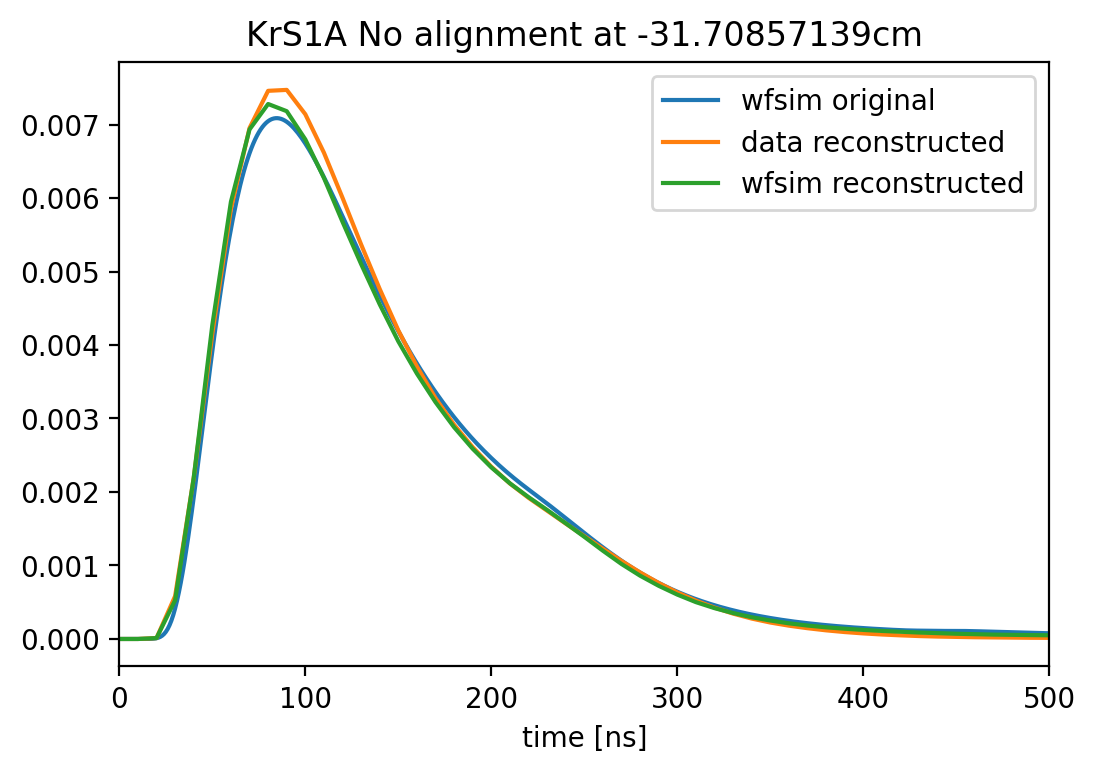

In [95]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(758),sim_wfs[i,42:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

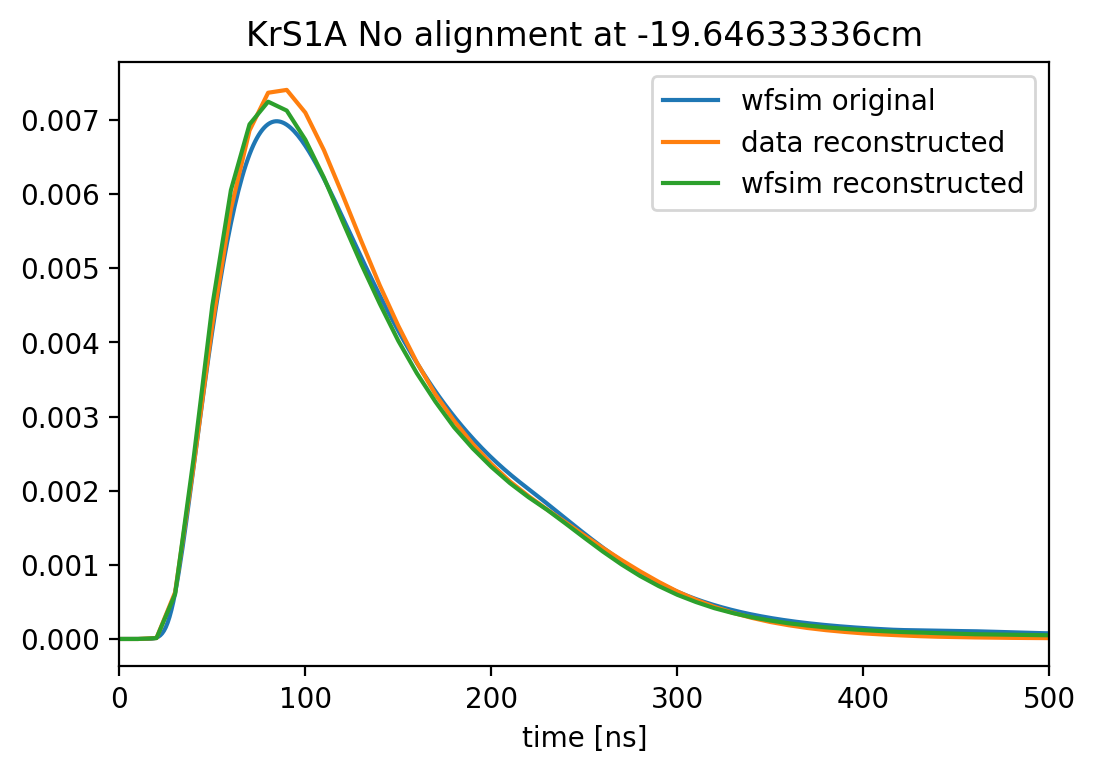

In [96]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(759),sim_wfs[i,41:], label='wfsim original')
plt.plot(np.arange(200)*10, krs1a_avg_wf_mean[i]/10, label='data reconstructed')
plt.plot(np.arange(200)*10, sim_krs1b_avg_wf_mean[i]/10, label='wfsim reconstructed')
plt.title('KrS1A No alignment at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

## Area 20 percent



0it [00:00, ?it/s]

275it [00:00, 2116.75it/s]

1299it [00:00, 6172.75it/s]

1954it [00:00, 5064.12it/s]

2522it [00:00, 5263.48it/s]

3082it [00:00, 5345.72it/s]

3635it [00:00, 4118.79it/s]

4094it [00:00, 3605.74it/s]

4539it [00:01, 3721.01it/s]

5288it [00:01, 4625.37it/s]

5795it [00:01, 4655.21it/s]

6290it [00:01, 4055.85it/s]

6731it [00:01, 4139.82it/s]

7285it [00:01, 4454.65it/s]

7904it [00:01, 4912.81it/s]

8415it [00:01, 4742.47it/s]

9082it [00:01, 5269.17it/s]

9624it [00:02, 4821.64it/s]

10123it [00:02, 4713.35it/s]

10606it [00:02, 4199.10it/s]

11046it [00:02, 4197.13it/s]

12214it [00:02, 6172.60it/s]

12866it [00:02, 6091.61it/s]

13500it [00:02, 5046.75it/s]

14080it [00:02, 5200.13it/s]

14703it [00:03, 5464.85it/s]

15289it [00:03, 5570.82it/s]

15868it [00:03, 5185.32it/s]

16406it [00:03, 5065.09it/s]

17097it [00:03, 5489.12it/s]

17834it [00:03, 5951.02it/s]

18441it [00:03, 5384.70it/s]

18996it [00:03, 4907.45it/s]

19504it [00:04, 4125.35it/s]

19945i

(40.0, 90.0)

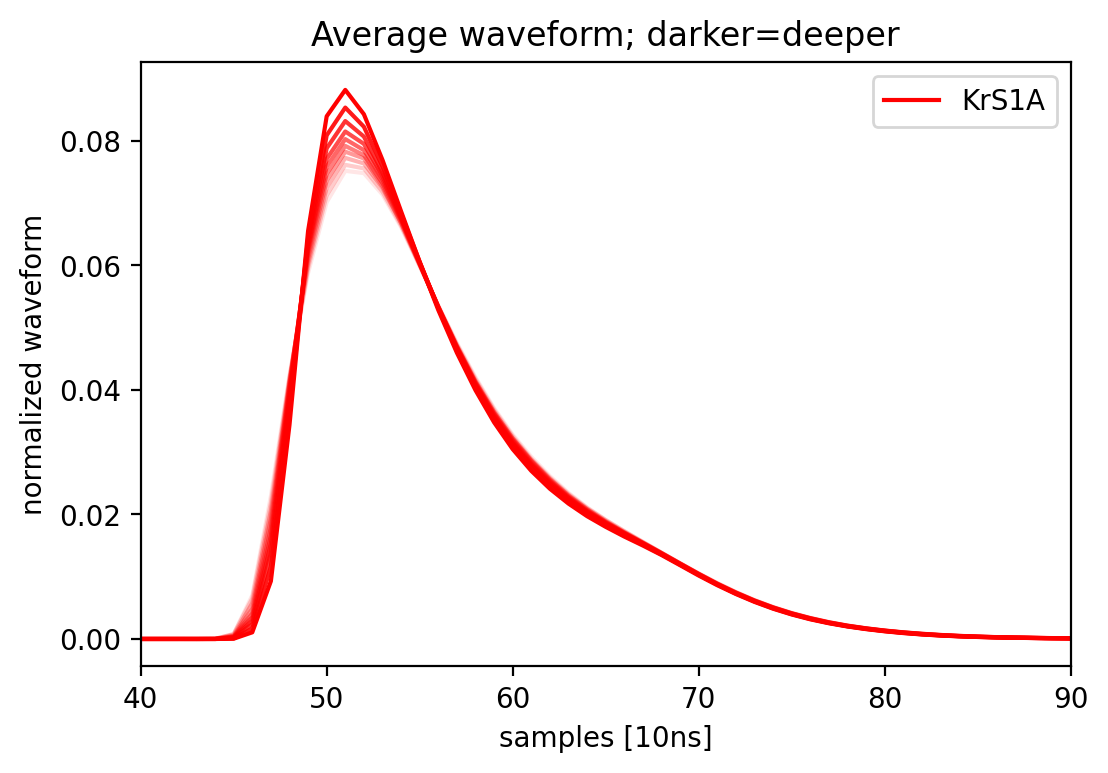

In [97]:
# data

krs1a_aligned_area20 = alignment.align_area_range(krs1a_peak_extra)

peaks = krs1a_peak_extra[(krs1a_peak_extra['dt']==10)&(krs1a_peak_extra['area']>18)]
krs1a_avg_wf_mean = np.zeros((len(z_slices)-1, len(krs1a_aligned_area20[0])))
krs1a_avg_wf_err = np.zeros((len(z_slices)-1, len(krs1a_aligned_area20[0])))
for i in range(len(z_slices)-1):
    peaks_z = krs1a_aligned_area20[(peaks['z']>=z_slices[i])&(peaks['z']<=z_slices[i+1])]
    krs1a_avg_wf_mean[i] = np.mean(peaks_z, axis=0)
    krs1a_avg_wf_err[i] = np.std(peaks_z, axis=0)
    
plt.figure(dpi=200)
for i in range((len(z_slices)-1)):
    if i==0:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i, label='ArS1')
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i, label='KrS1A')
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i, label='KrS1B')
    else:
        #plt.plot(ars1_avg_wf_mean[i], color='b', alpha=1-0.1*i)
        plt.plot(krs1a_avg_wf_mean[i], color='r', alpha=1-0.1*i)
        #plt.plot(krs1b_avg_wf_mean[i], color='g', alpha=1-0.1*i)
plt.legend()
plt.xlabel('samples [10ns]')
plt.ylabel('normalized waveform')
plt.title('Average waveform; darker=deeper')
plt.xlim(40,90)

(0.0, 500.0)

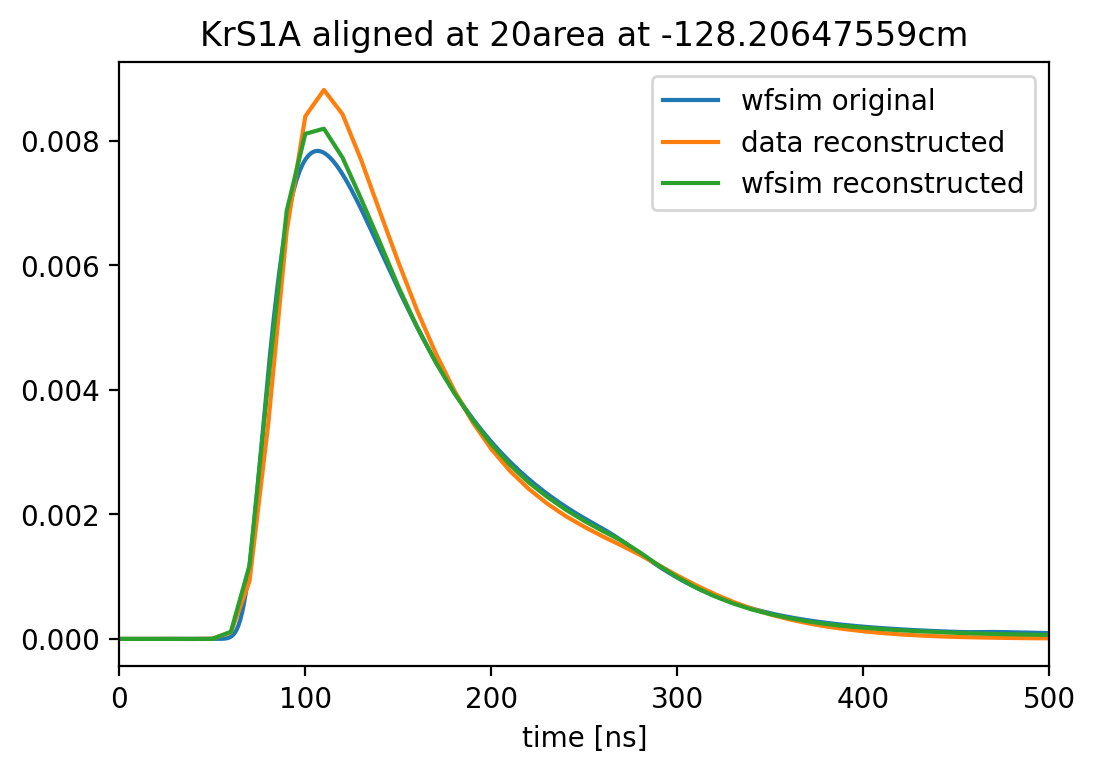

In [102]:
i = 0
plt.figure(dpi=200)
plt.plot(np.arange(798),sim_wfs[i,2:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

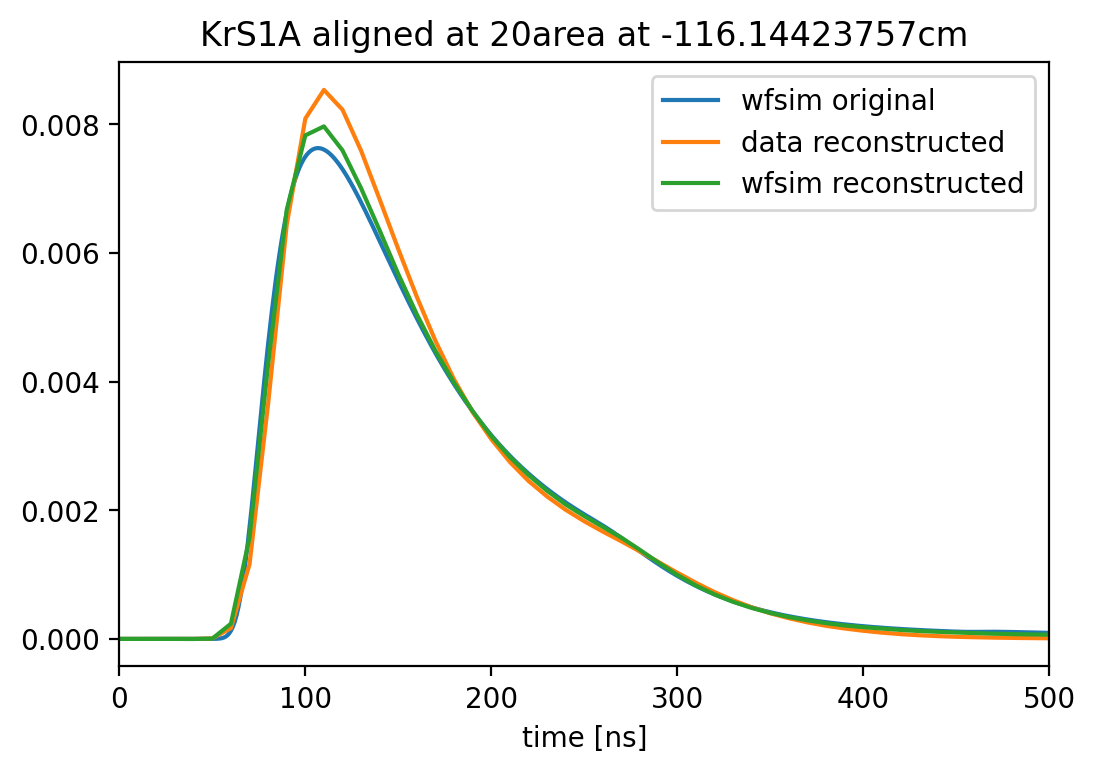

In [106]:
i = 1
plt.figure(dpi=200)
plt.plot(np.arange(794),sim_wfs[i,6:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

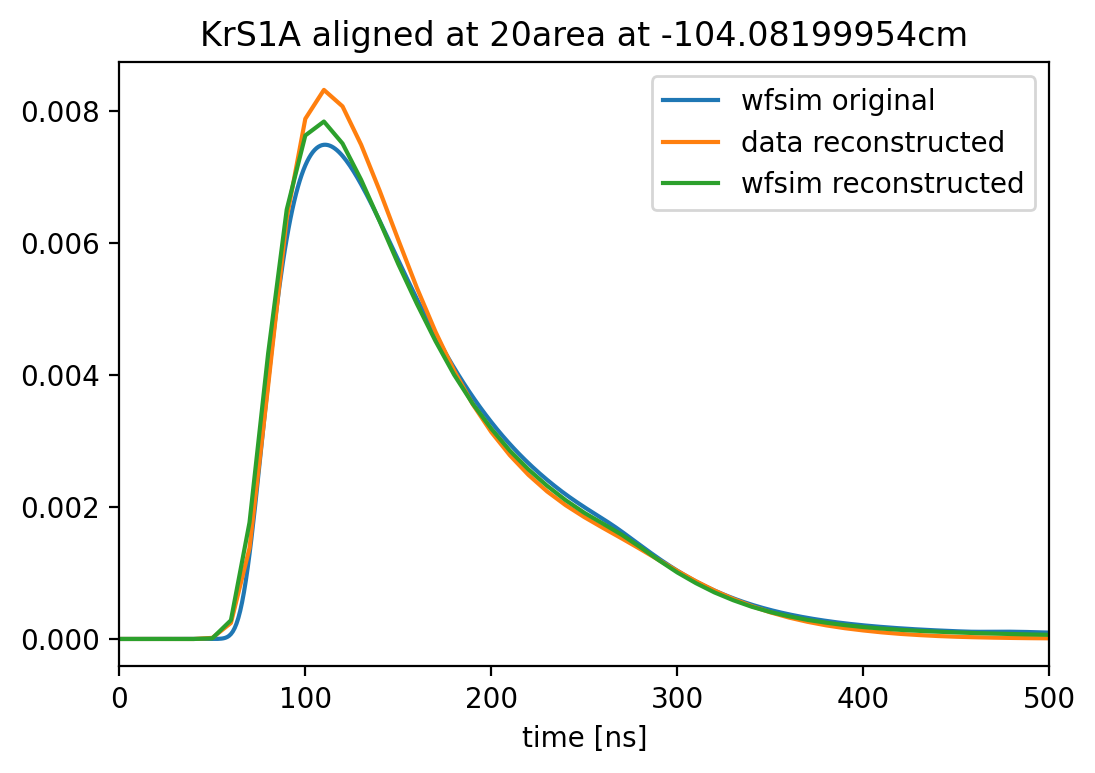

In [107]:
i = 2
plt.figure(dpi=200)
plt.plot(np.arange(794),sim_wfs[i,6:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

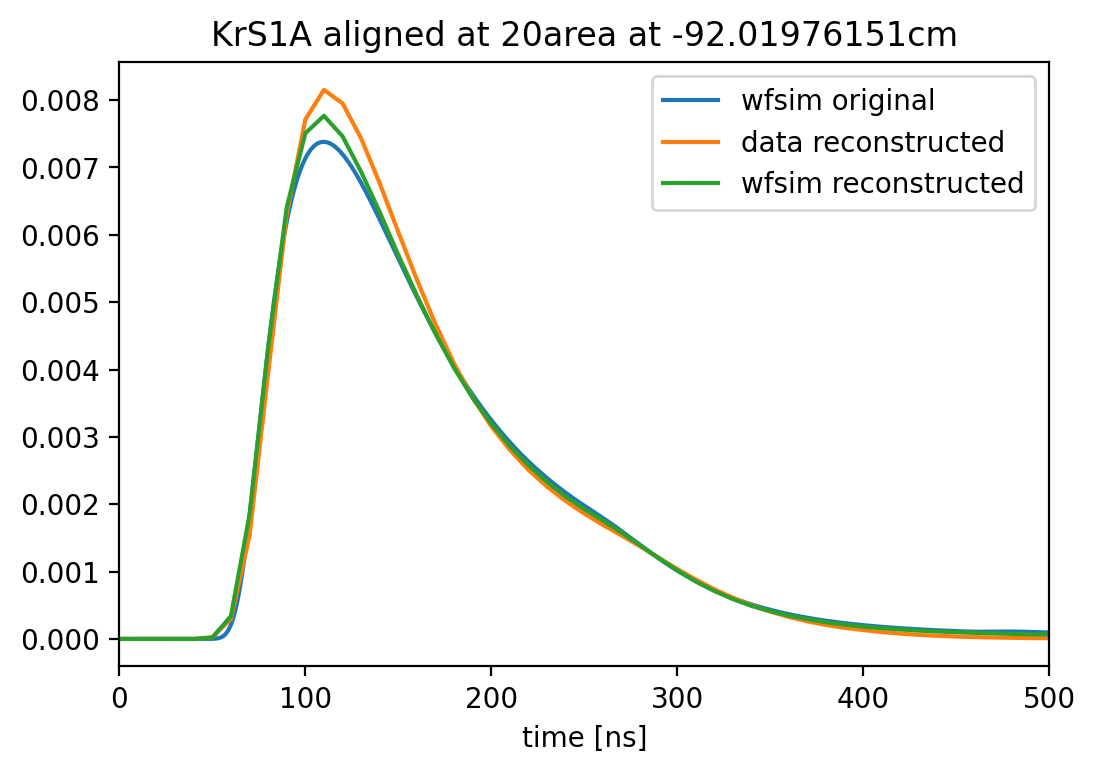

In [110]:
i = 3
plt.figure(dpi=200)
plt.plot(np.arange(790),sim_wfs[i,10:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

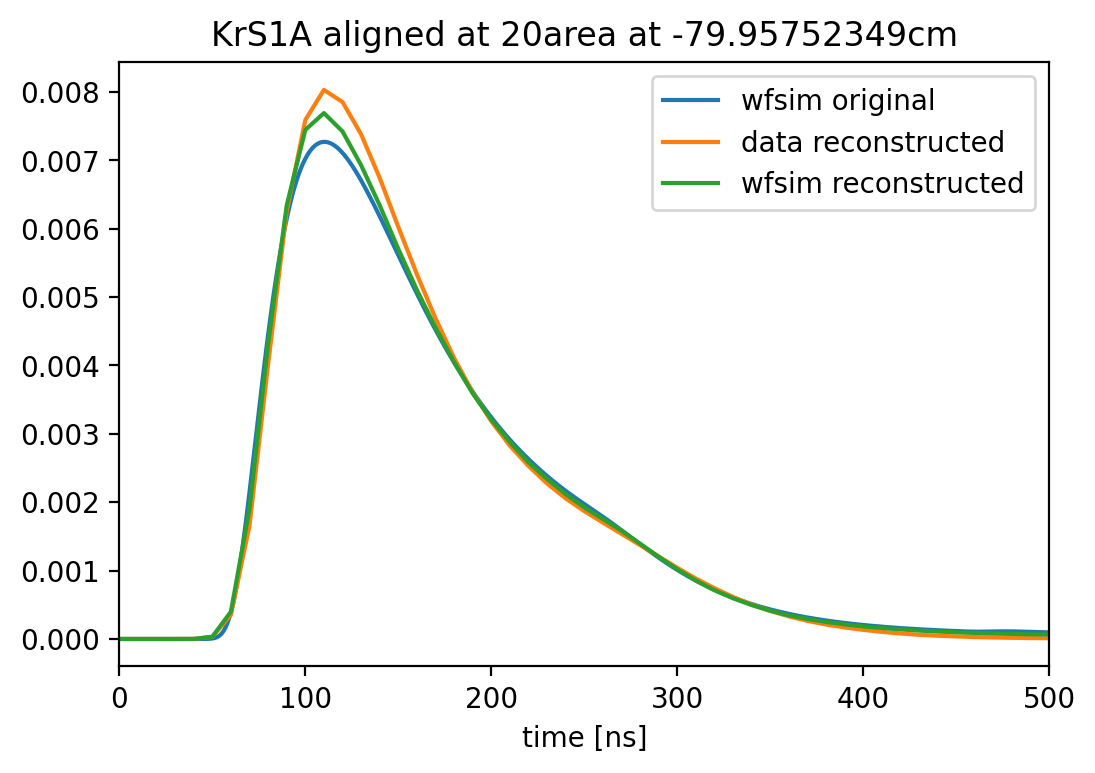

In [112]:
i = 4
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

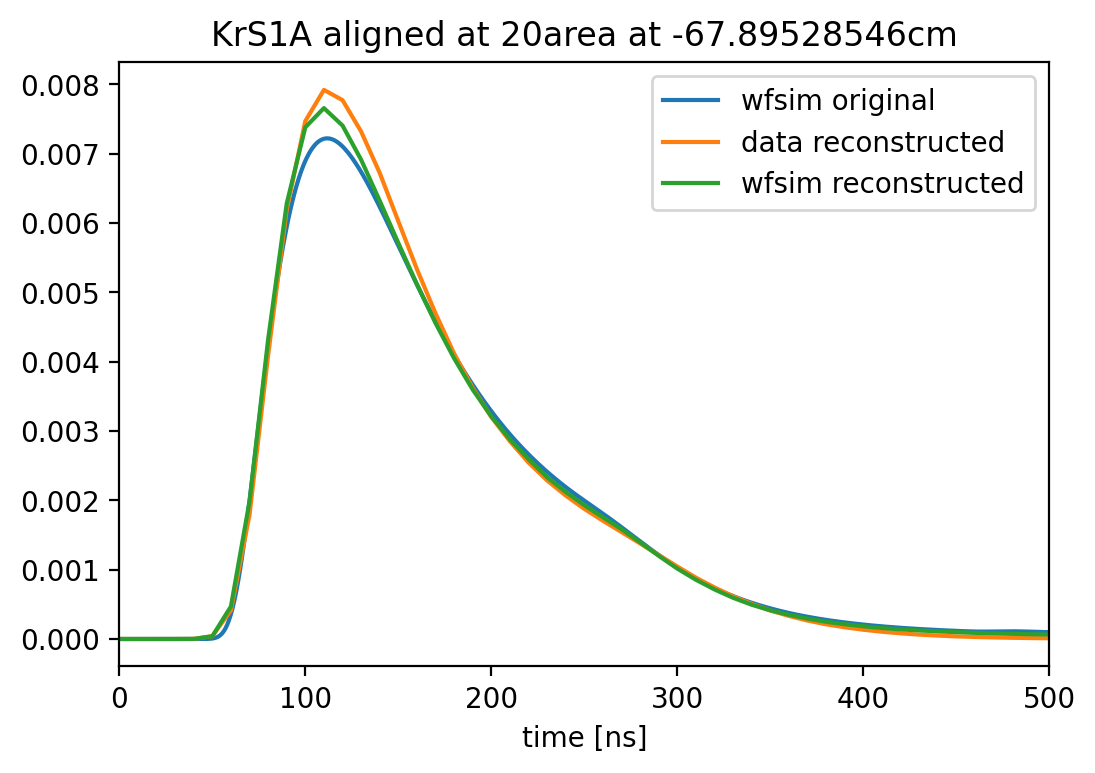

In [114]:
i = 5
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

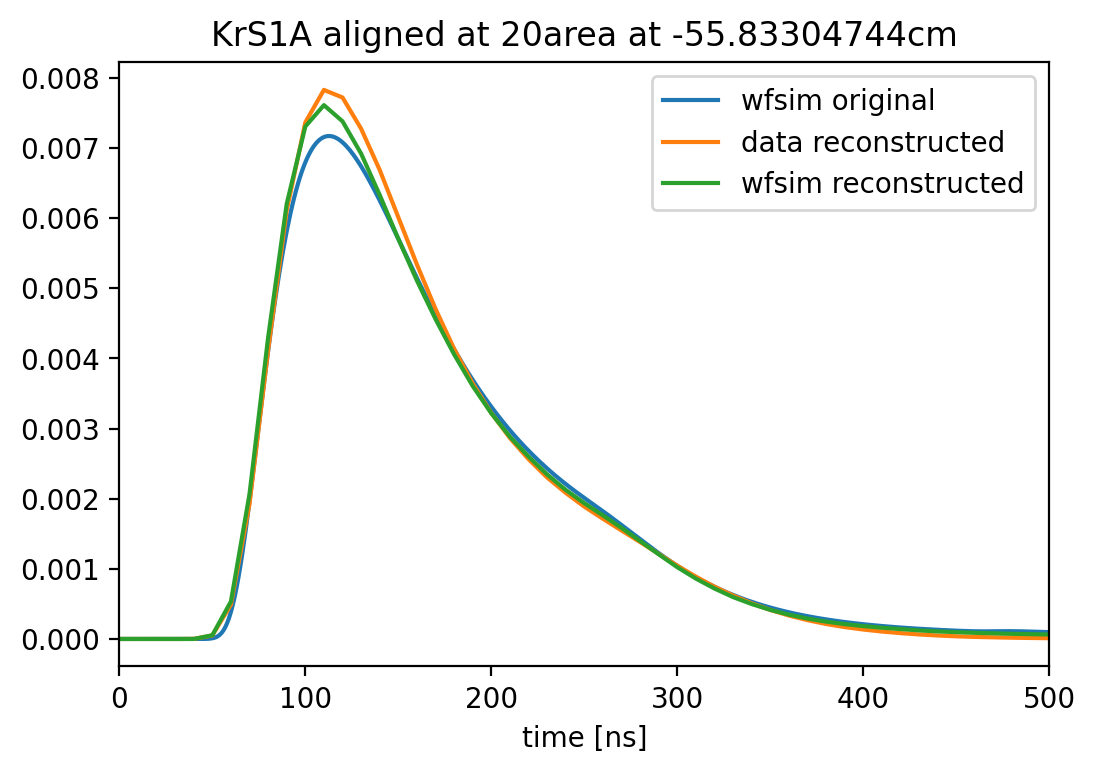

In [115]:
i = 6
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

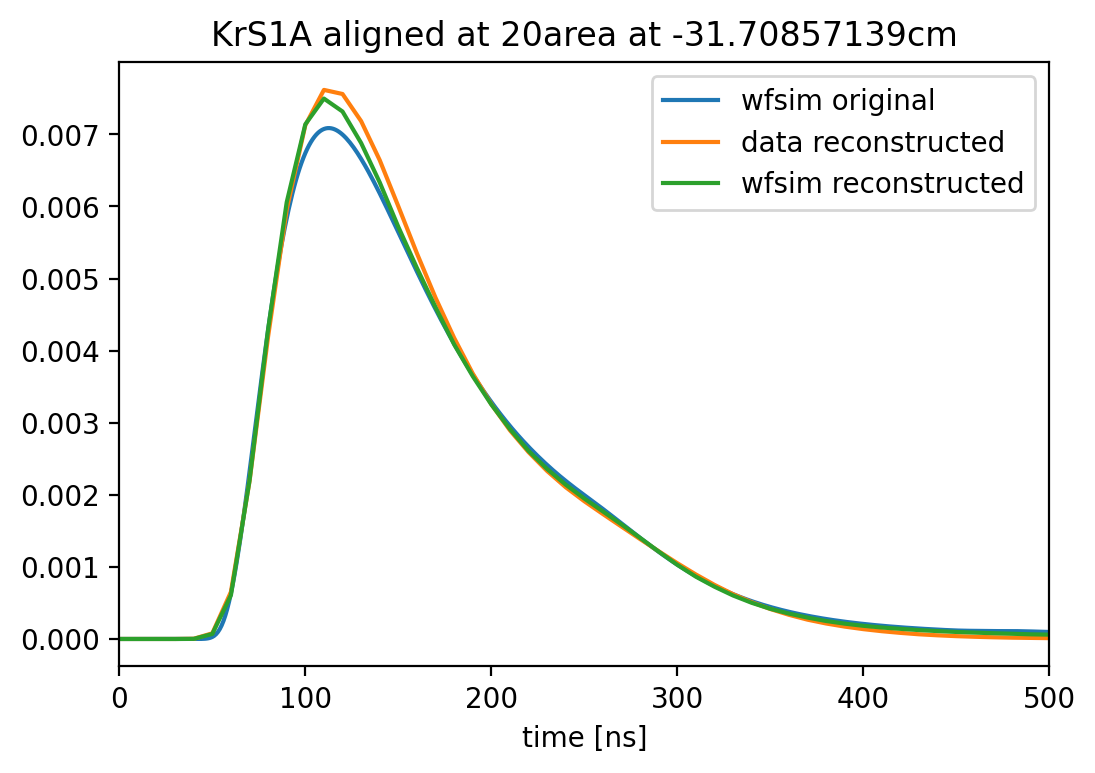

In [117]:
i = 8
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)

(0.0, 500.0)

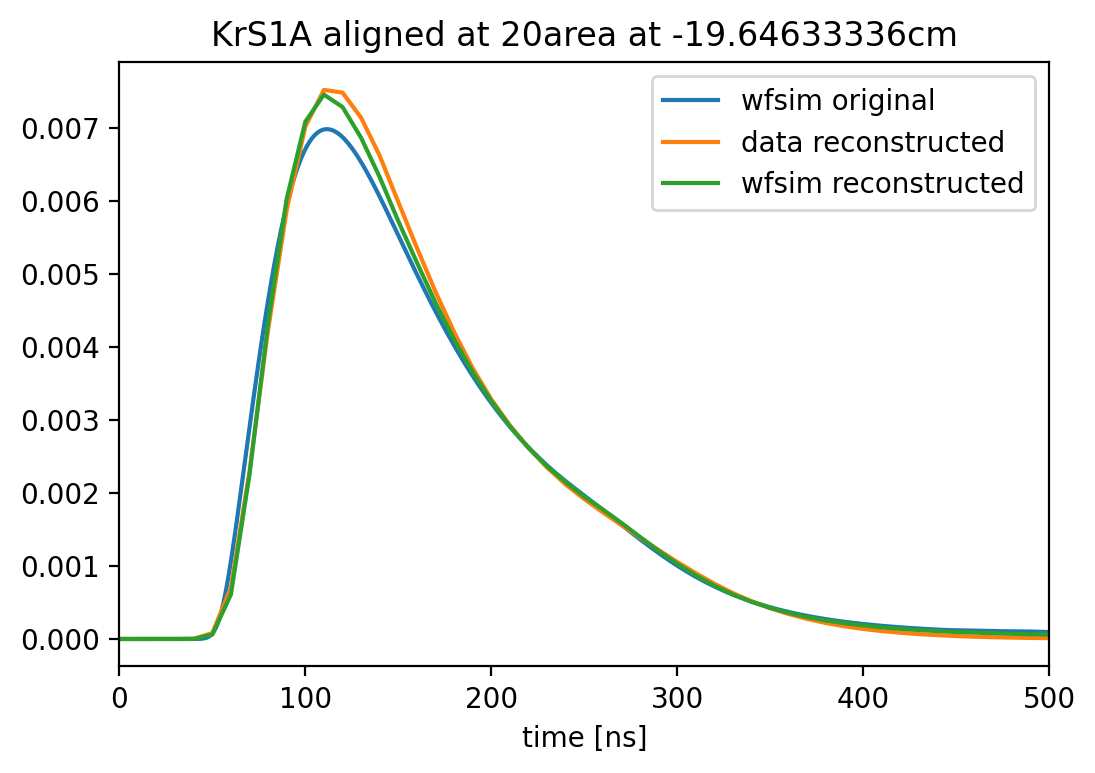

In [118]:
i = 9
plt.figure(dpi=200)
plt.plot(np.arange(786),sim_wfs[i,14:], label='wfsim original')
plt.plot(np.arange(70)*10, krs1a_avg_wf_mean[i,40:]/10, label='data reconstructed')
plt.plot(np.arange(70)*10, sim_krs1b_avg_wf_mean[i,40:]/10, label='wfsim reconstructed')
plt.title('KrS1A aligned at 20area at %scm'%(ZSLIACES[i]))
plt.xlabel('time [ns]')
plt.legend()
plt.xlim(0,500)